In [11]:
import json
import pickle
from pathlib import Path

from utils.corpus import RawSentence

OUTPUT_DIR = Path("../output")

with open(OUTPUT_DIR / "annotated_translated_tokenized_corpus_by_book.pkl", "rb") as f:
    corpus_by_book: dict[str, list[RawSentence]] = pickle.load(f)

sentences_count = {}
for book, sentences in corpus_by_book.items():
    sentences_count[book] = len(sentences)

for book, count in sorted(sentences_count.items(), key=lambda x: x[1], reverse=True):
    print(f"{count:10}  {book:50}")

with open(OUTPUT_DIR / "sentences_count.json", "w") as f:
    json.dump(sentences_count, f, ensure_ascii=False, indent=4)

     90413  アイヌ語アーカイブ                                         
     20477  平取町アイヌ口承文芸                                        
     13081  アイヌ語鵡川方言日本語‐アイヌ語辞典                                
      8406  AA研アイヌ語資料                                         
      8271  アイヌ語アーカイブ音声資料                                     
      7725  アイヌ語口承文芸コーパス                                      
      6535  アイヌタイムズ                                           
      3852  浅井タケ昔話全集I,II                                      
      3466  アイヌ語會話字典                                          
      2844  アイヌ民族文化センター研究紀要                                   
      1660  アイヌ語ラジオ講座テキスト                                     
      1307  アイヌ神謡集                                            
       884  鍋沢元蔵筆録ノート                                         
       691  カムイユカㇻを聞いてアイヌ語を学ぶ                                 
       597  アイヌ語音声資料                                          
       490  ニューエクスプレスプラス アイヌ語                          

In [35]:
# for book, sentences in sentences_by_book.items():
#     sentences_words_length[book] = [len(s) for s in sentences]
# json.dump(sentences_words_length, f, indent=2, ensure_ascii=False)

from collections import defaultdict

sentences_words_length: defaultdict[str, list[int]] = defaultdict(list)
for book, sentences in corpus_by_book.items():
    for sentence in sentences:
        sentences_words_length[book].append(len(sentence["words"]))

with open(OUTPUT_DIR / "sentences_words_length.json", "w") as f:
    json.dump(sentences_words_length, f, ensure_ascii=False)

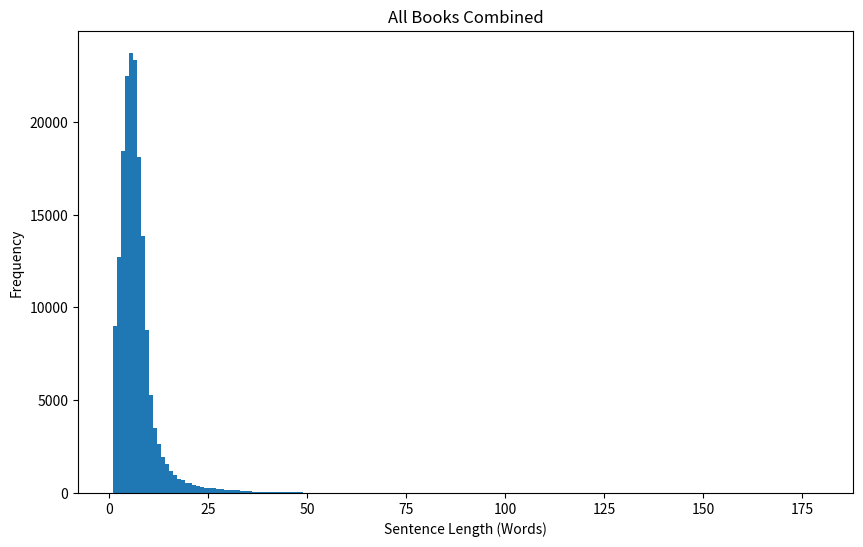

/tmp/ipykernel_929579/897427825.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


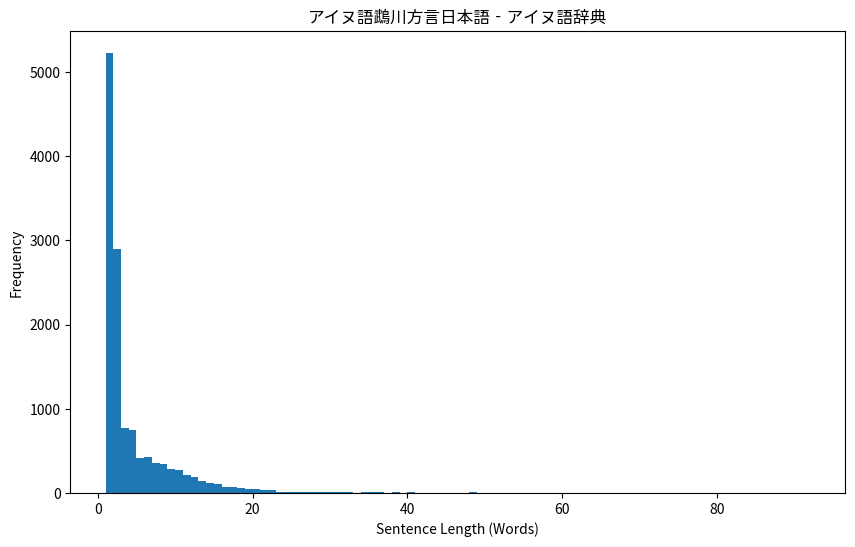

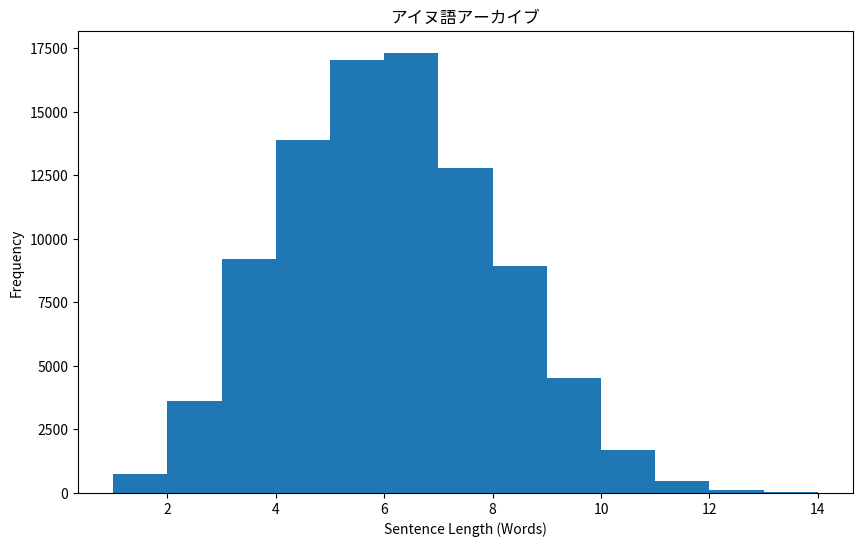

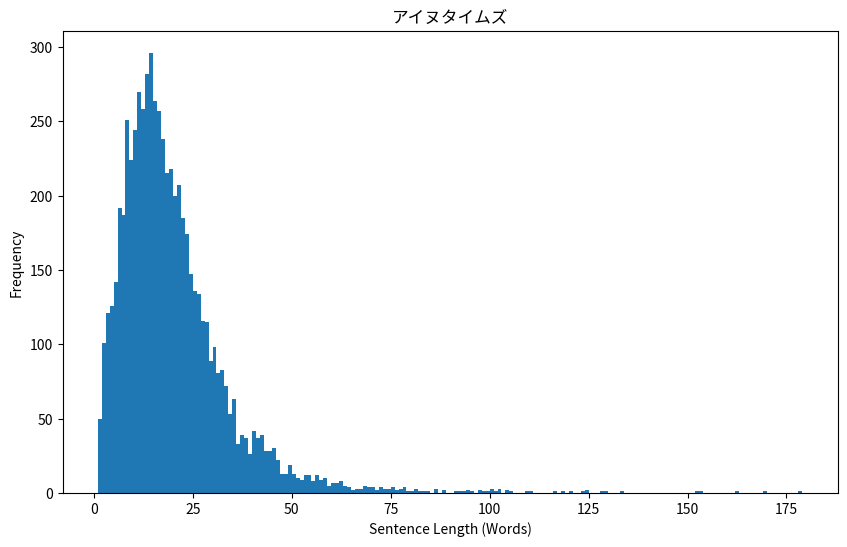

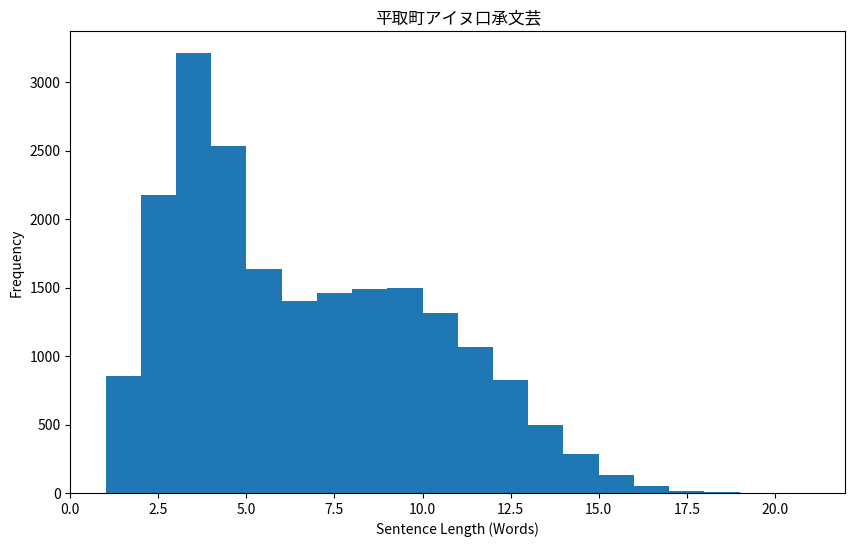

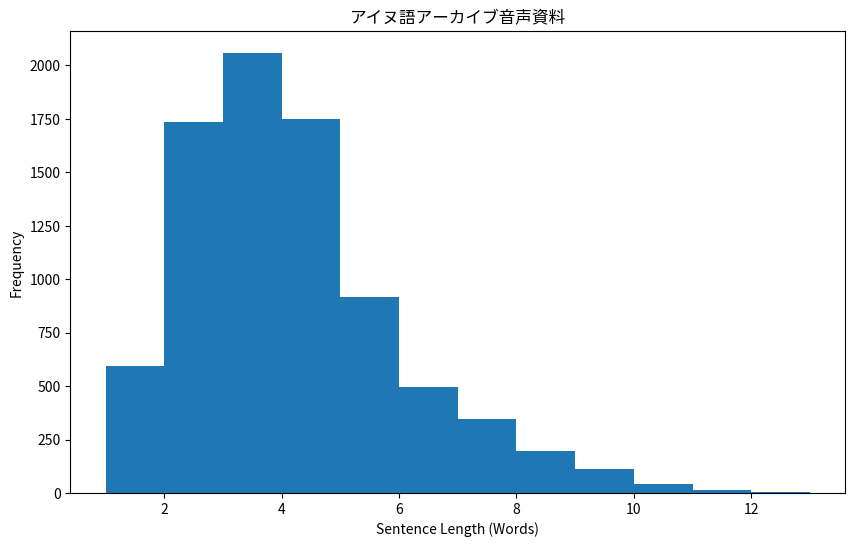

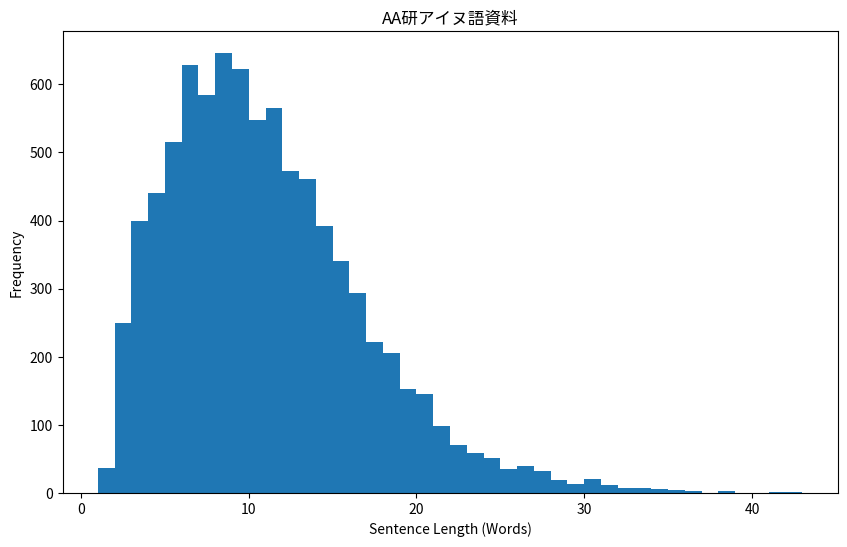

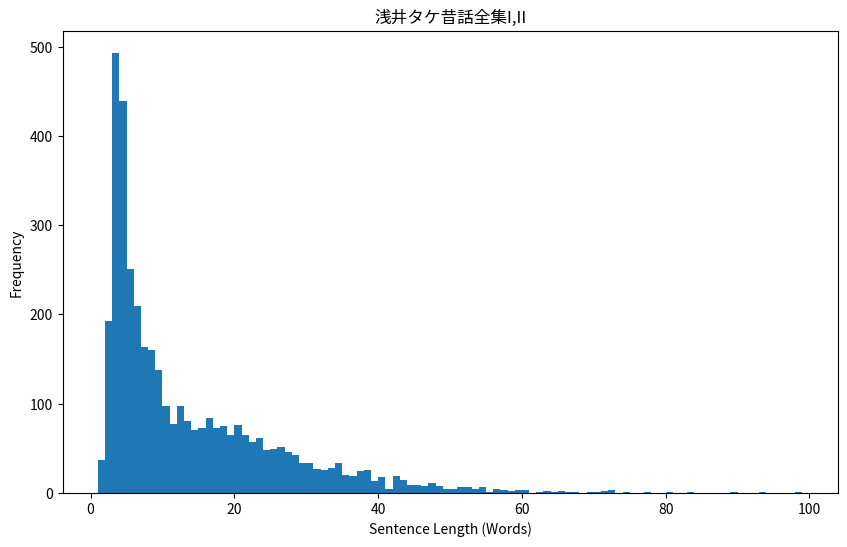

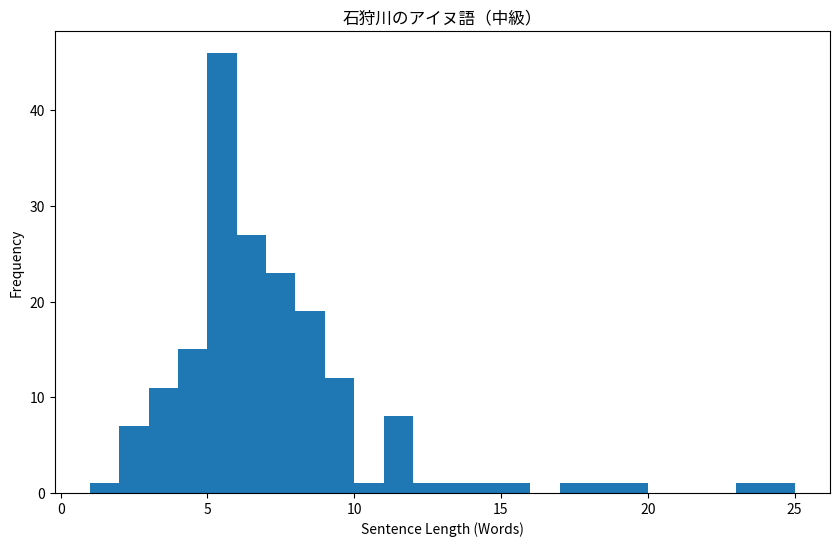

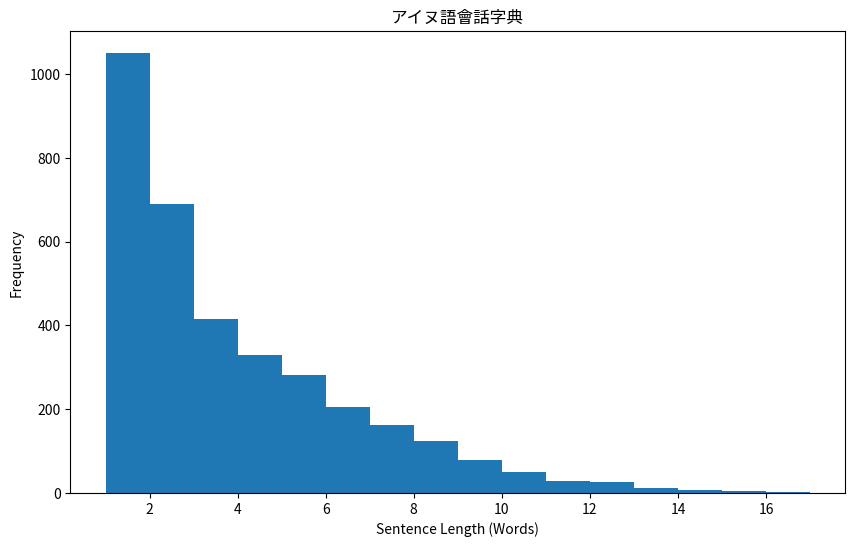

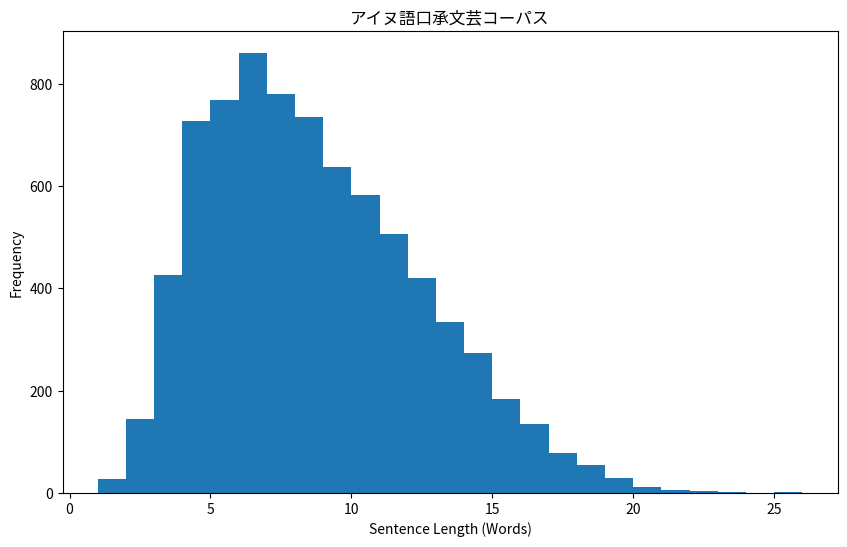

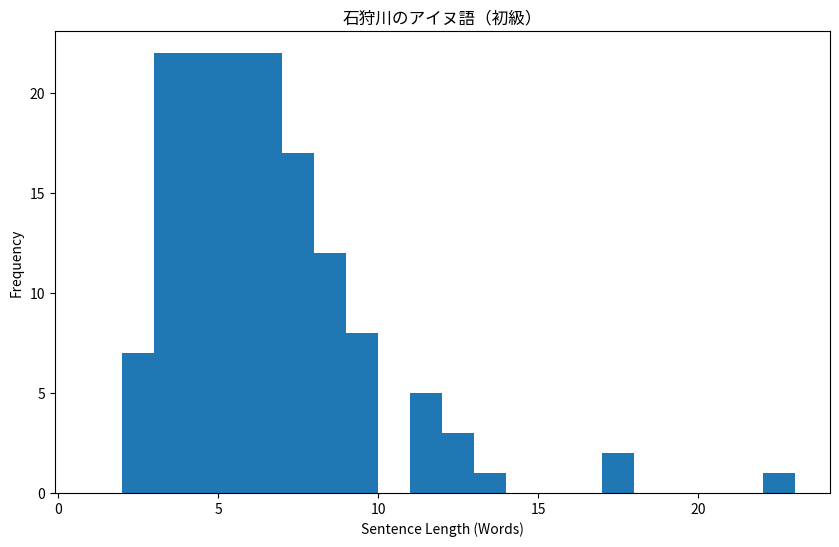

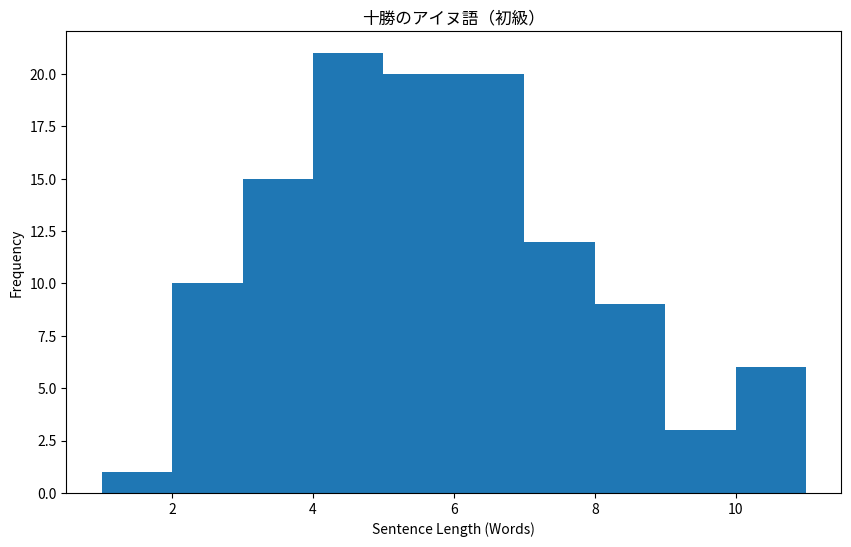

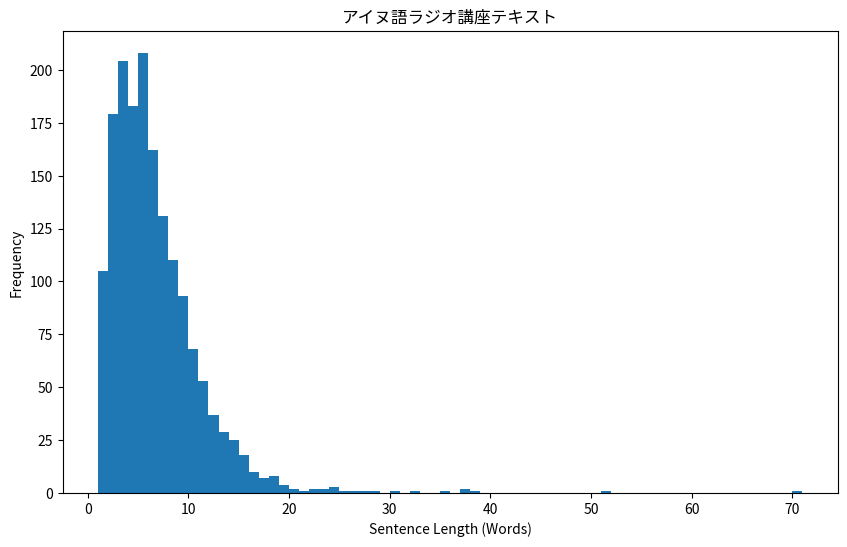

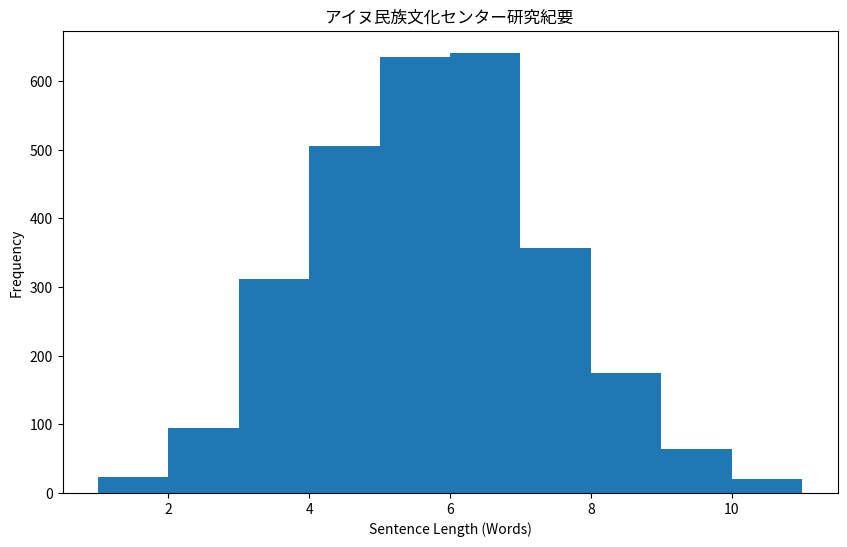

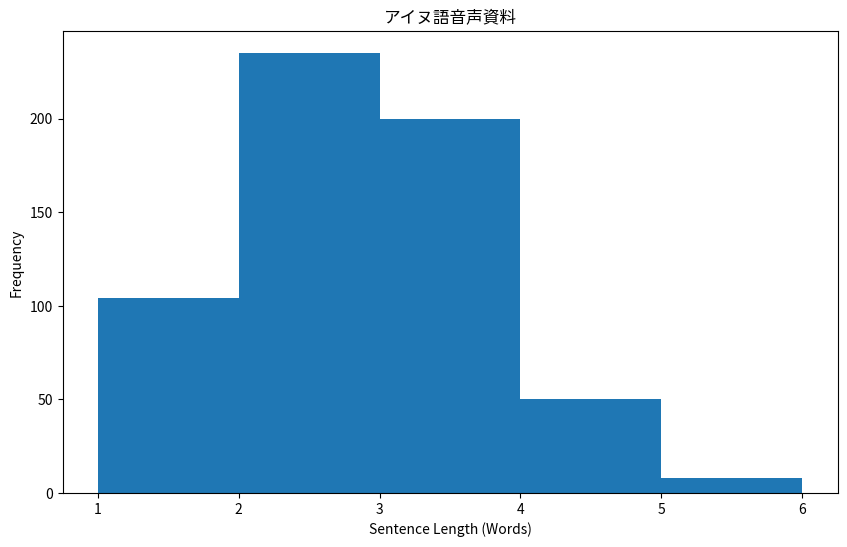

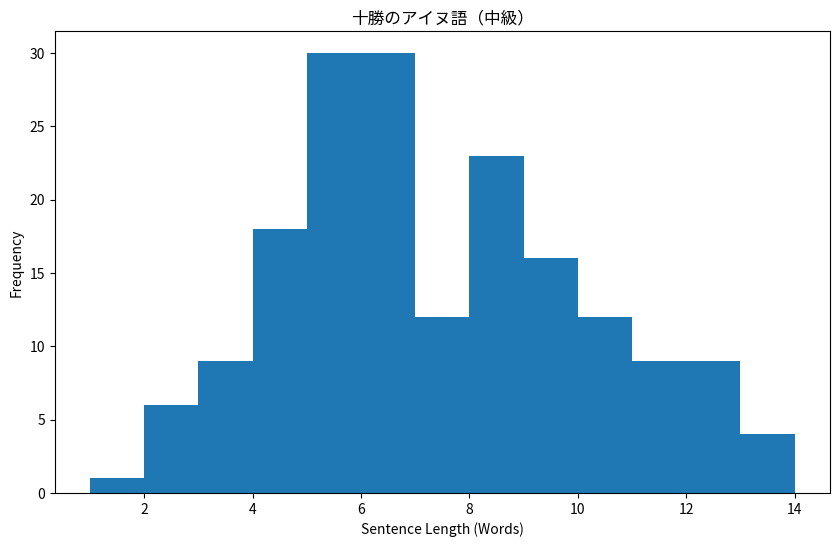

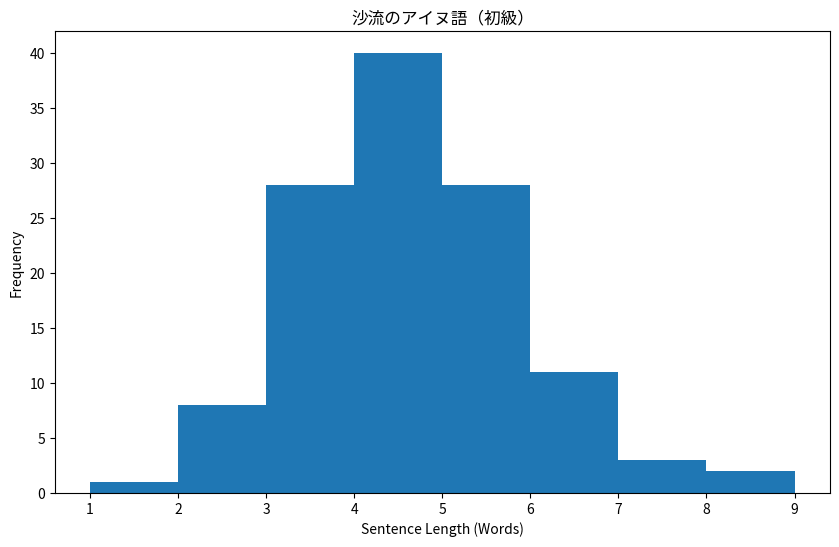

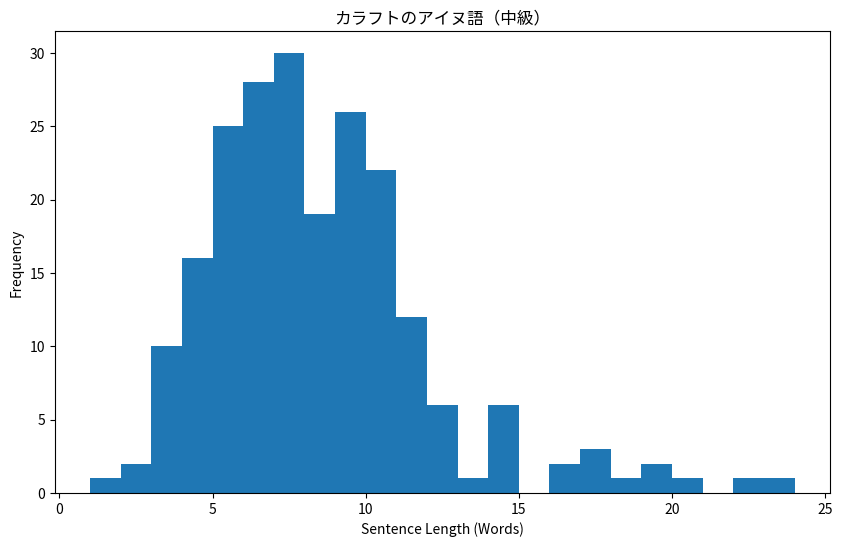

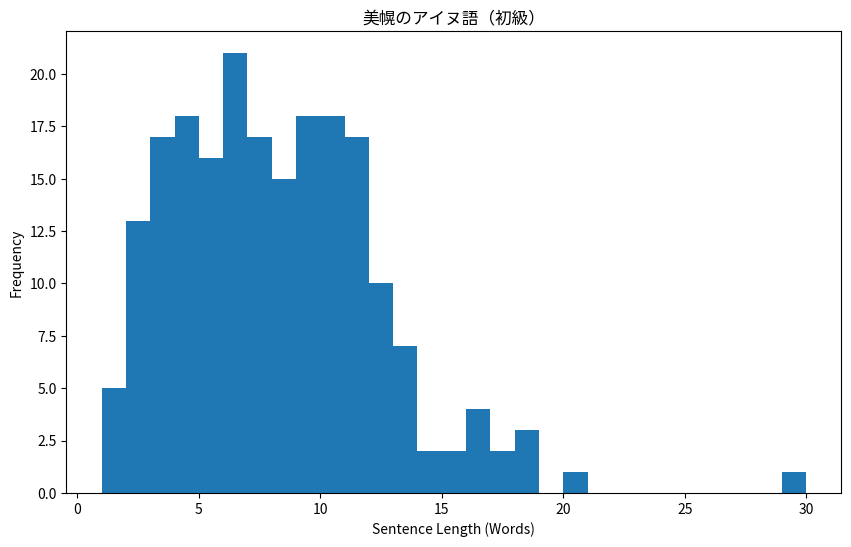

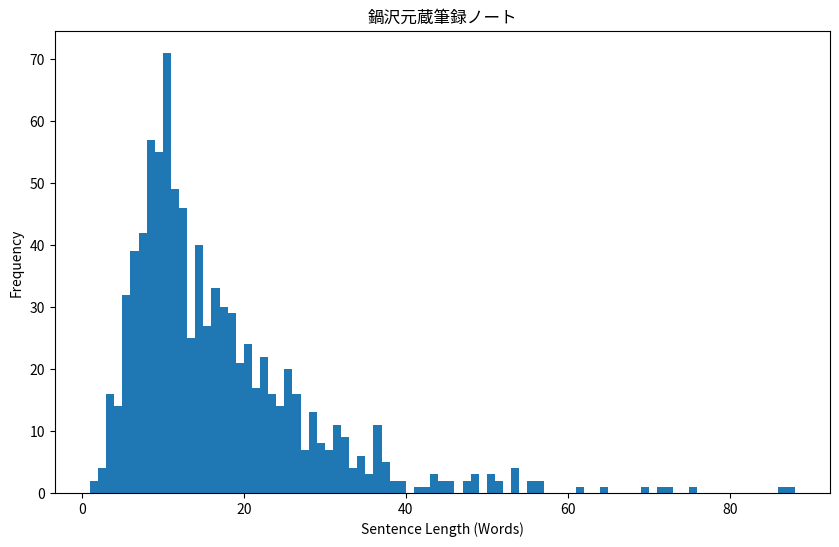

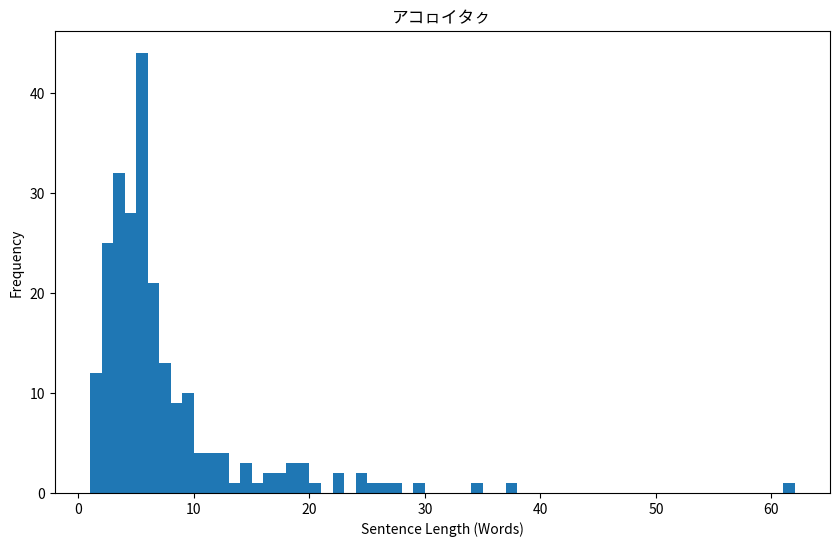

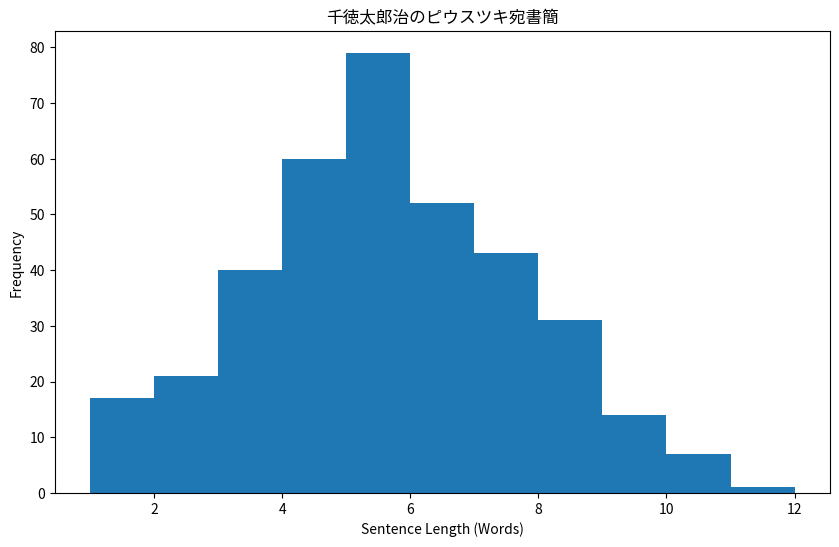

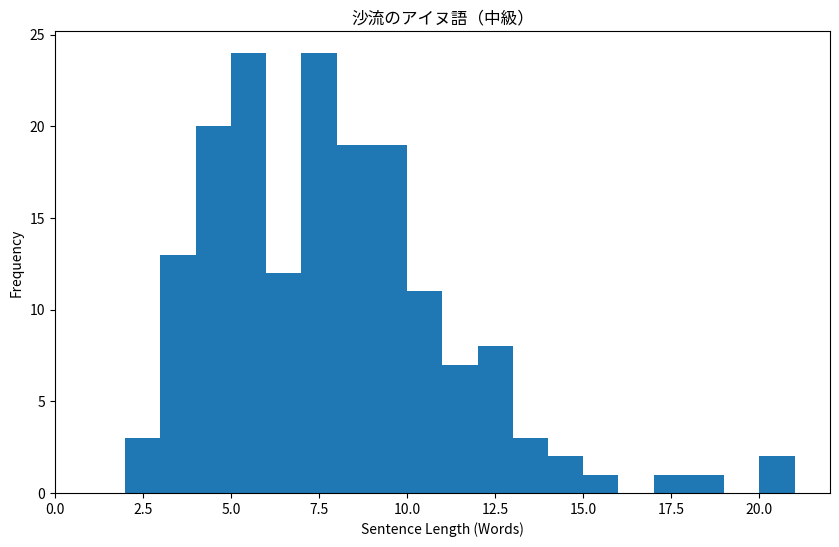

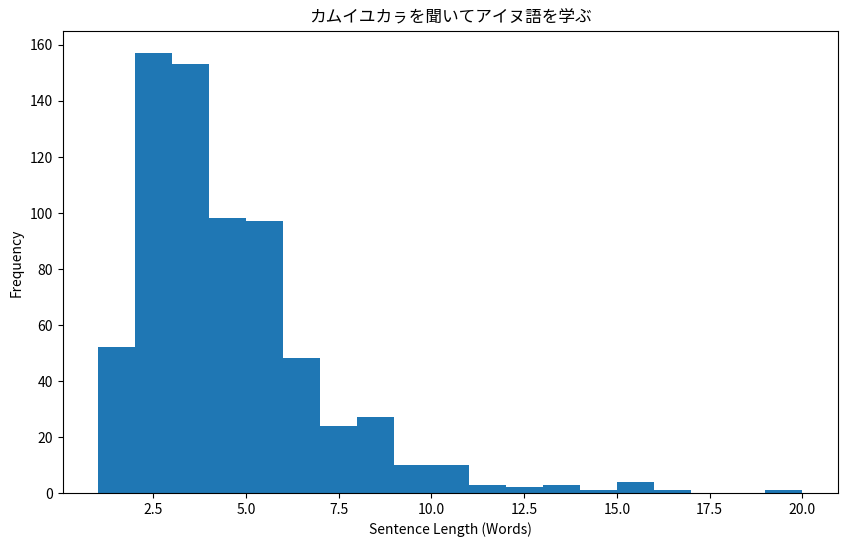

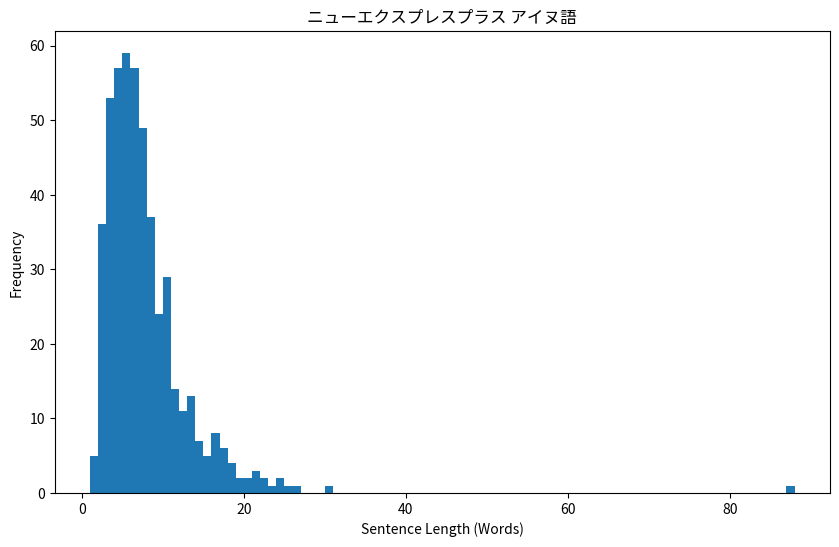

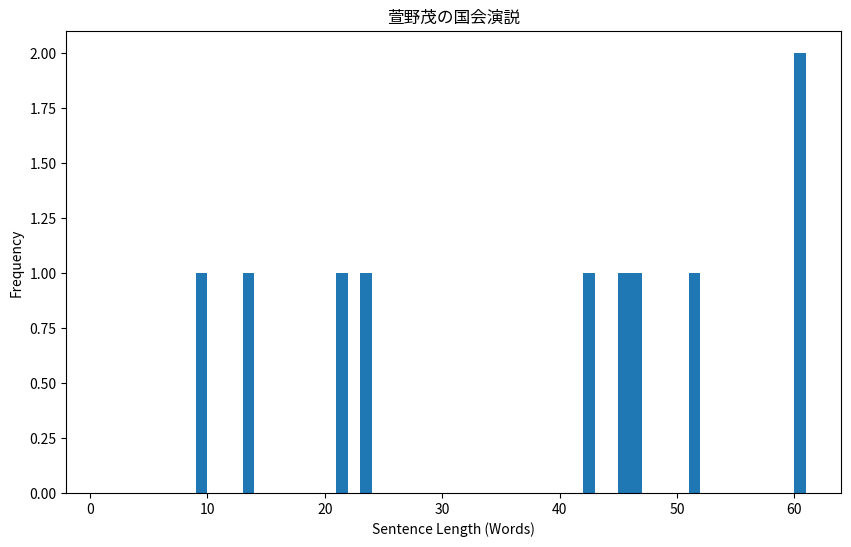

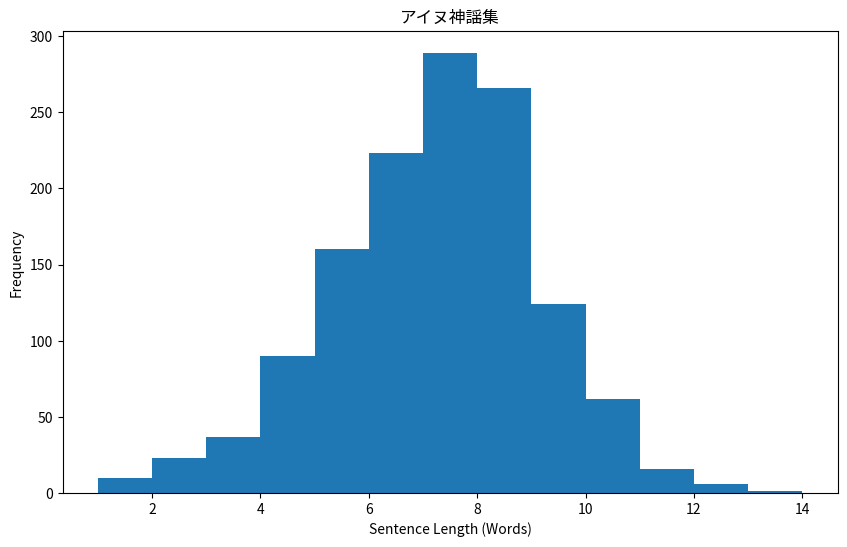

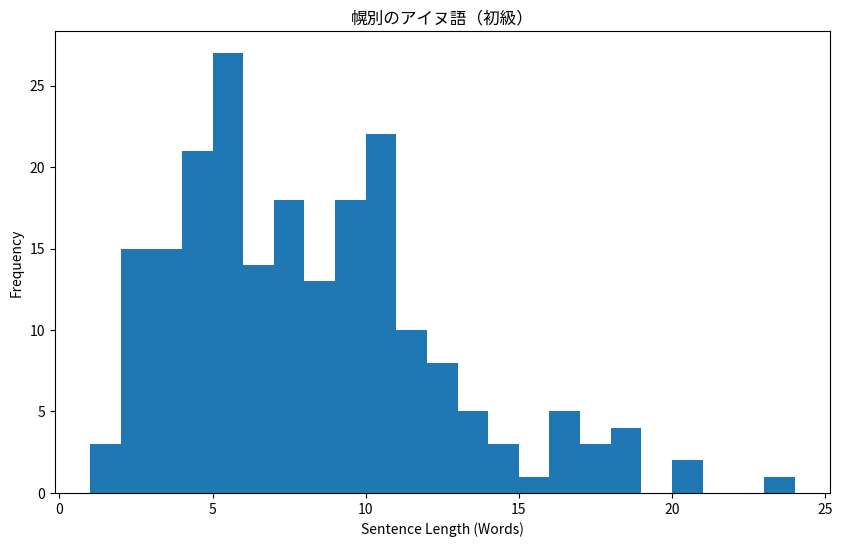

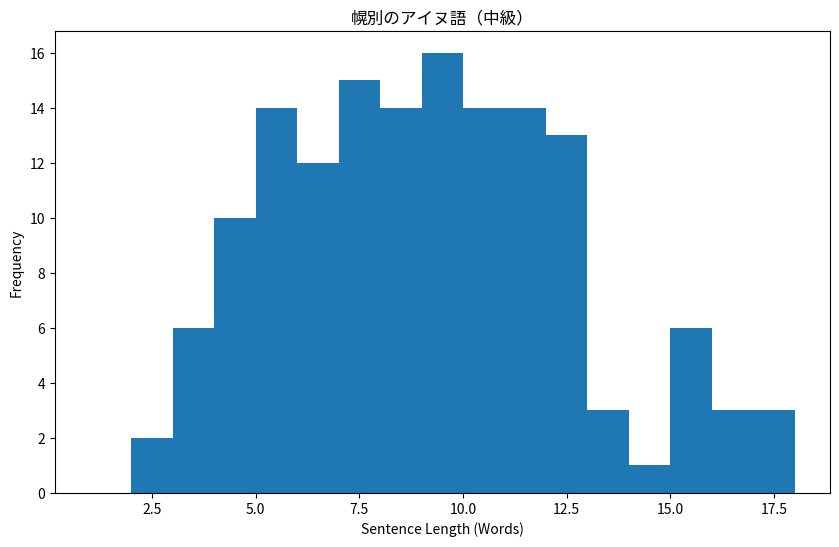

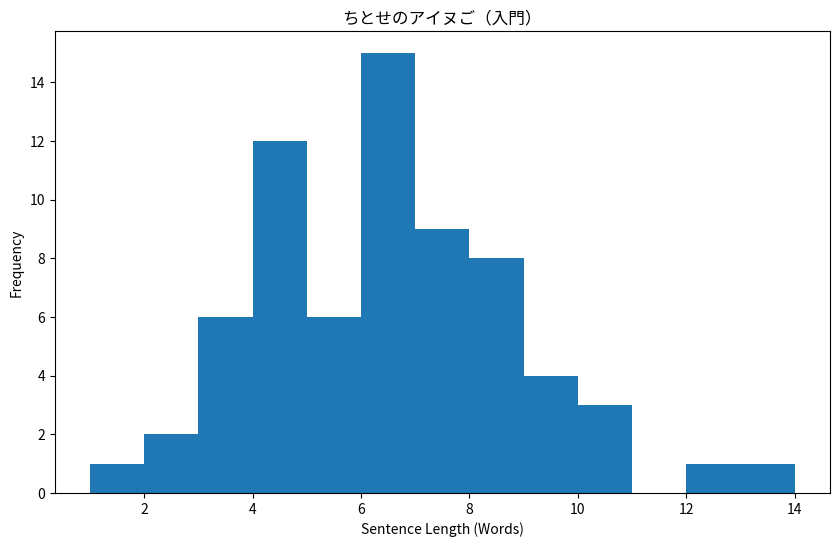

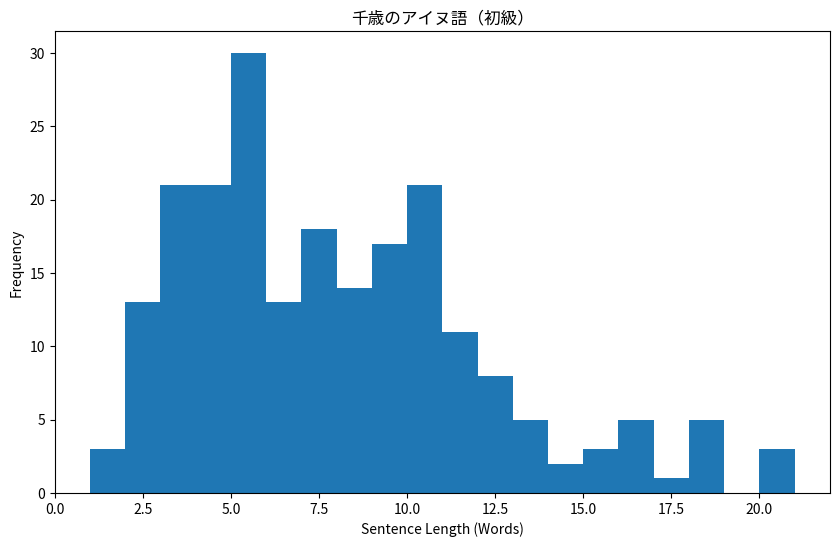

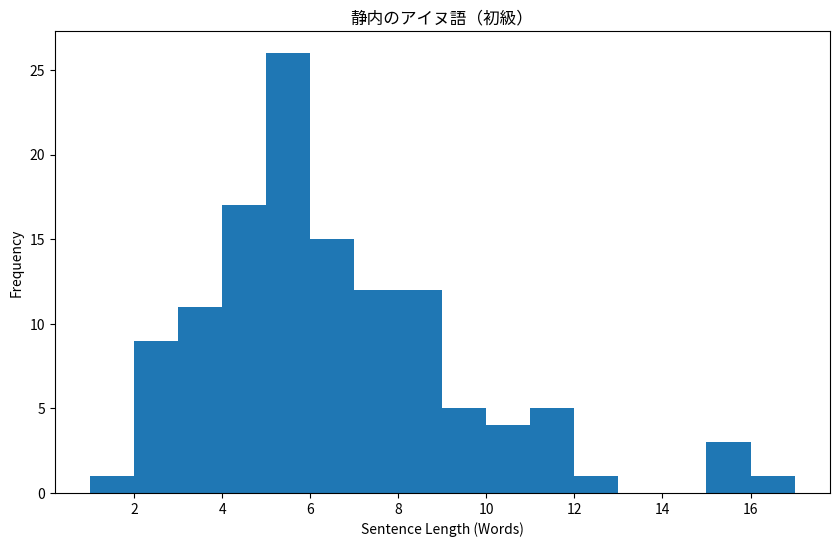

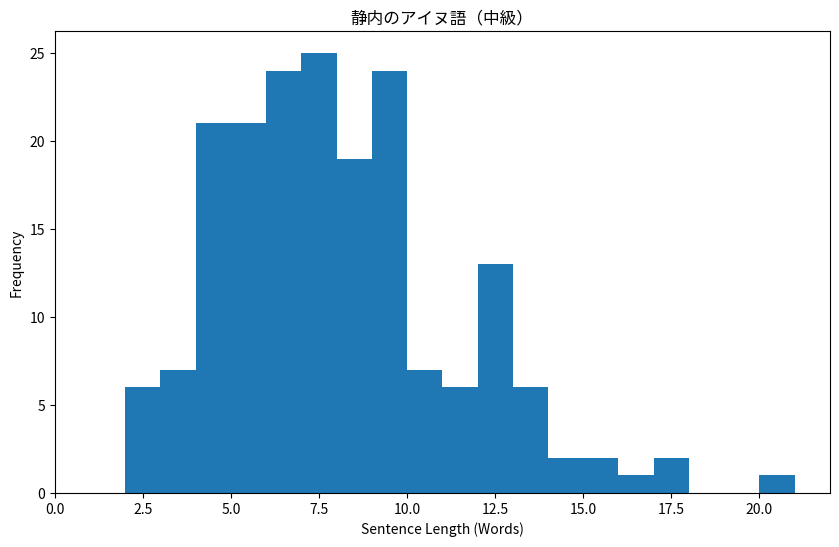

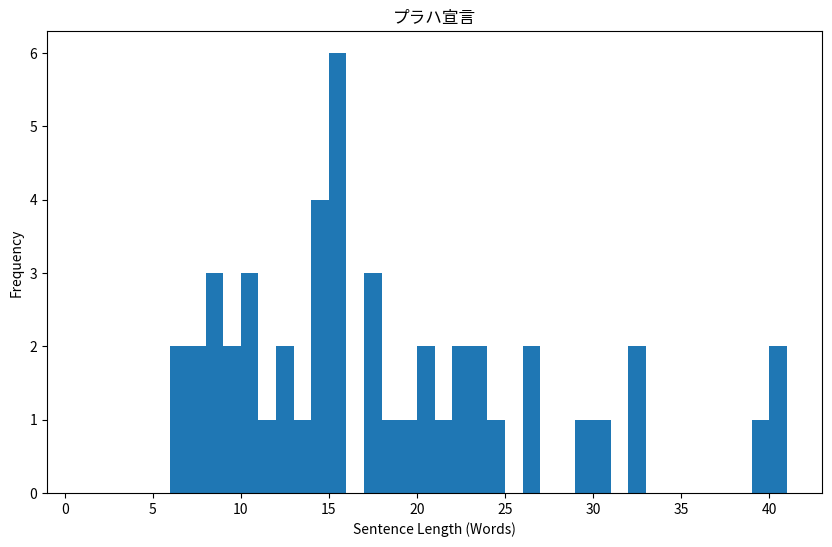

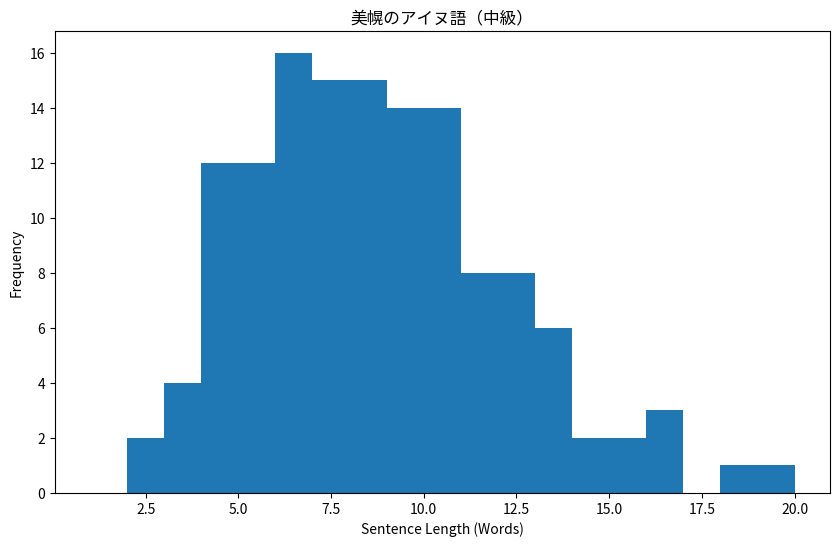

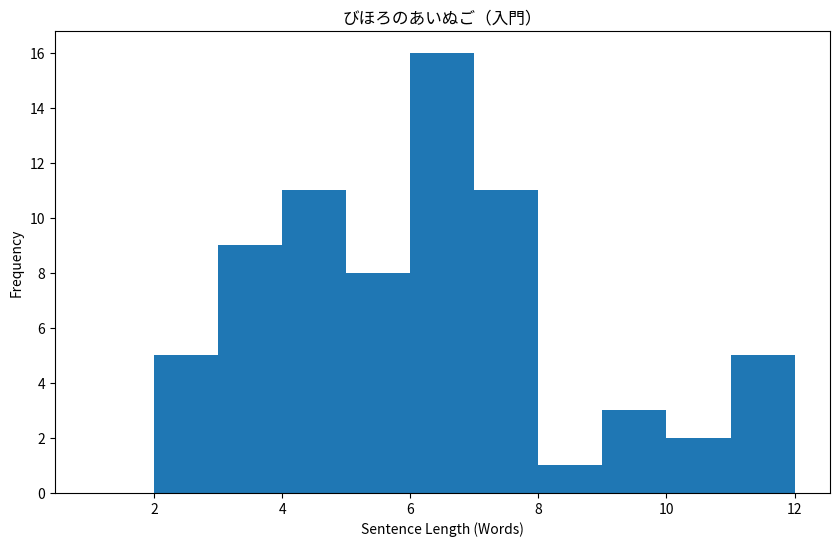

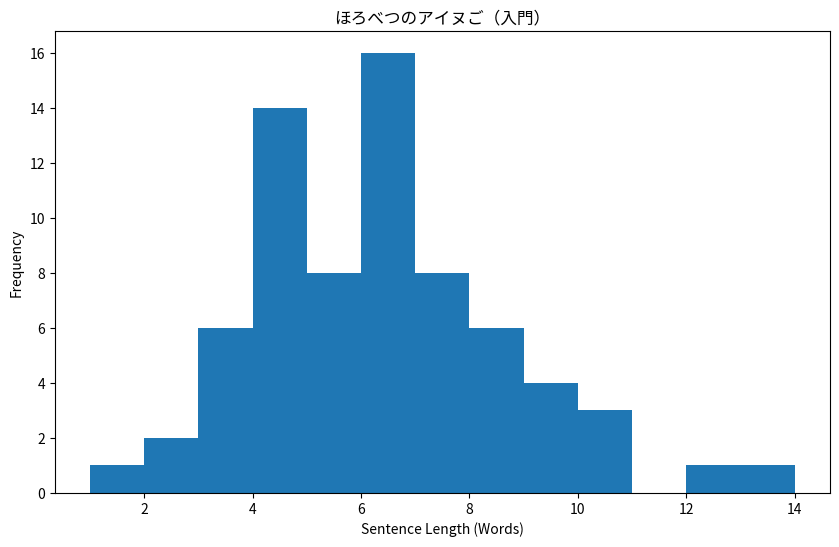

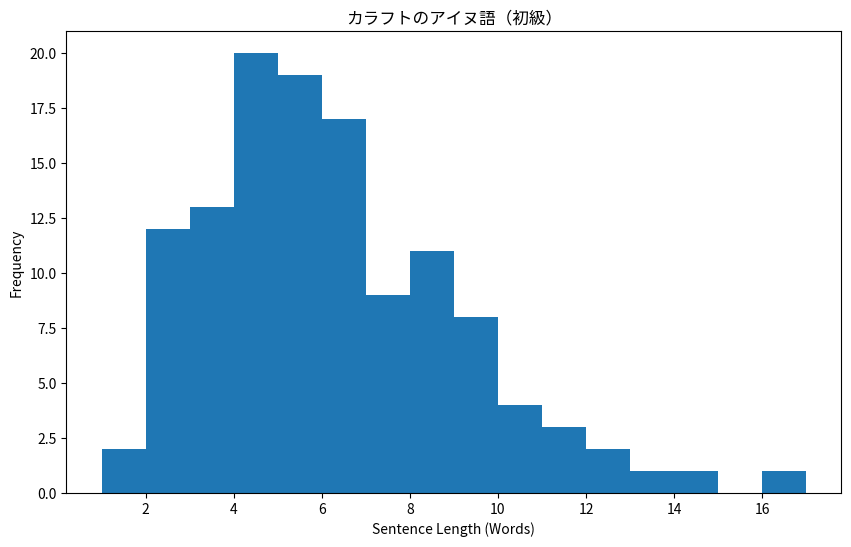

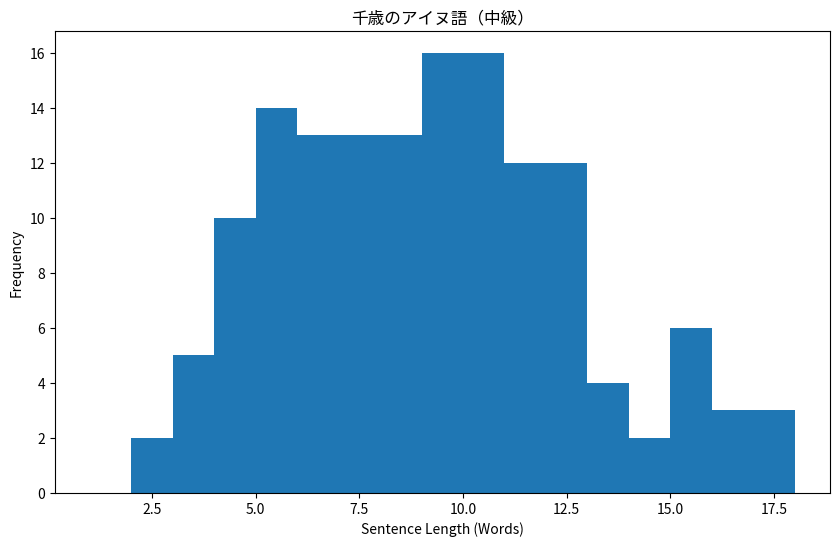

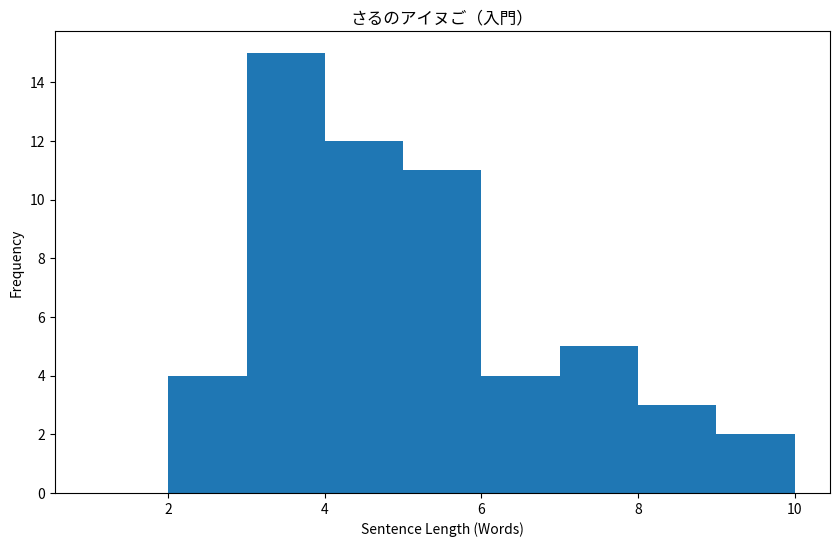

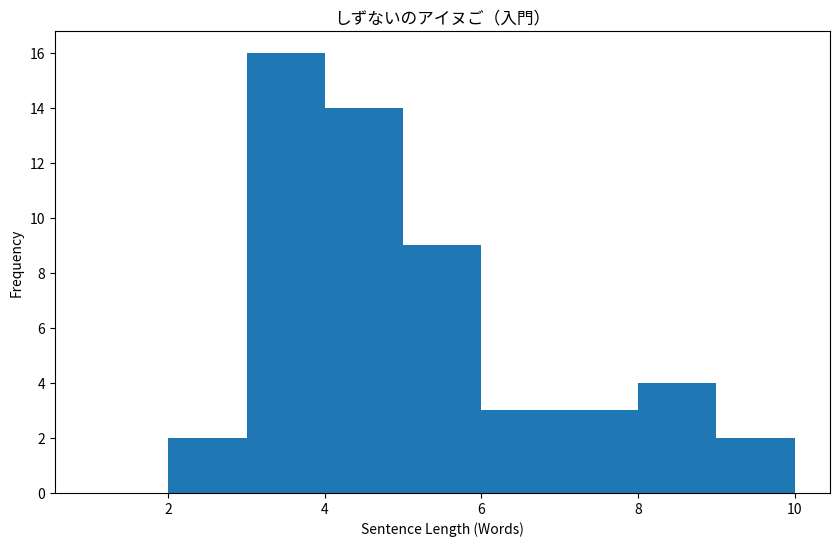

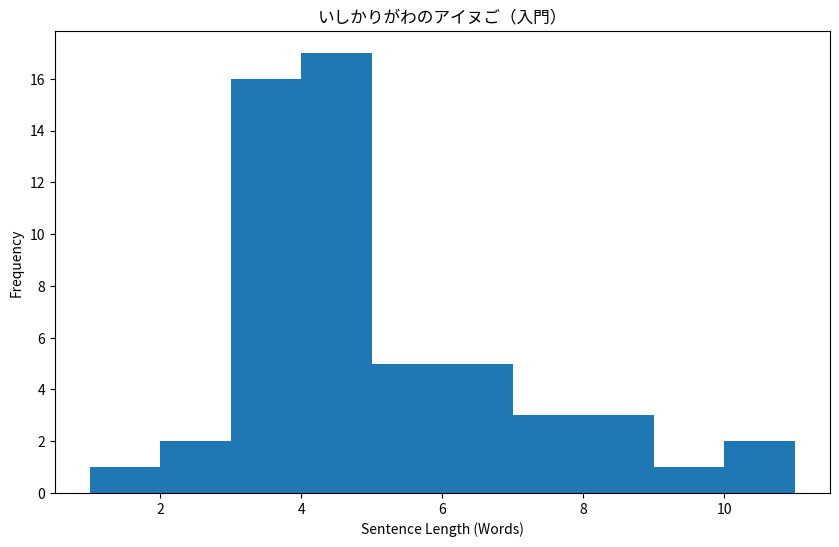

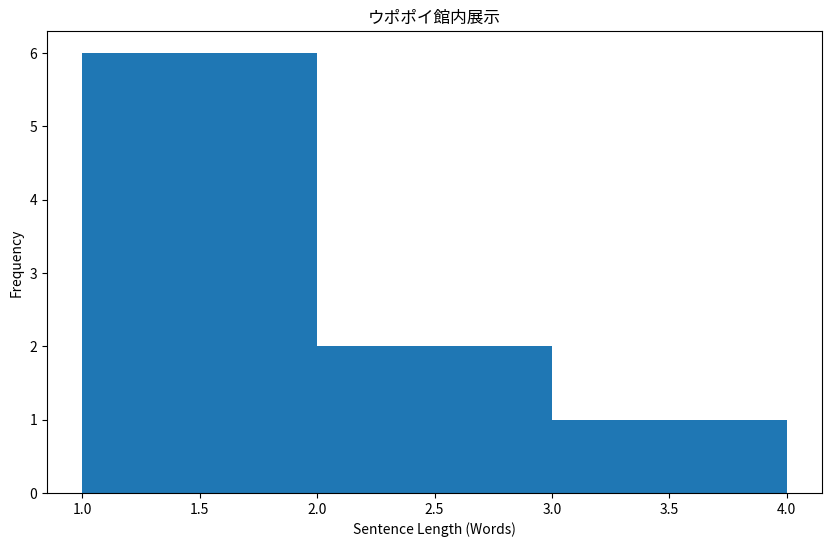

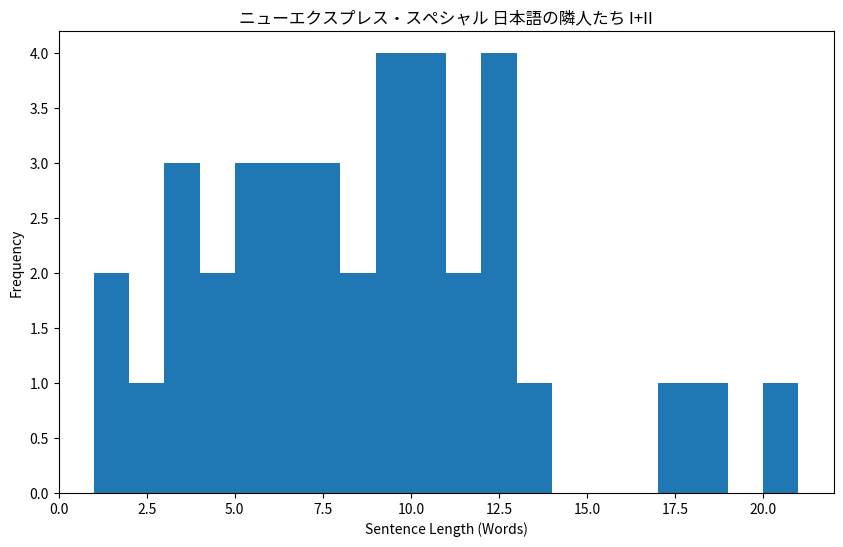

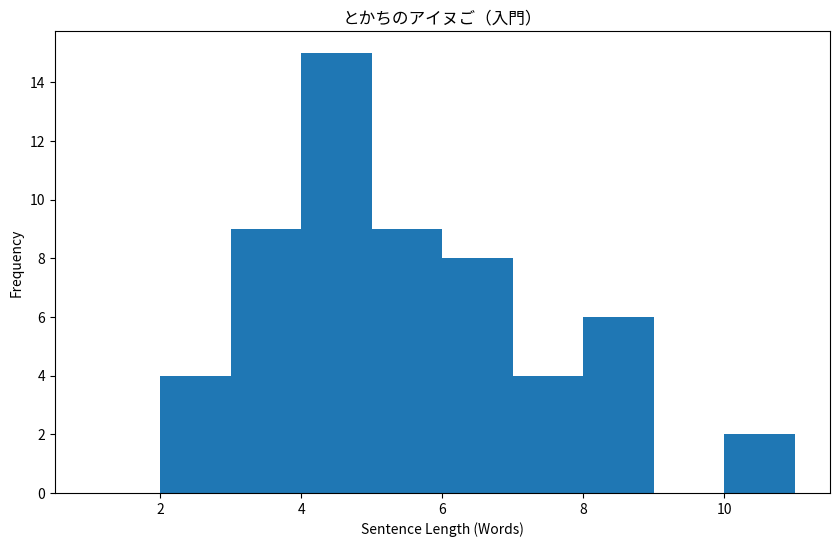

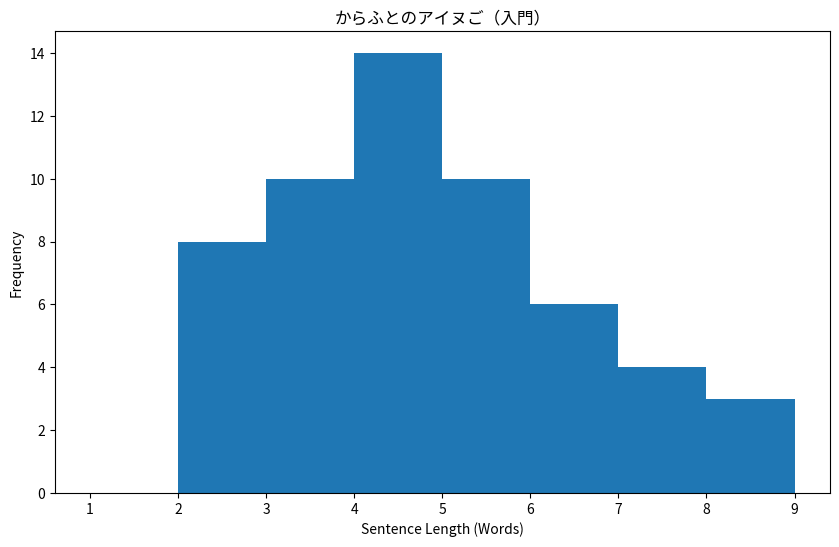

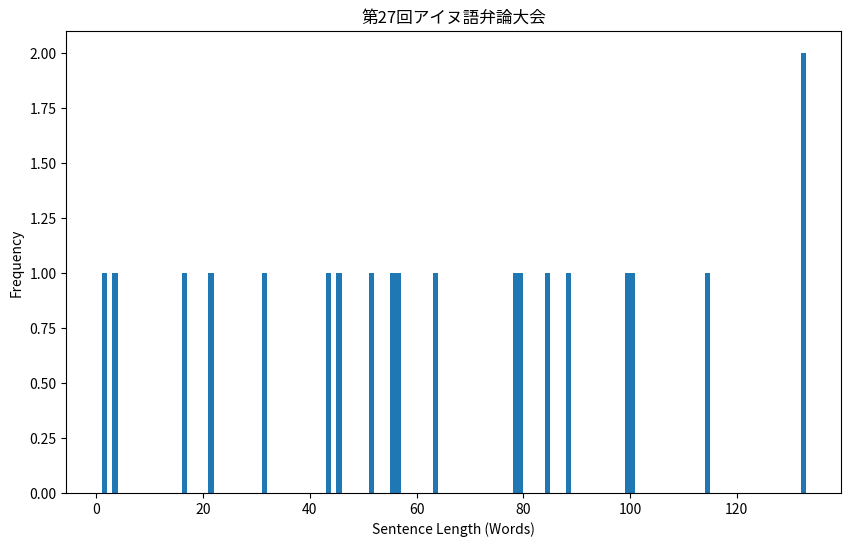

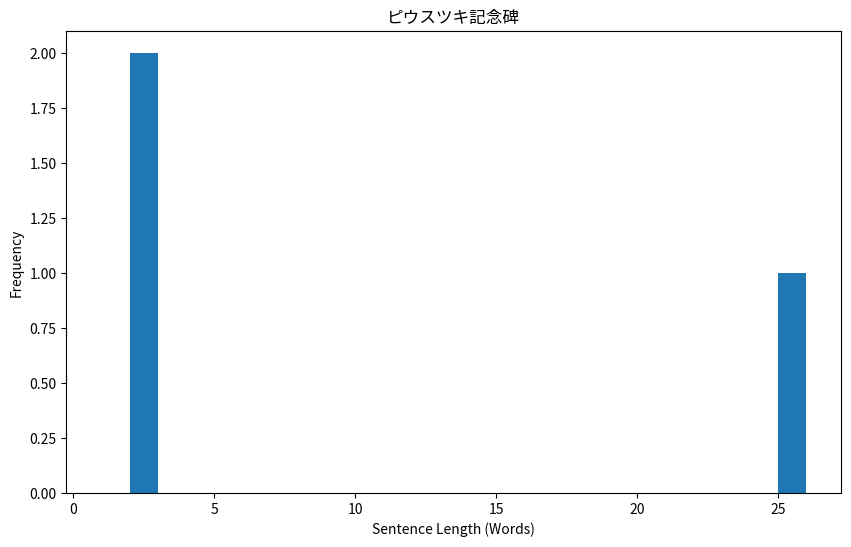

In [59]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties, fontManager

# set font to support CJK
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
fontManager.addfont(font_path)
font_prop = FontProperties(fname=font_path)

plt.rcParams["font.family"] = ["Noto Sans CJK JP"]

# plot all books

# Combine all lengths into one list
all_lengths: list[int] = []
for lengths in sentences_words_length.values():
    all_lengths.extend(lengths)

IMAGE_OUTPUT_DIR = Path("../output/images/sentence_length/")
IMAGE_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

plt.figure(figsize=(10, 6))
plt.hist(all_lengths, bins=range(1, max(all_lengths) + 1))
plt.title("All Books Combined")
plt.xlabel("Sentence Length (Words)")
plt.ylabel("Frequency")
plt.savefig(IMAGE_OUTPUT_DIR / "all_books.png")
plt.show()


# plot each book

for book, lengths in sentences_words_length.items():
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=range(1, max(lengths) + 1))
    plt.title(book)
    plt.xlabel("Sentence Length (Words)")
    plt.ylabel("Frequency")
    plt.savefig(IMAGE_OUTPUT_DIR / f"{book}.png")


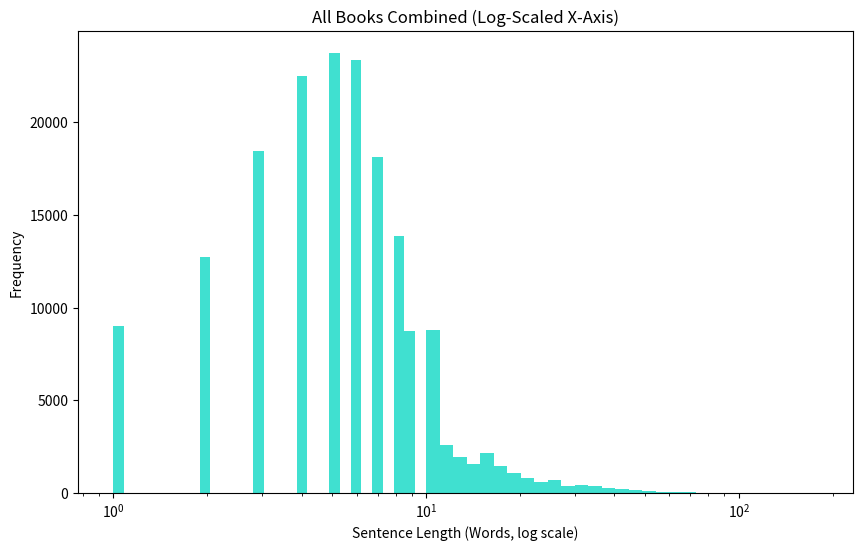

/tmp/ipykernel_929579/1926773152.py:45: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


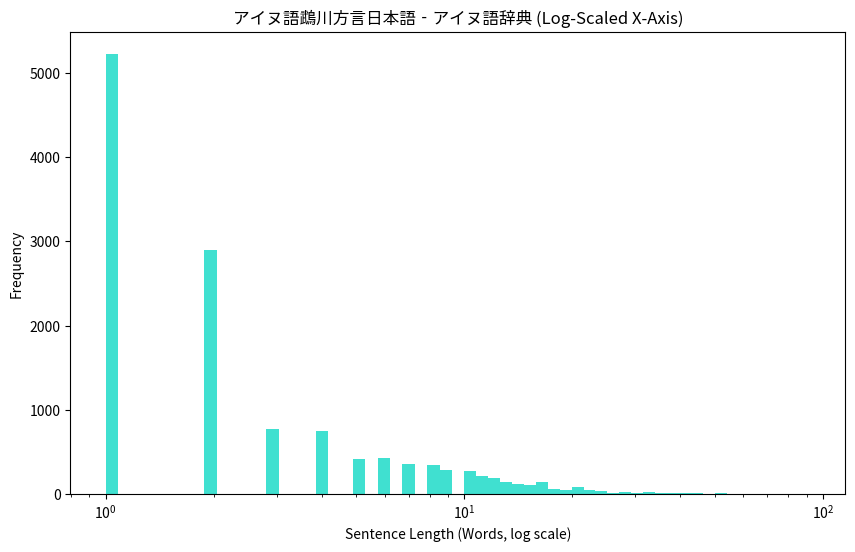

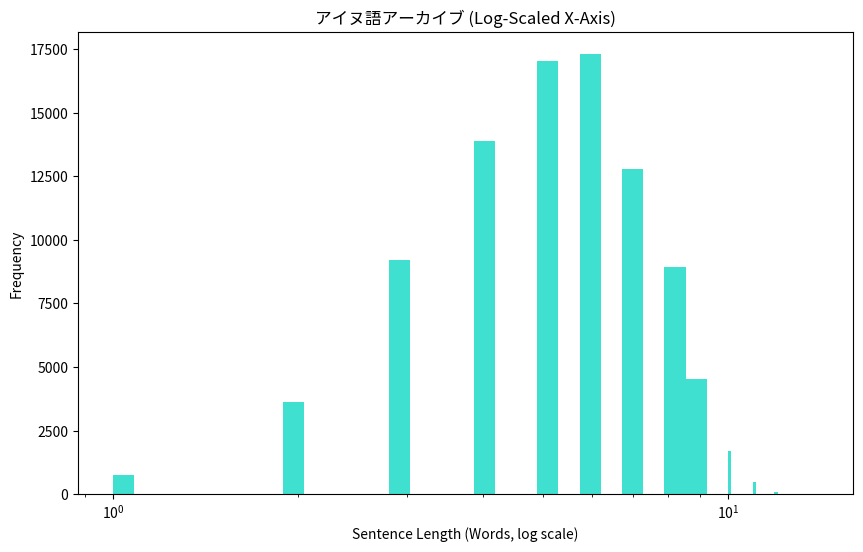

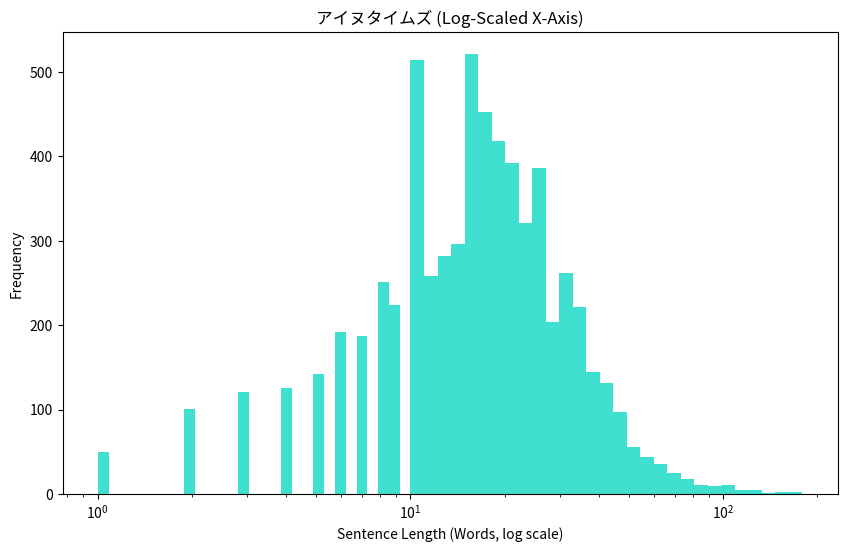

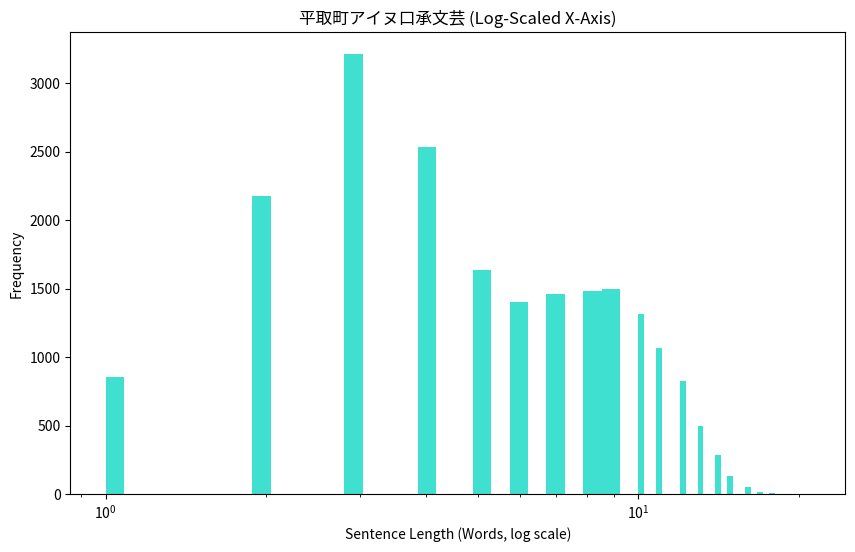

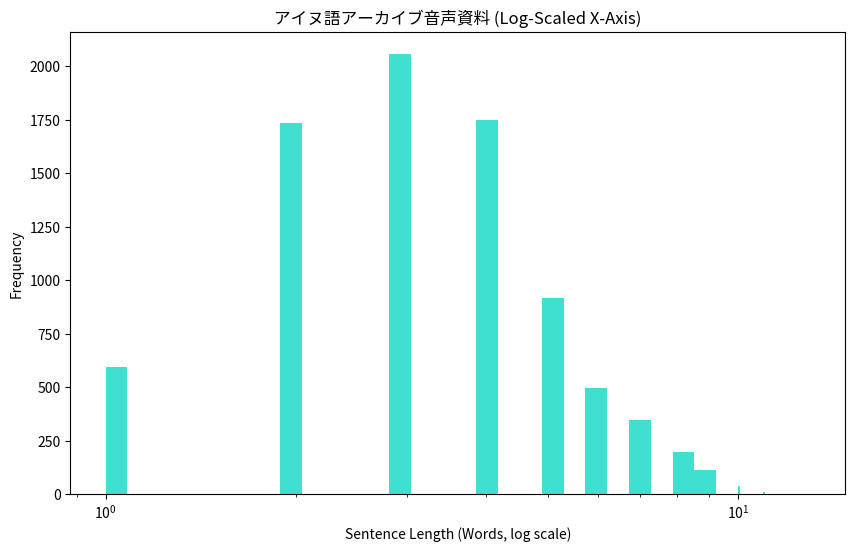

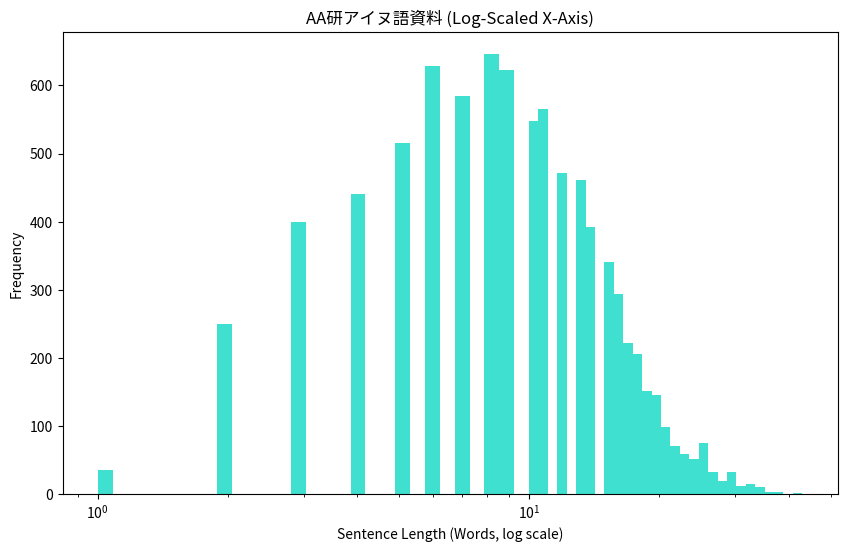

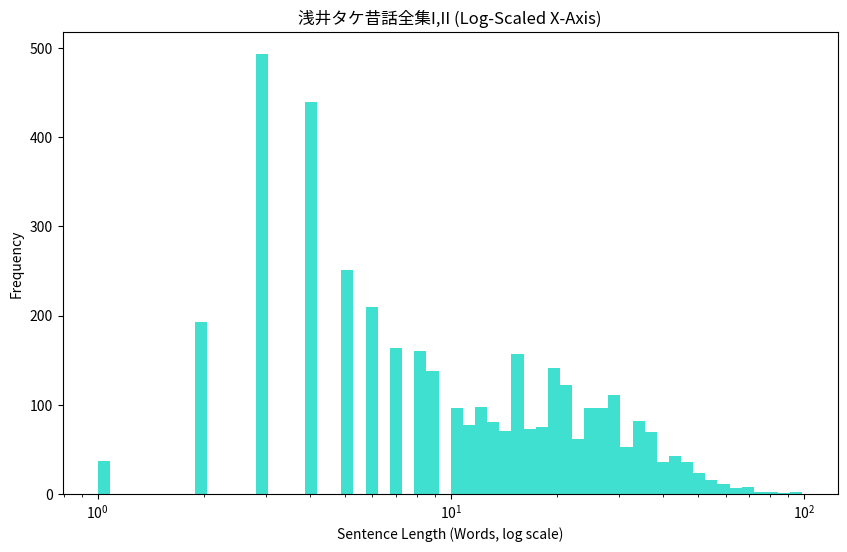

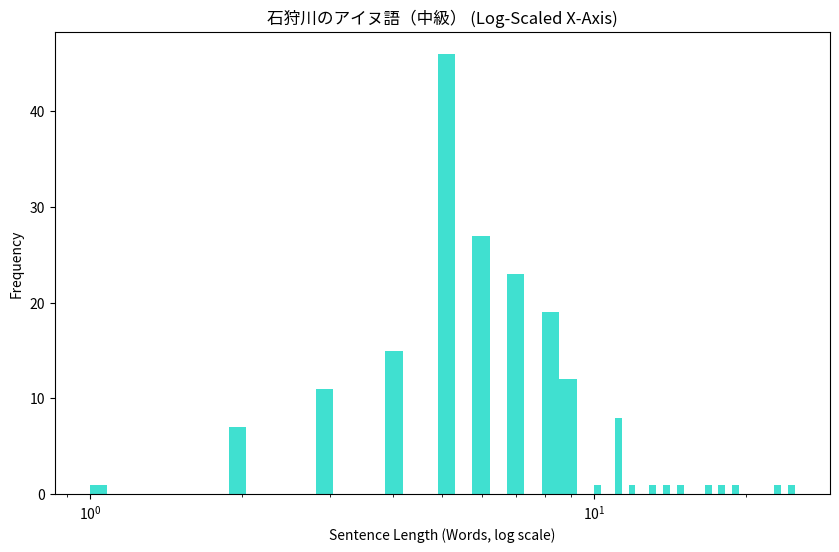

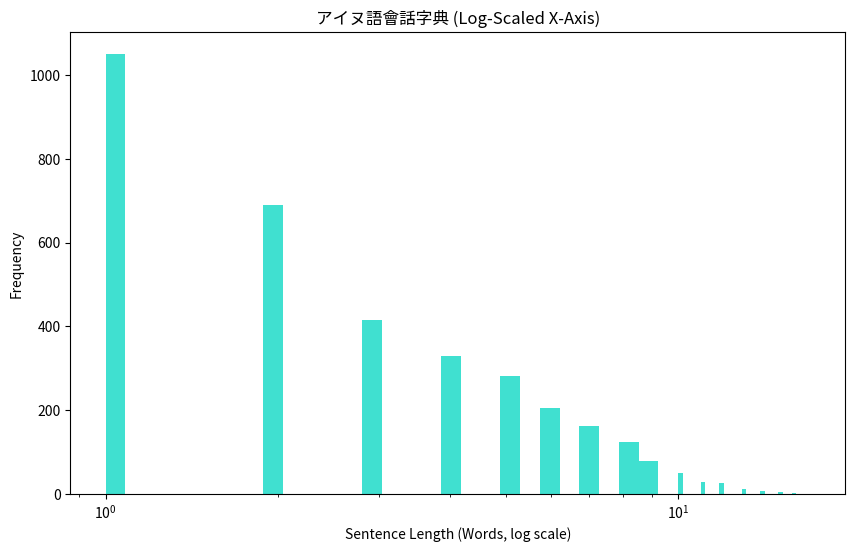

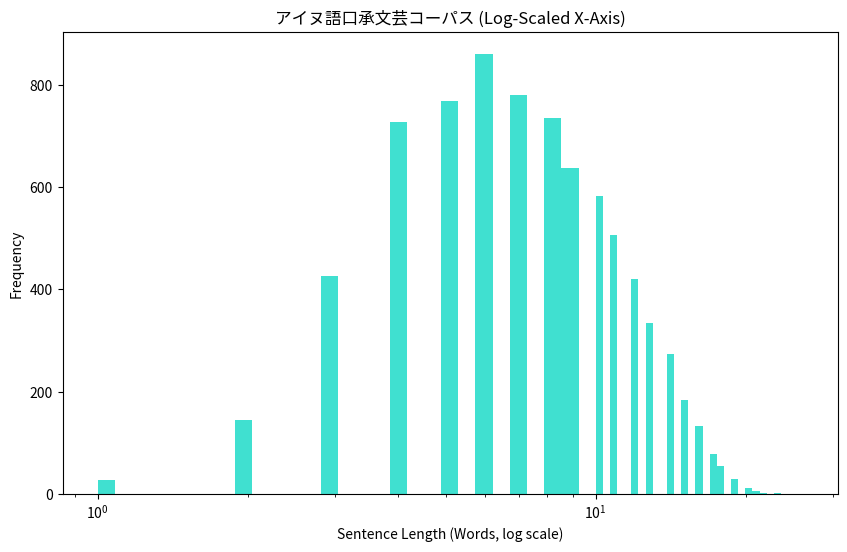

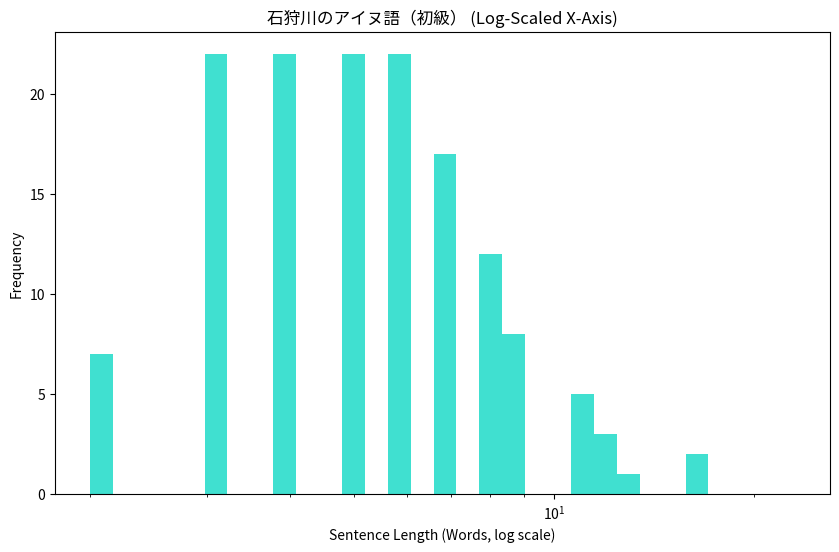

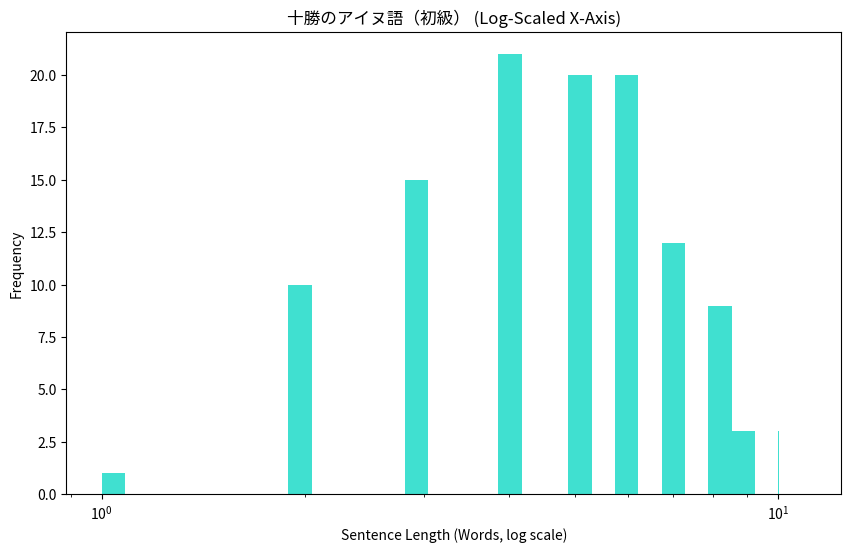

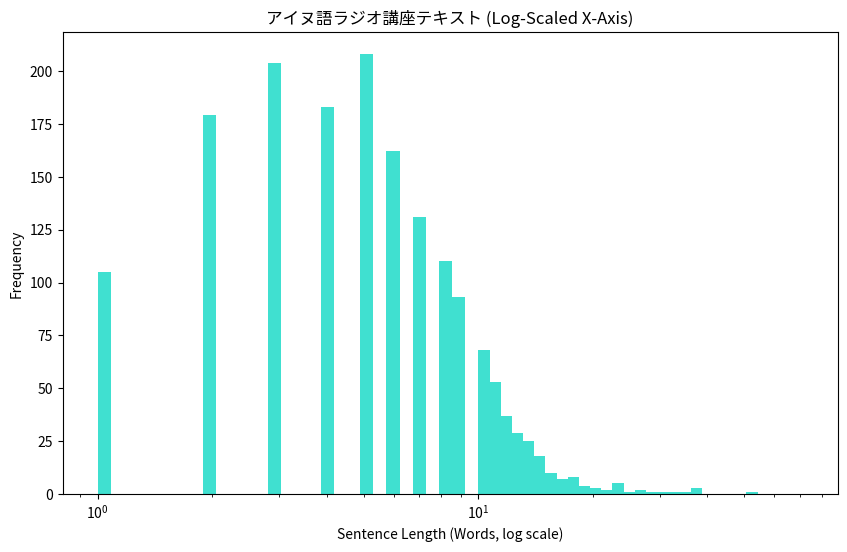

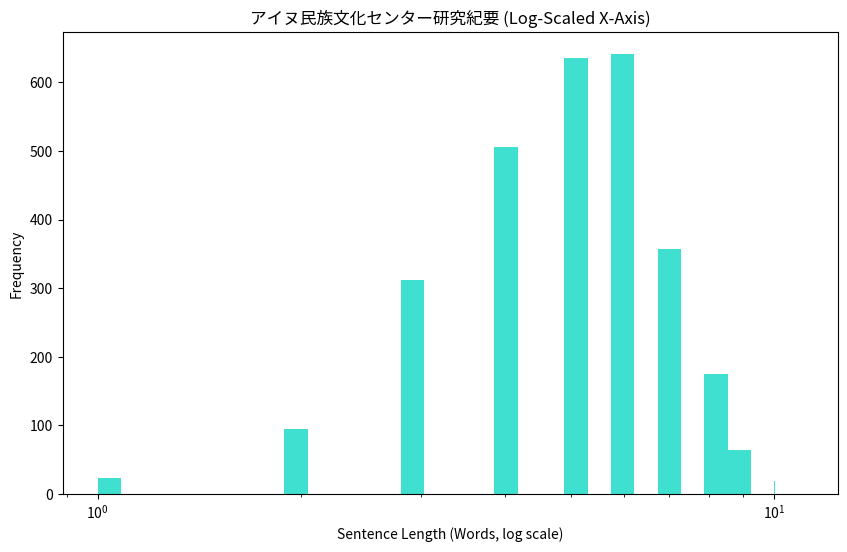

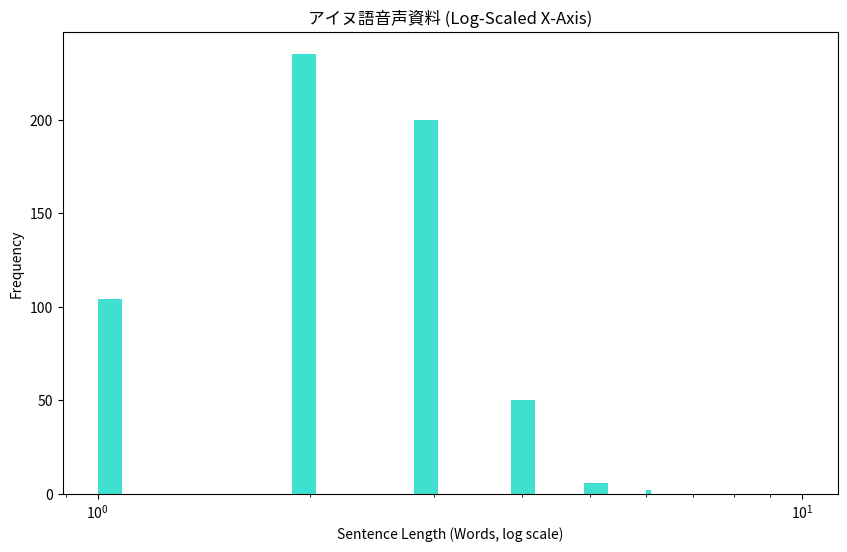

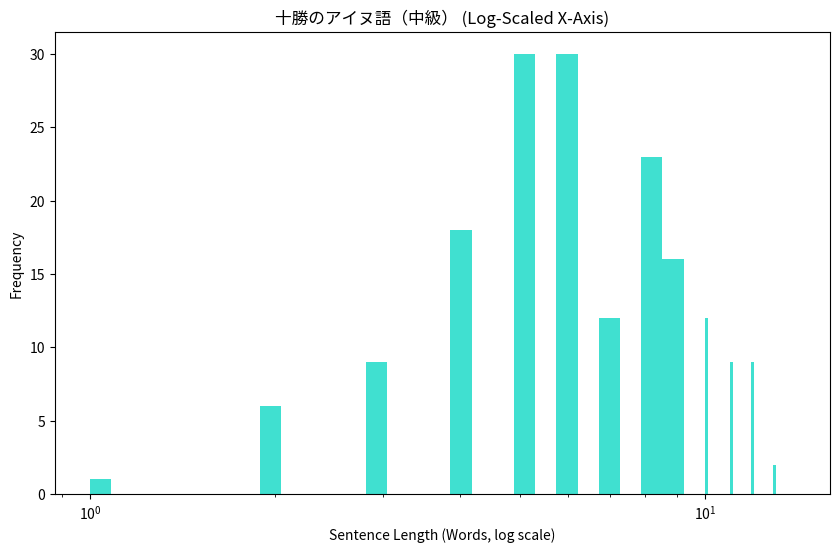

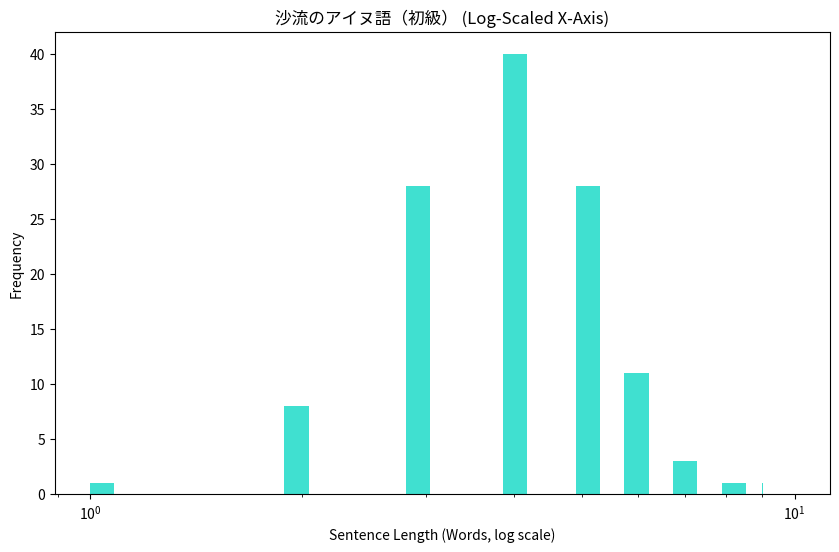

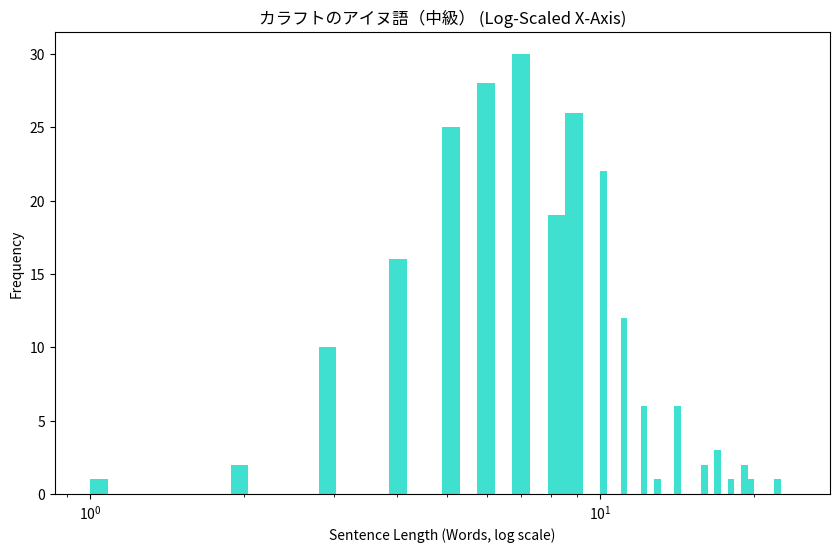

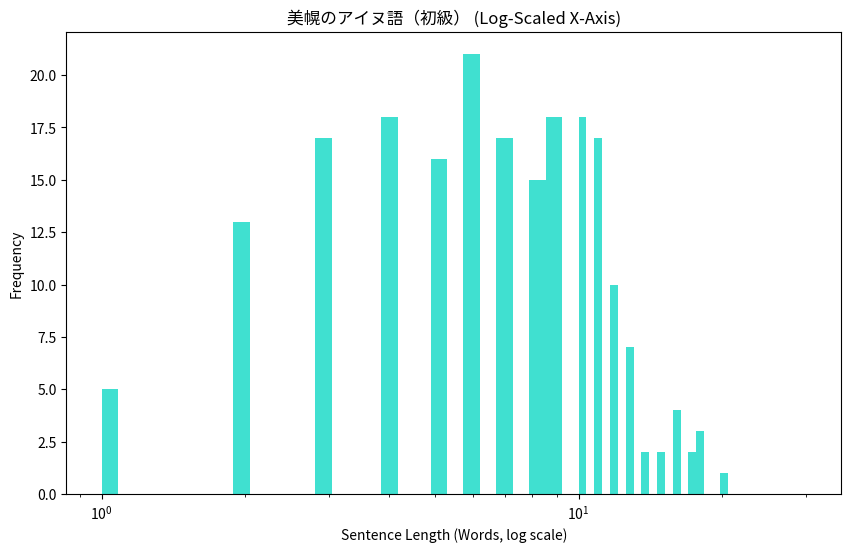

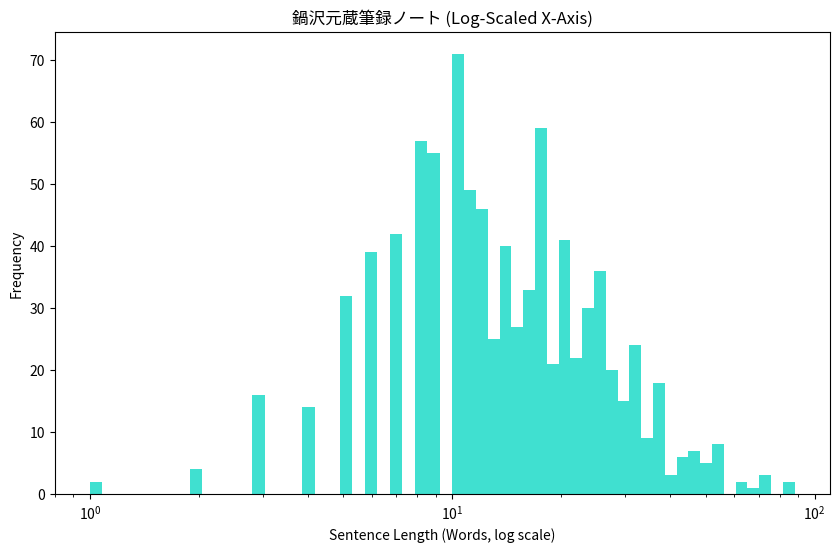

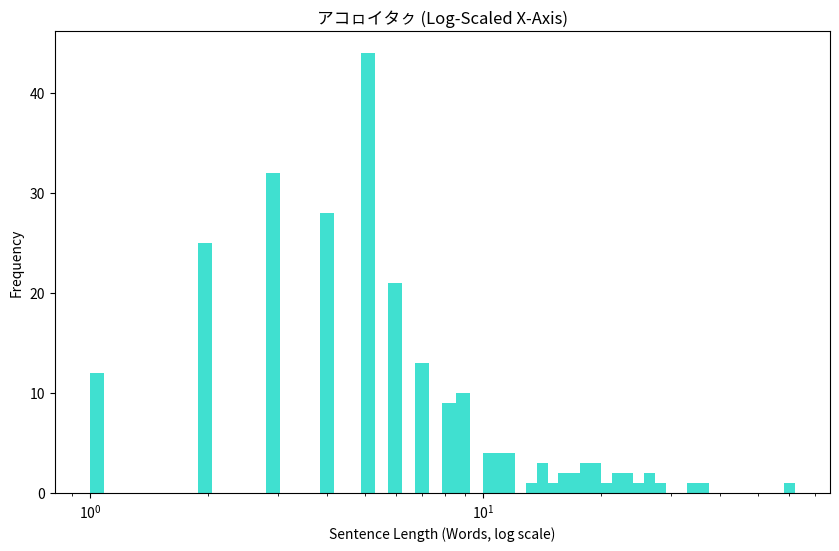

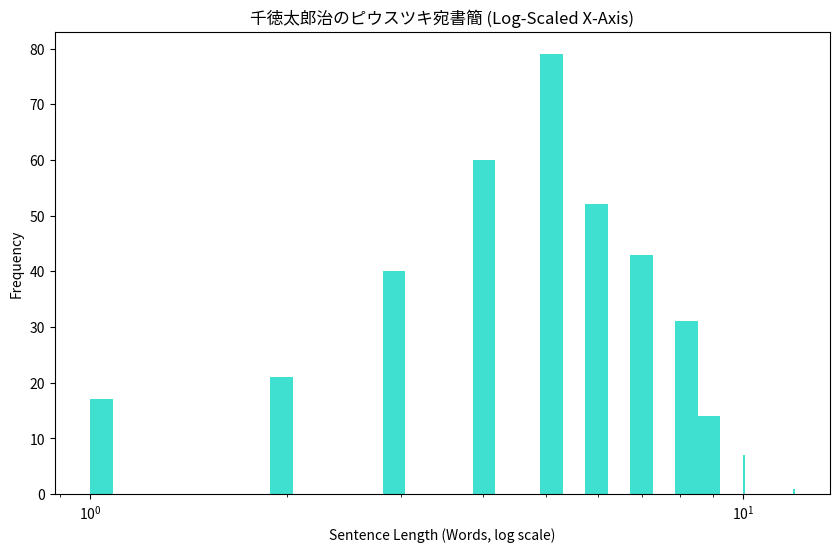

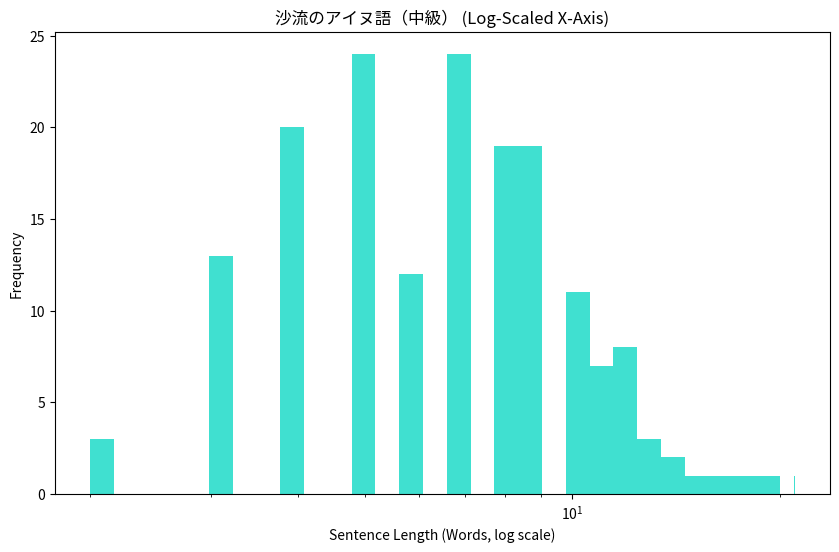

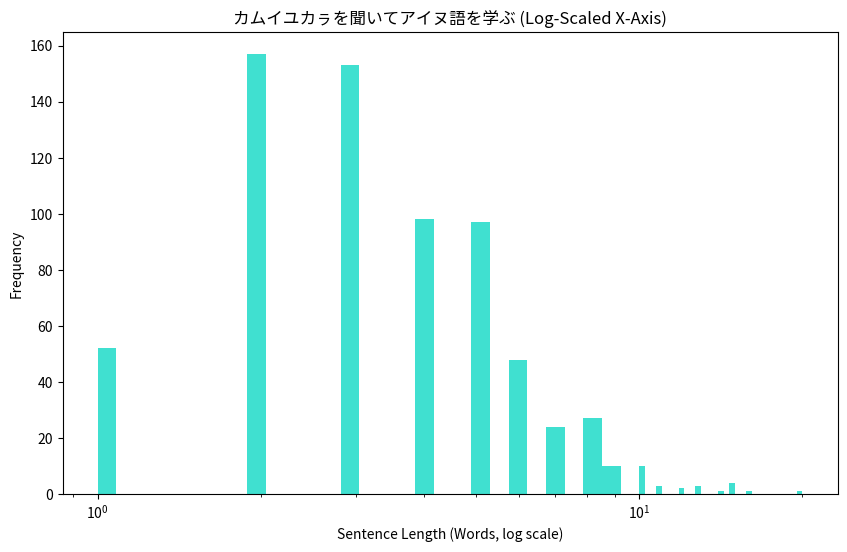

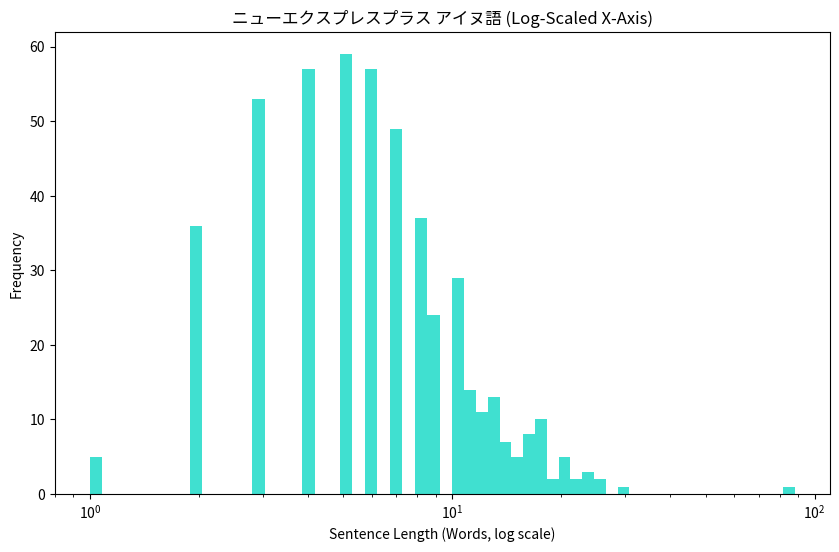

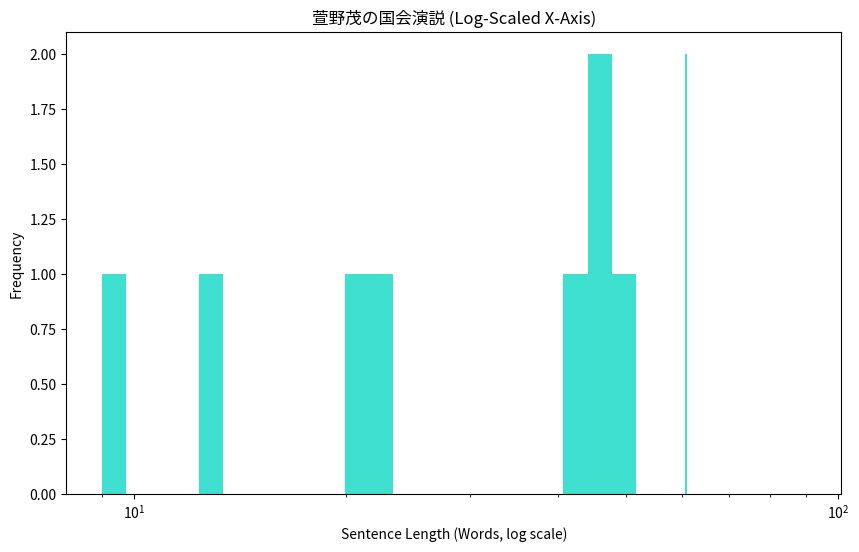

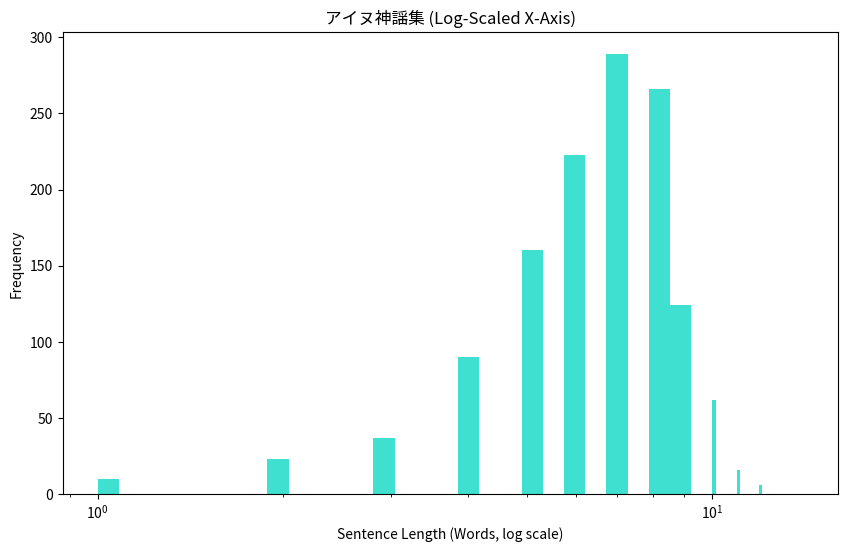

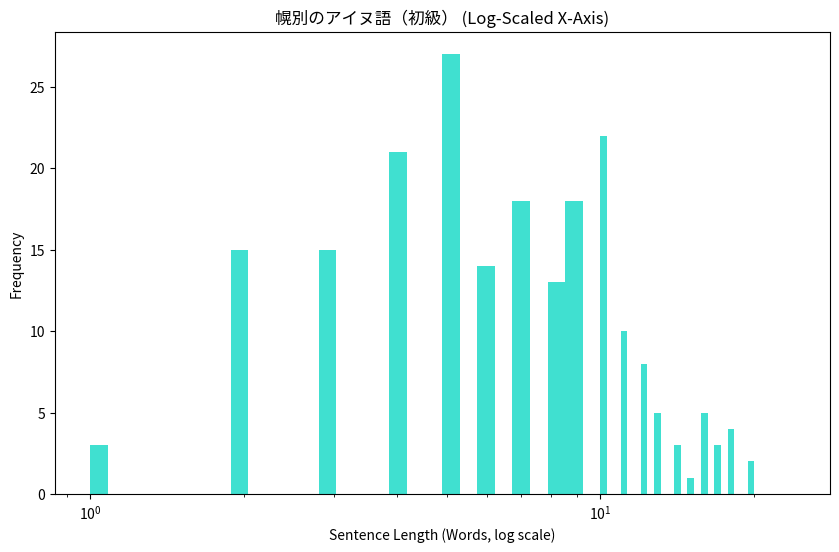

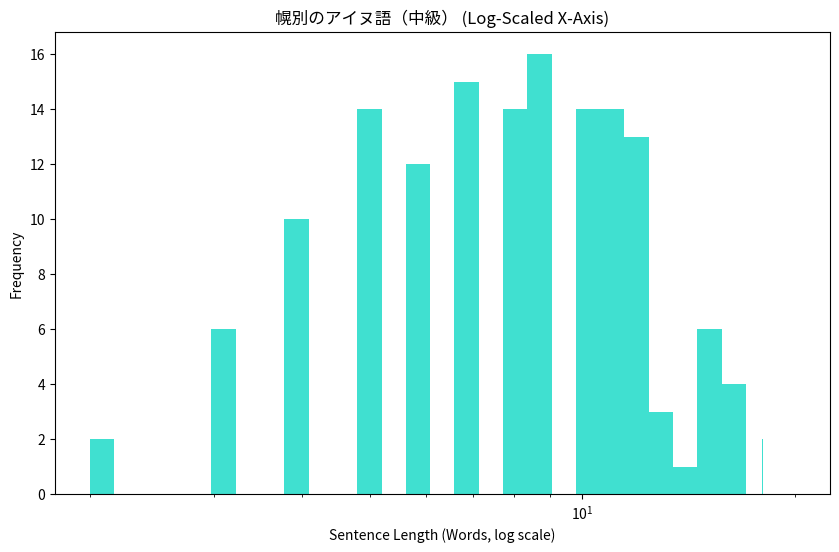

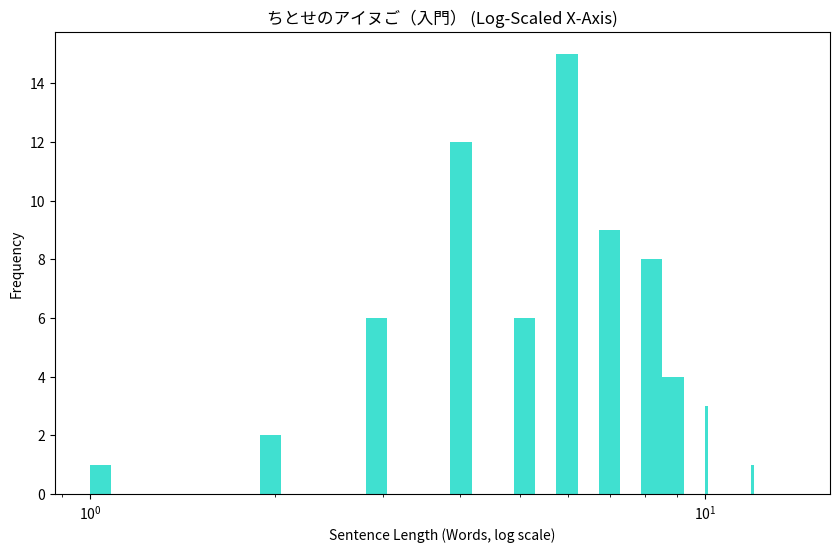

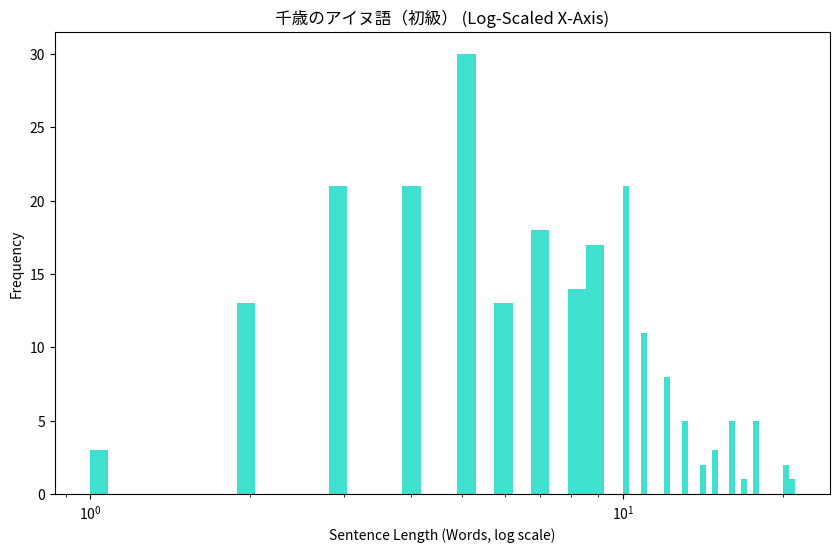

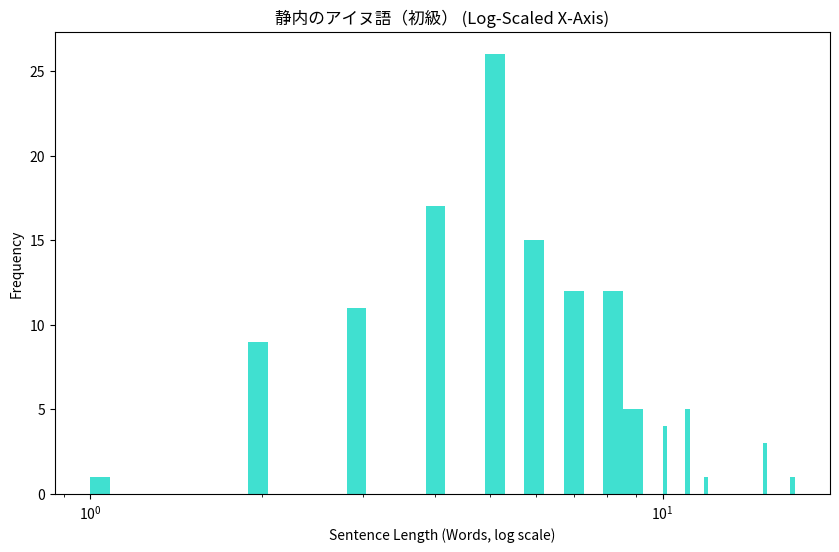

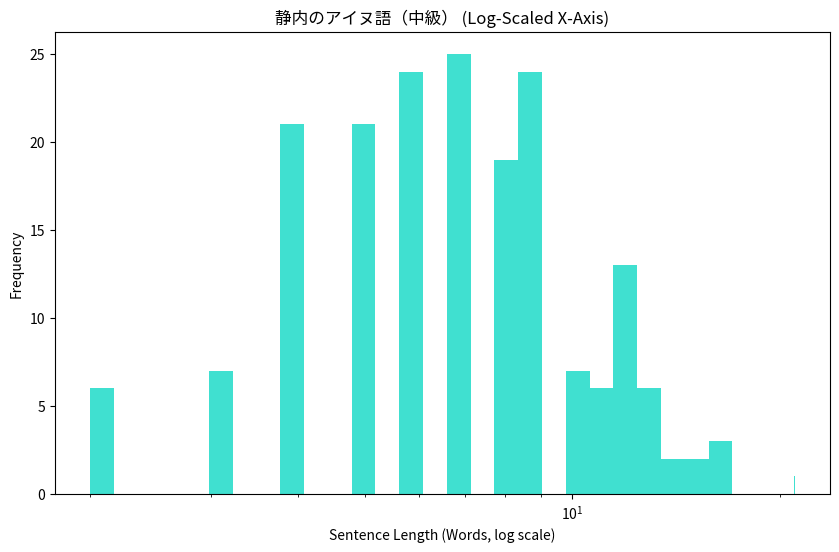

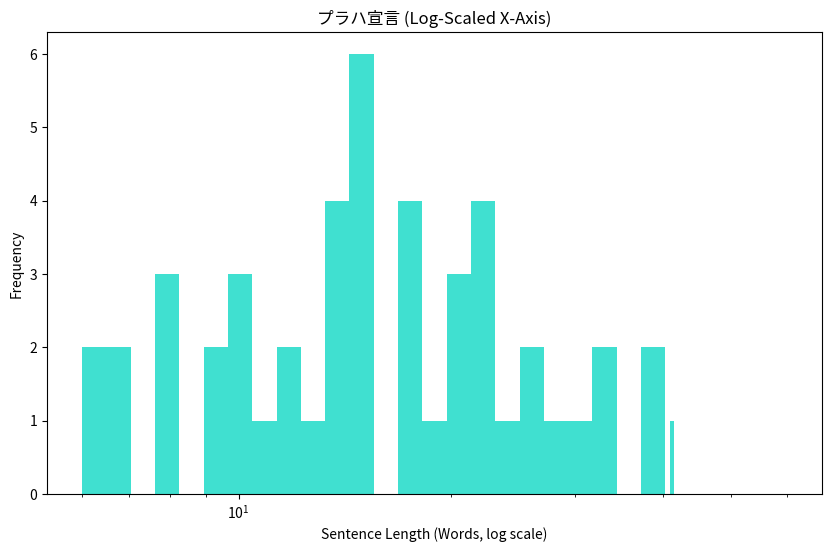

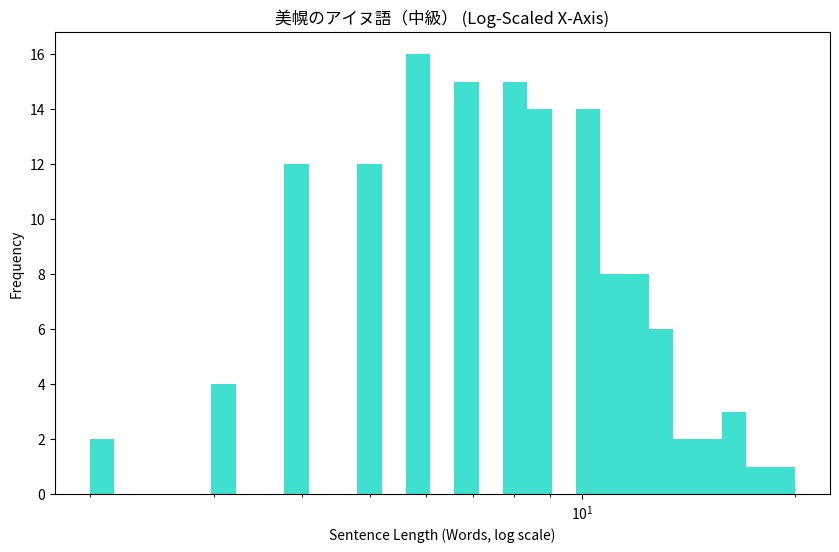

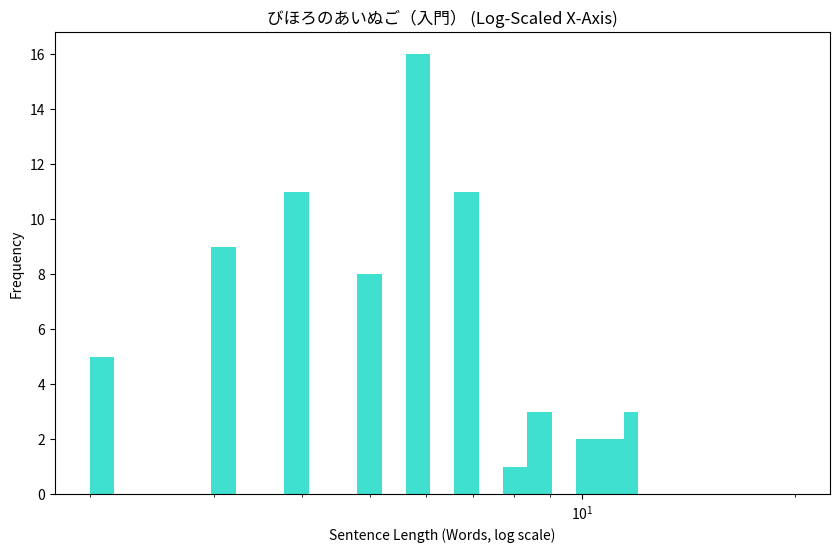

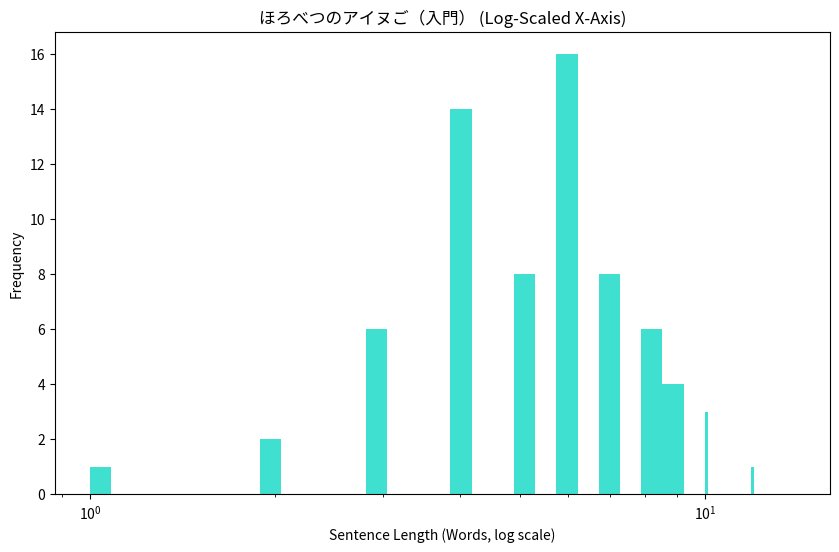

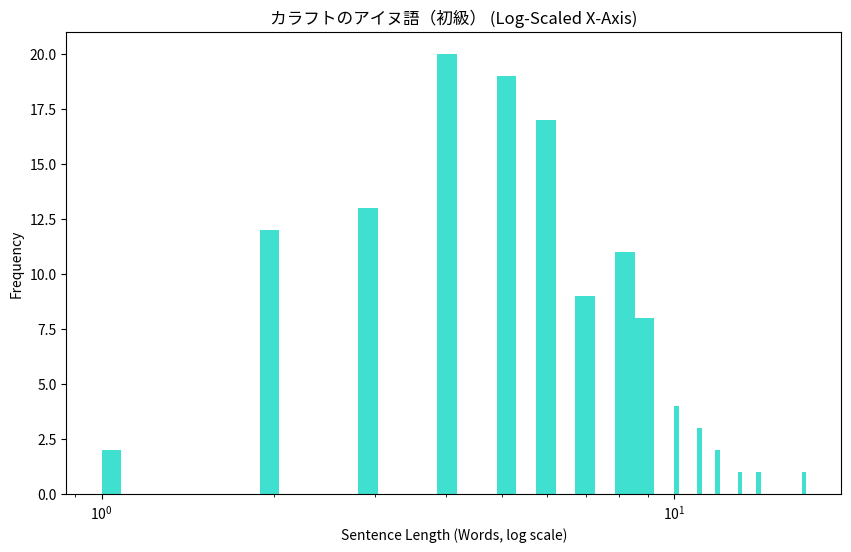

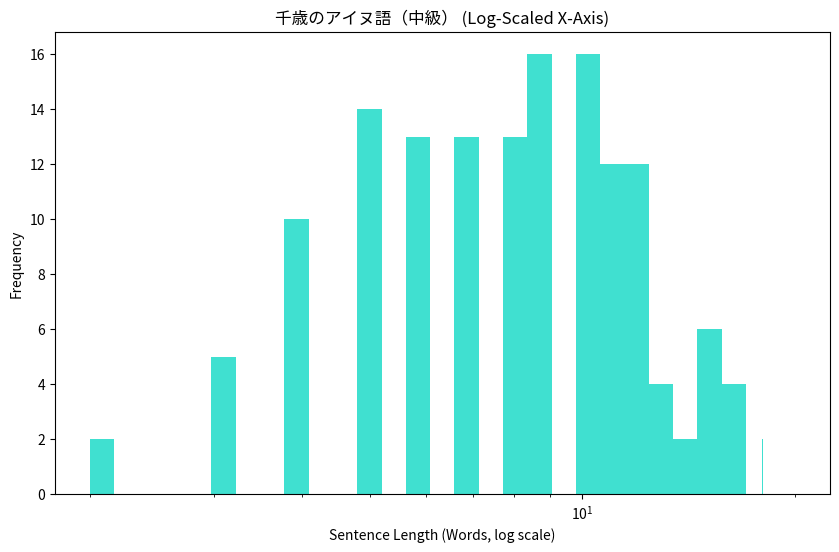

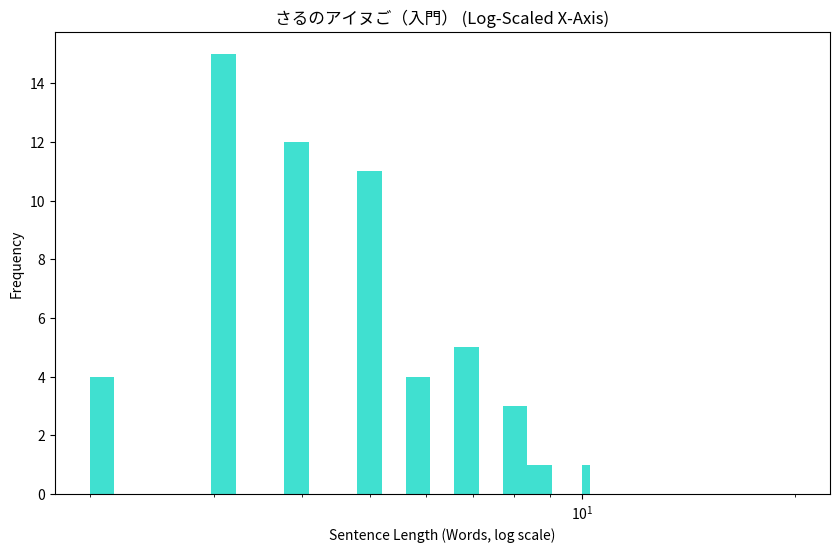

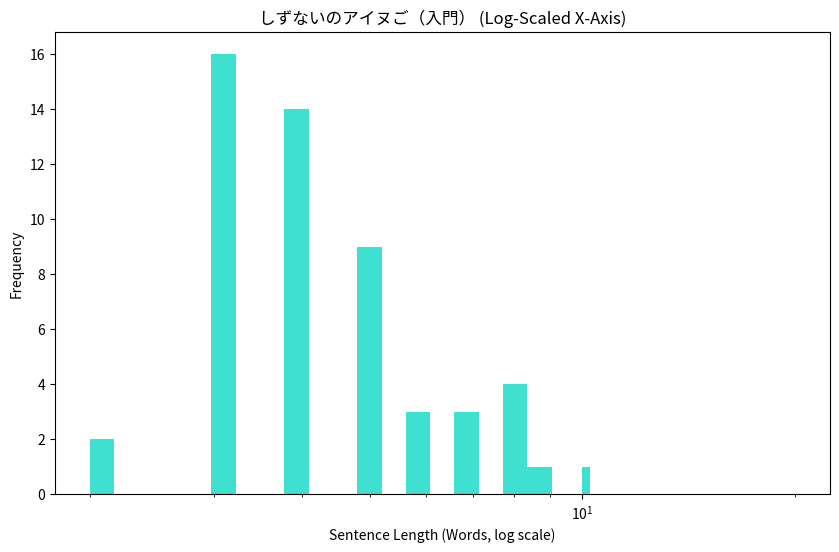

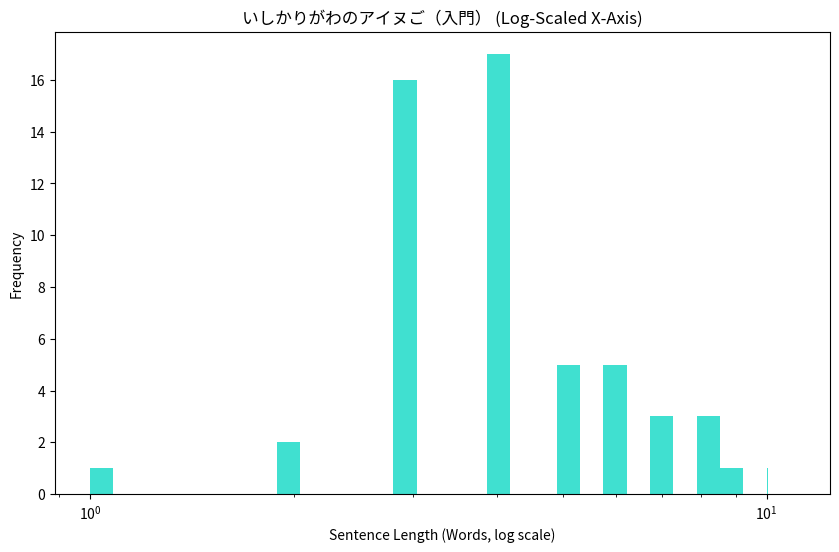

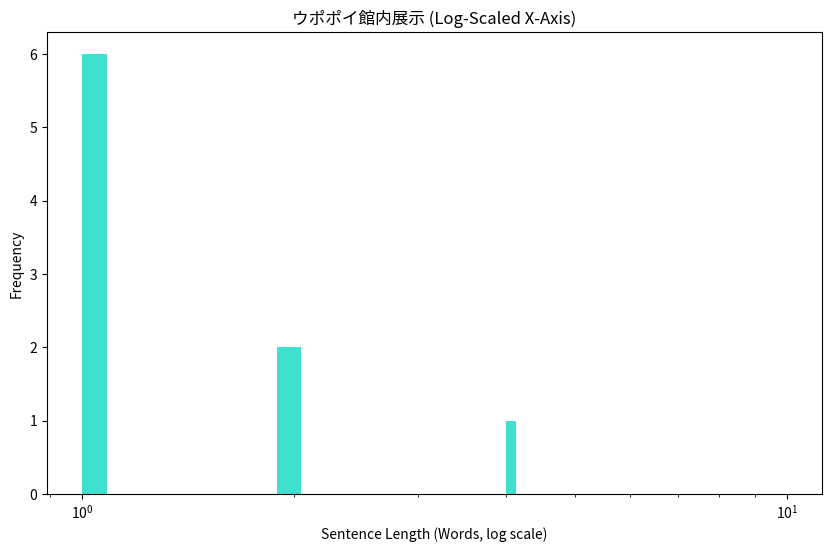

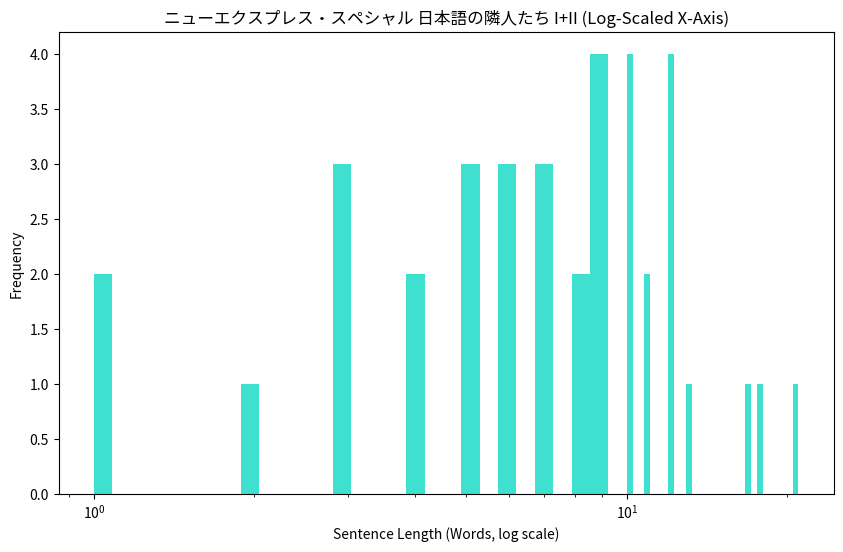

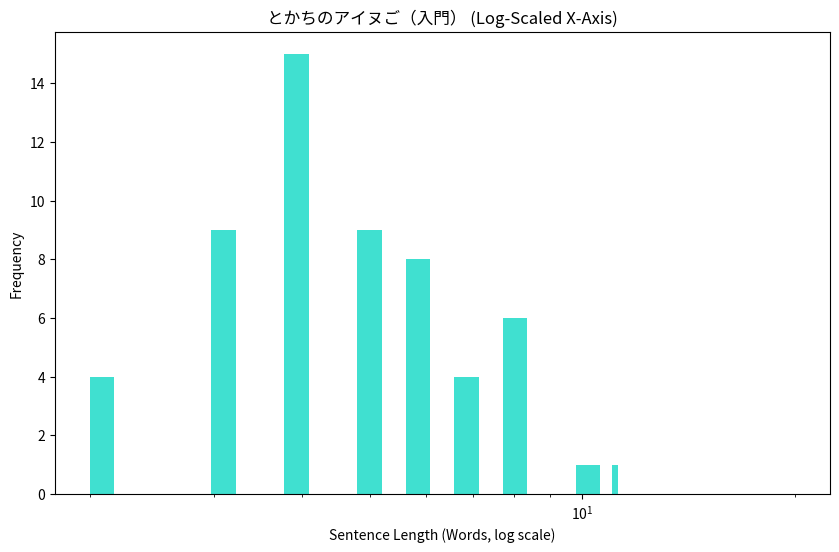

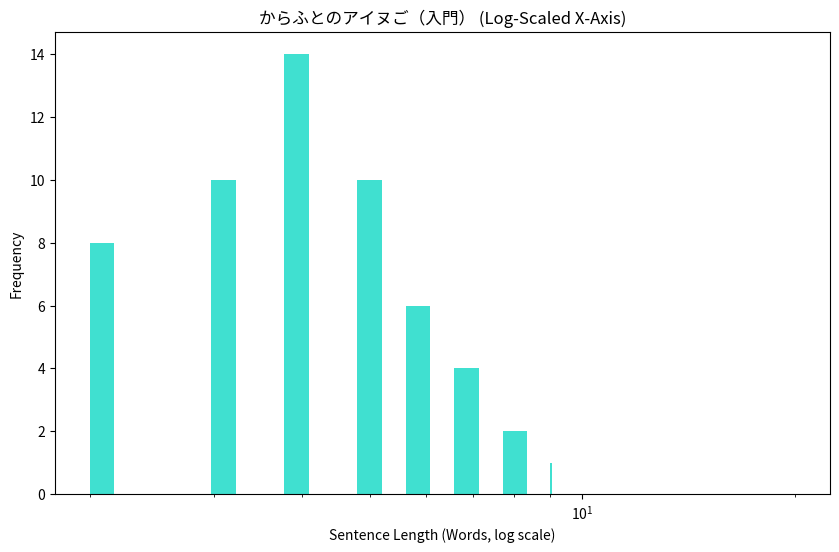

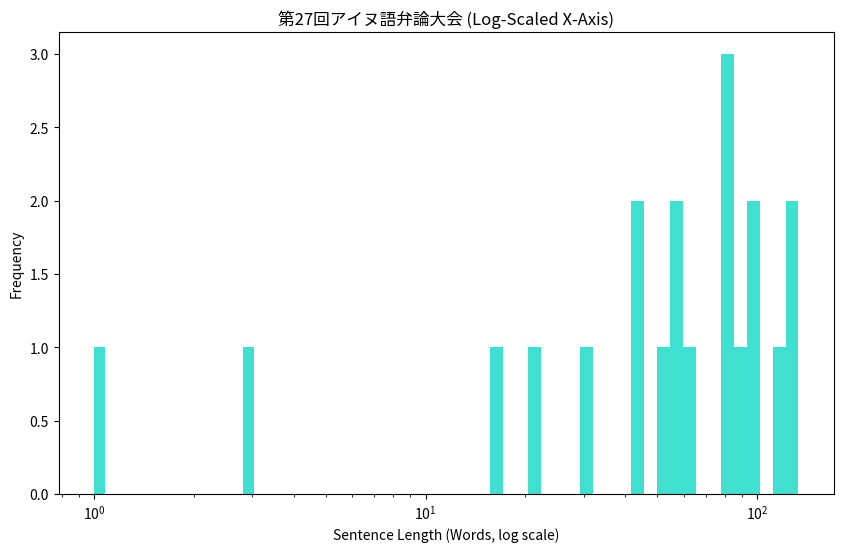

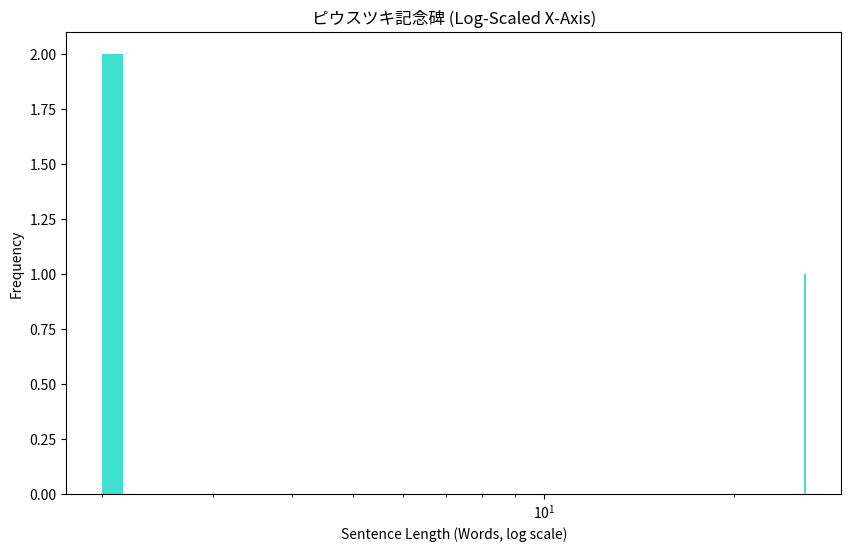

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Function to generate log-scaled bins
def log_bins(data, base=10, fine_granularity=10):
    # Filter out non-positive values
    filtered_data = [val for val in data if val > 0]
    if not filtered_data:
        raise ValueError("Data contains no positive values to compute log bins.")

    min_val, max_val = min(filtered_data), max(filtered_data)
    # Create finer bins near the lower end
    lower_bins = np.logspace(
        np.log10(min_val), np.log10(min_val * fine_granularity), num=30, base=base
    )
    upper_bins = np.logspace(
        np.log10(min_val * fine_granularity), np.log10(max_val), num=30, base=base
    )
    return np.unique(np.concatenate((lower_bins, upper_bins)))


# Combine all lengths into one list
all_lengths: list[int] = []
for lengths in sentences_words_length.values():
    all_lengths.extend(lengths)

IMAGE_OUTPUT_DIR = Path("../output/images/sentence_length/")
IMAGE_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Plot all books combined with log-scaled x-axis
plt.figure(figsize=(10, 6))
bins = log_bins(all_lengths)
plt.hist(all_lengths, bins=list(bins), color="turquoise")
plt.xscale("log")
plt.title("All Books Combined (Log-Scaled X-Axis)")
plt.xlabel("Sentence Length (Words, log scale)")
plt.ylabel("Frequency")
plt.savefig(IMAGE_OUTPUT_DIR / "all_books_log_scaled_x.png")
plt.show()

# Plot each book with log-scaled x-axis
for book, lengths in sentences_words_length.items():
    bins = log_bins(lengths)
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=list(bins), color="turquoise")
    plt.xscale("log")
    plt.title(f"{book} (Log-Scaled X-Axis)")
    plt.xlabel("Sentence Length (Words, log scale)")
    plt.ylabel("Frequency")
    plt.savefig(IMAGE_OUTPUT_DIR / f"{book}_log_scaled_x.png")
    # plt.show()

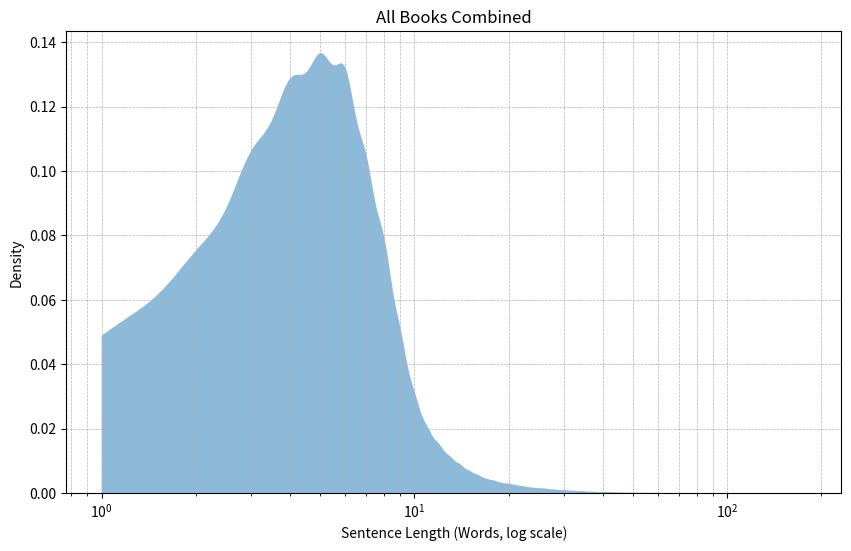

/tmp/ipykernel_929579/1019958473.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(10, 6))


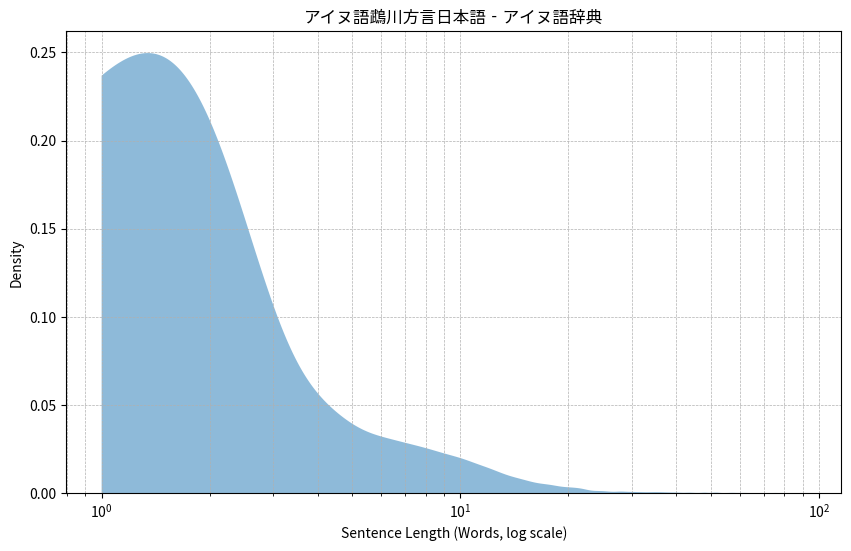

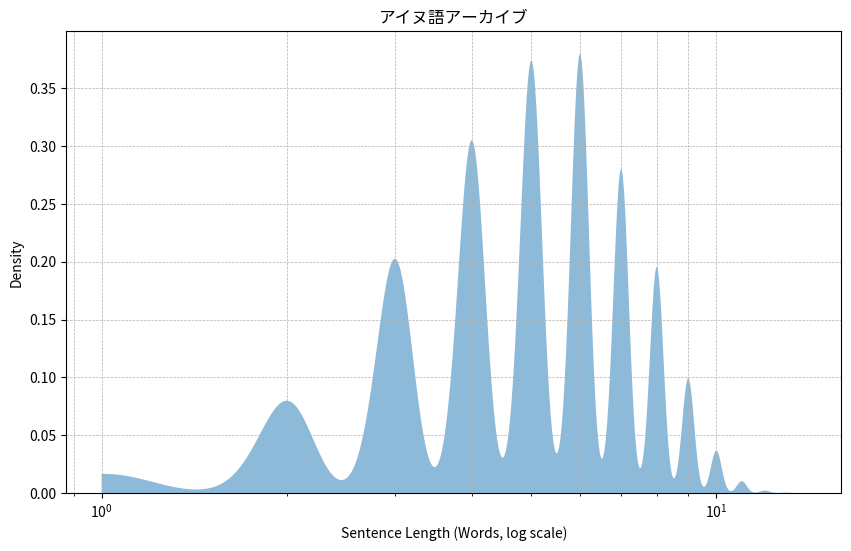

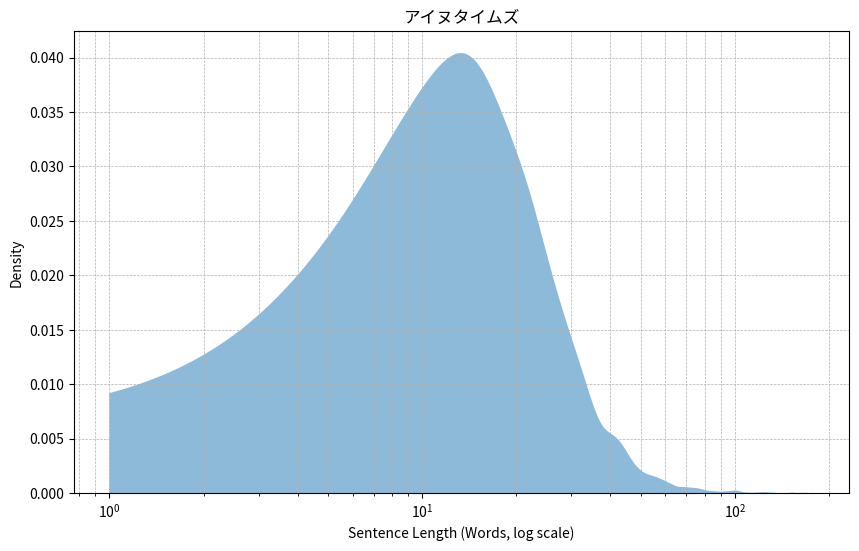

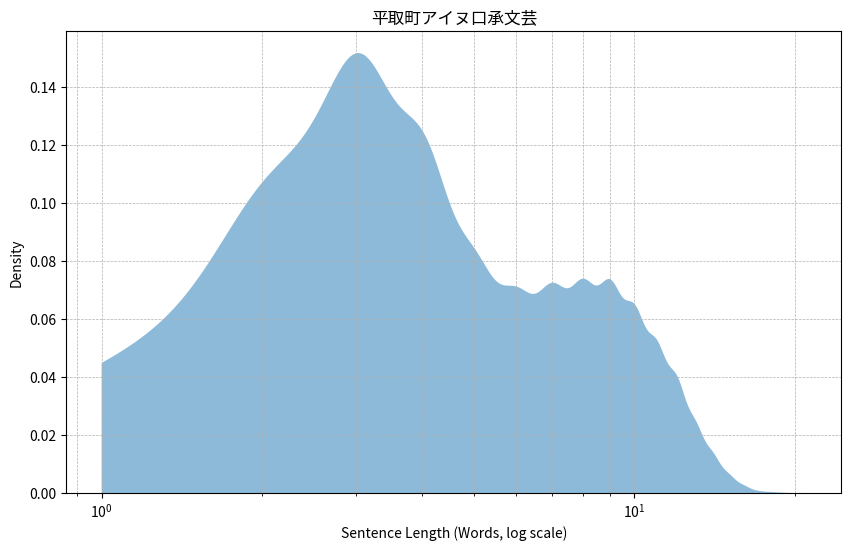

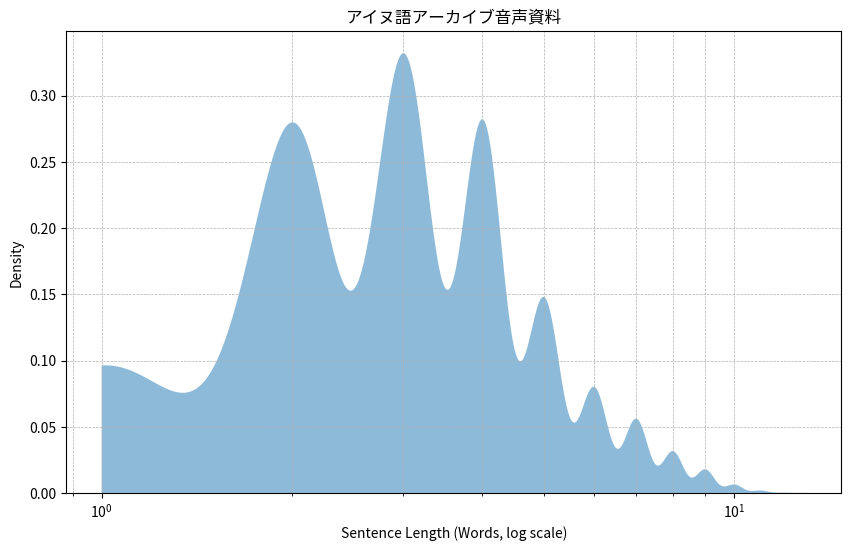

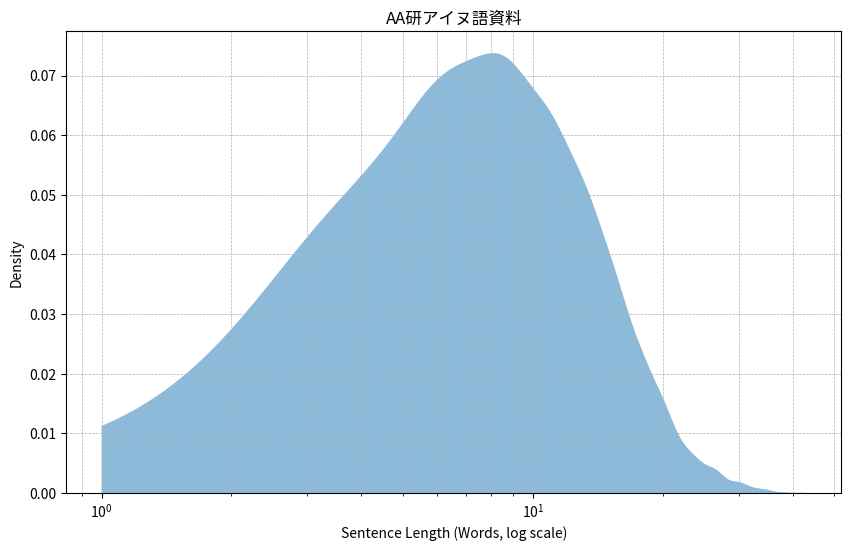

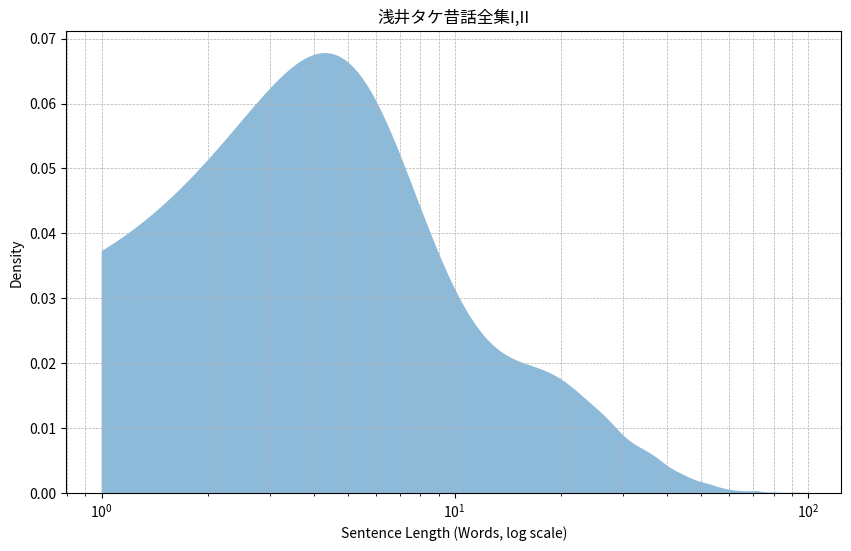

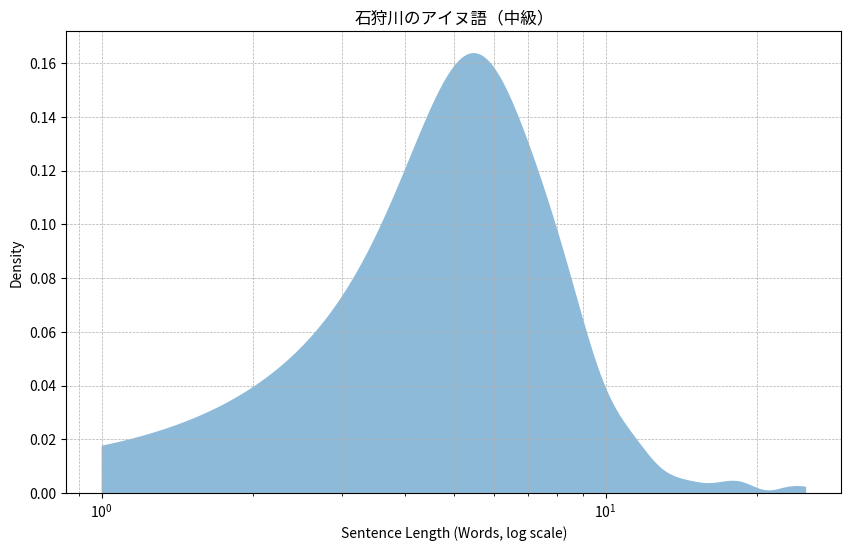

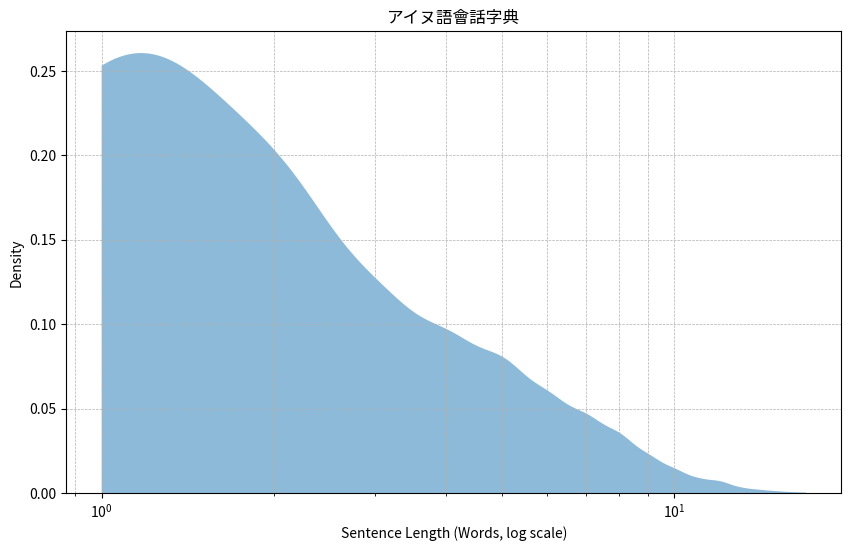

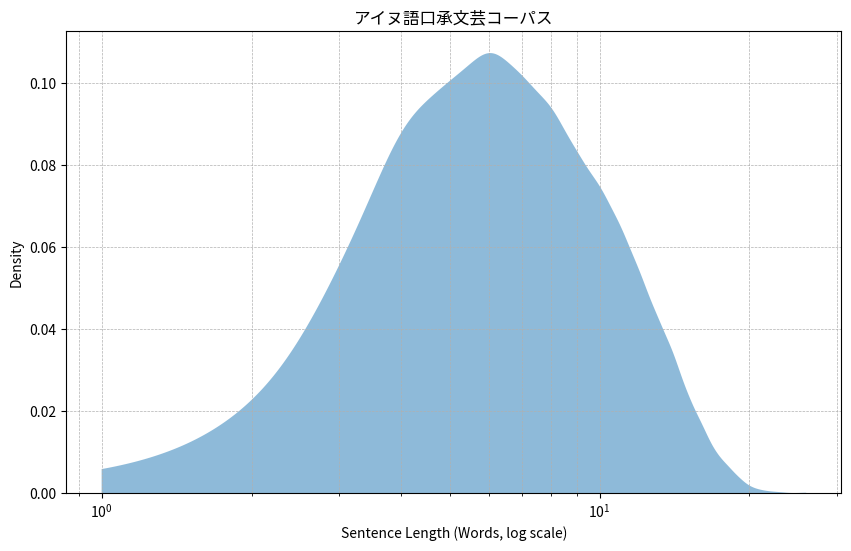

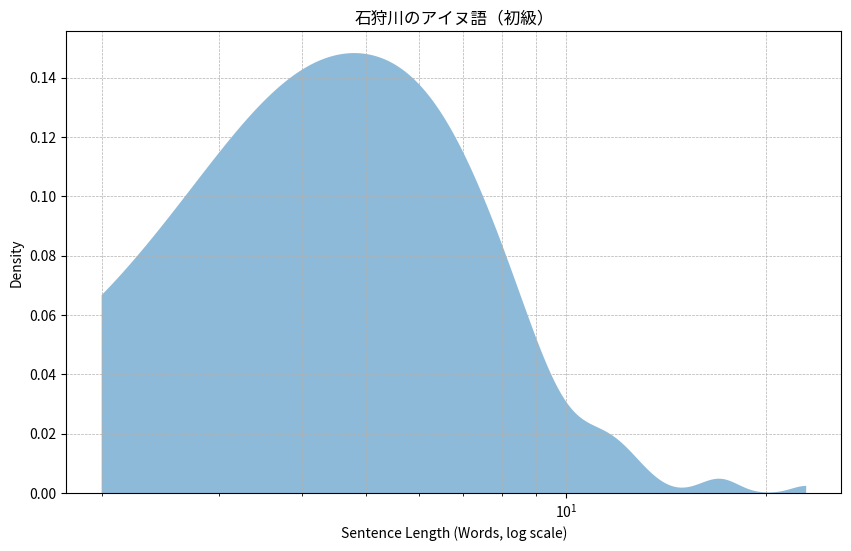

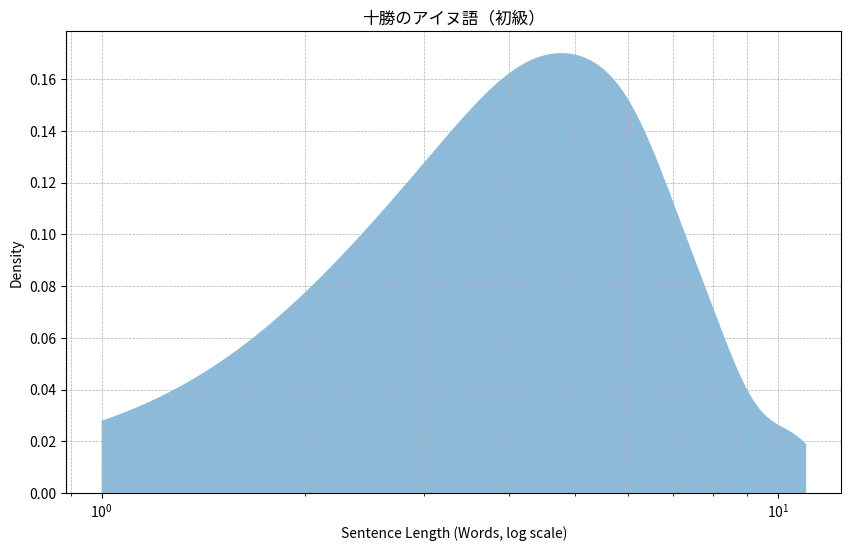

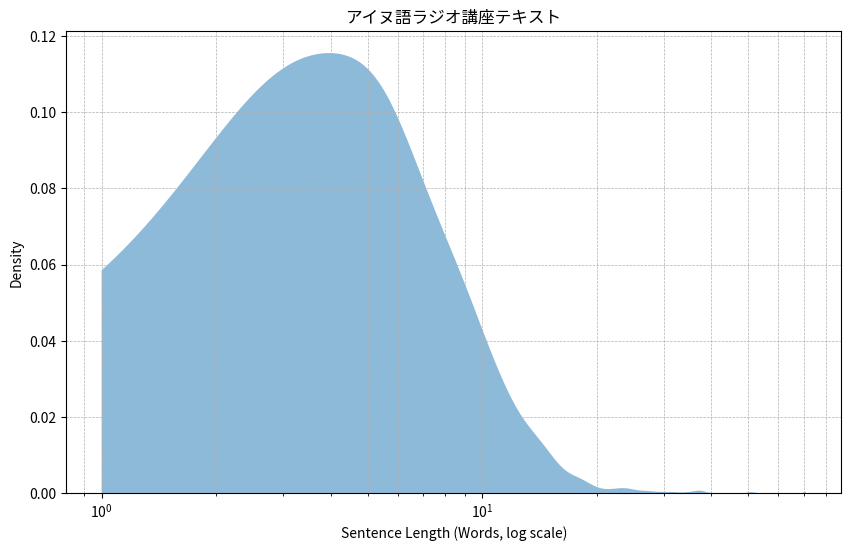

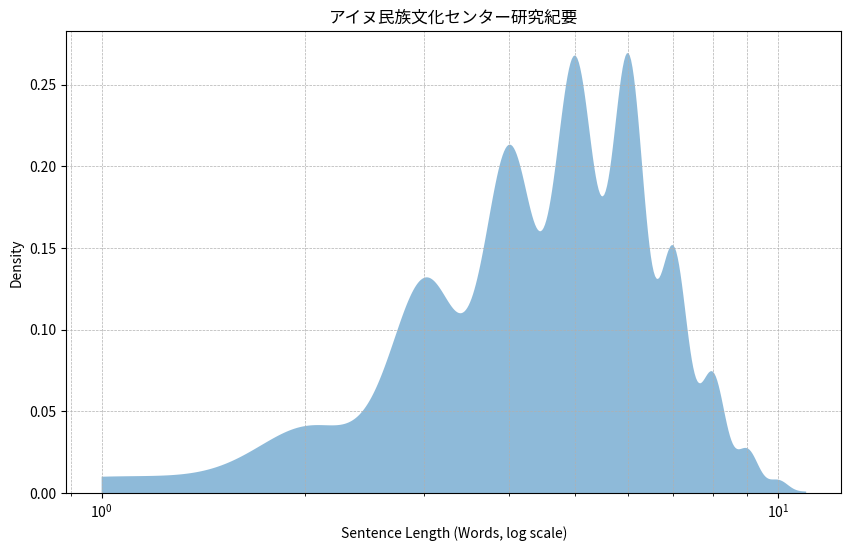

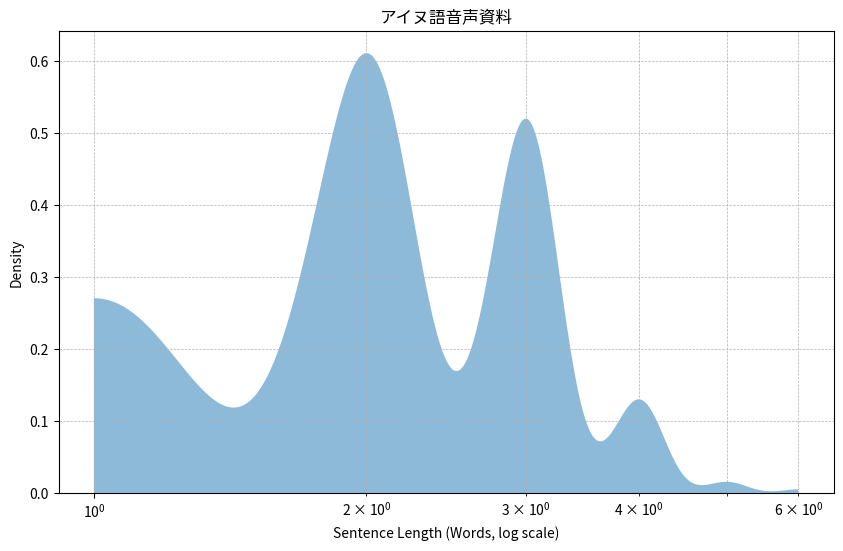

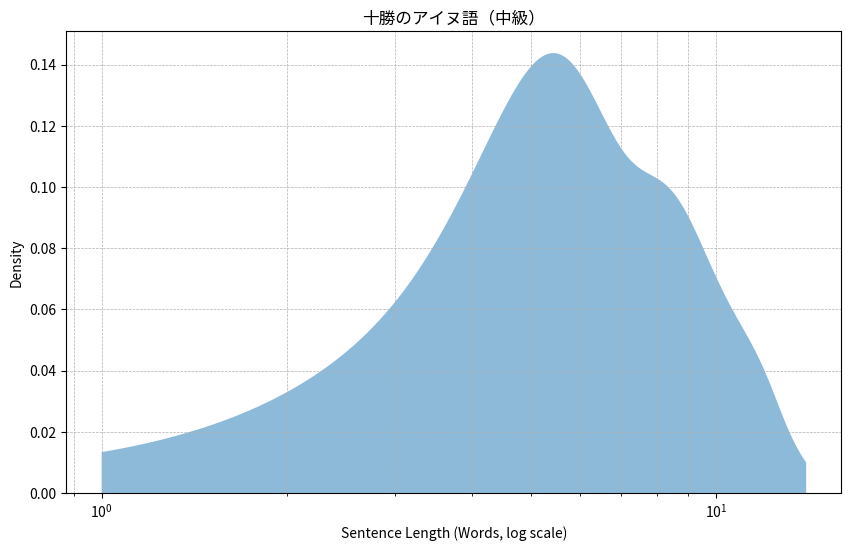

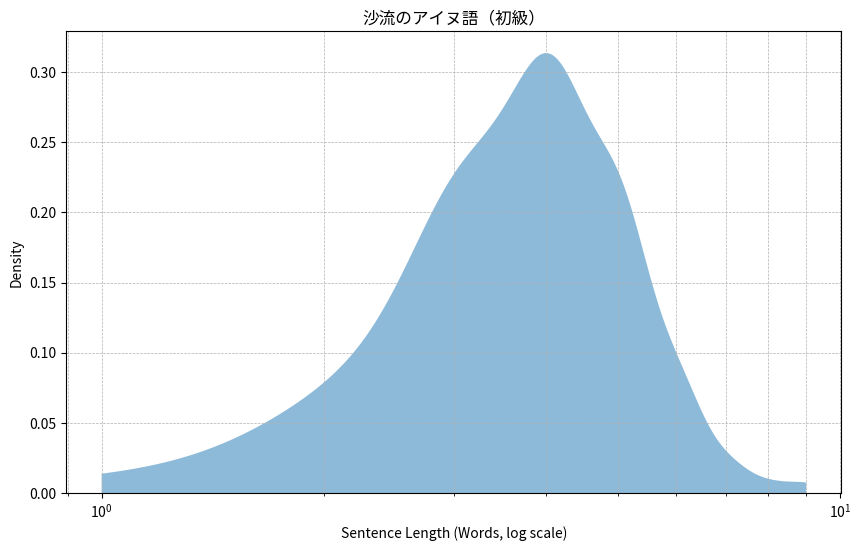

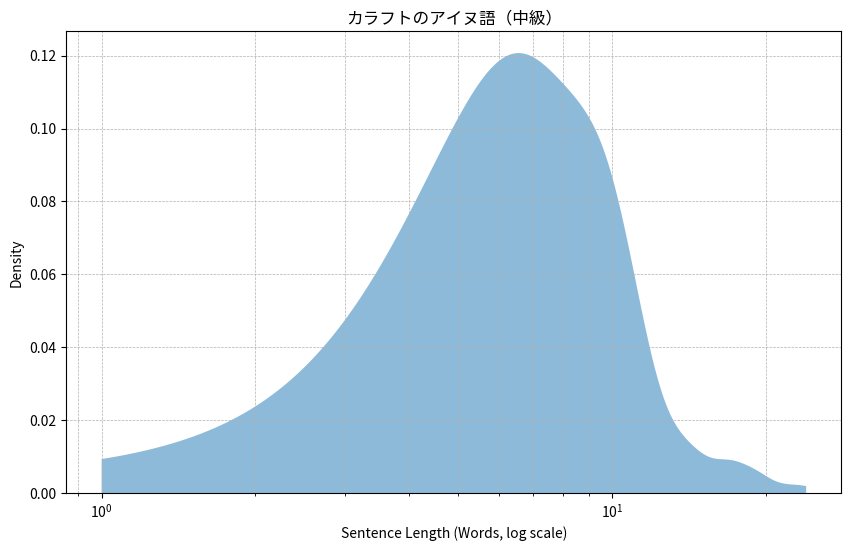

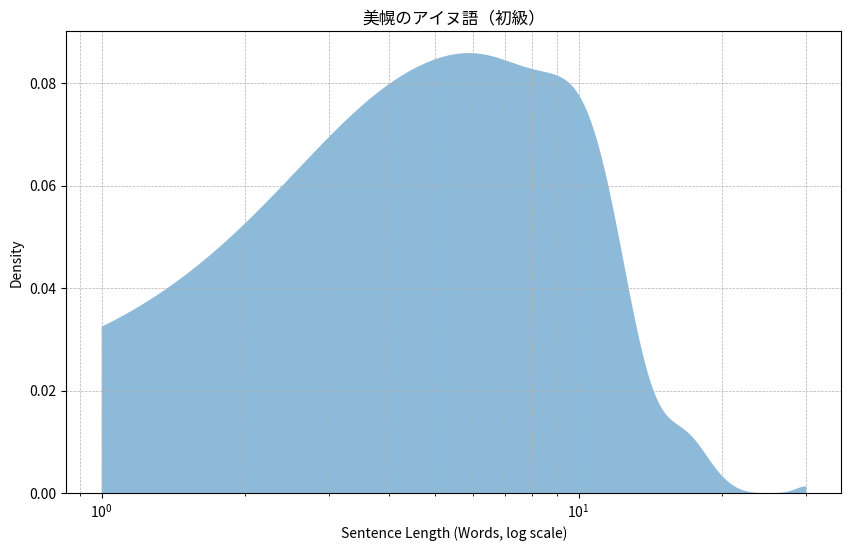

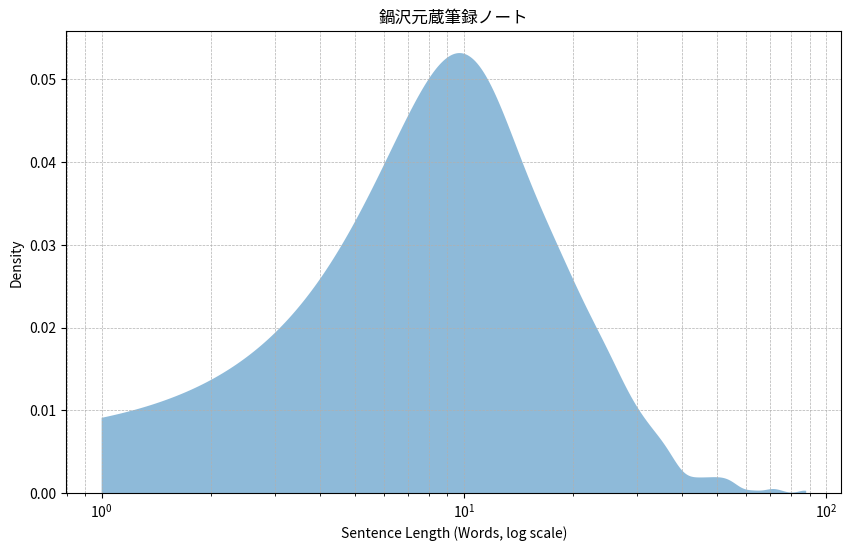

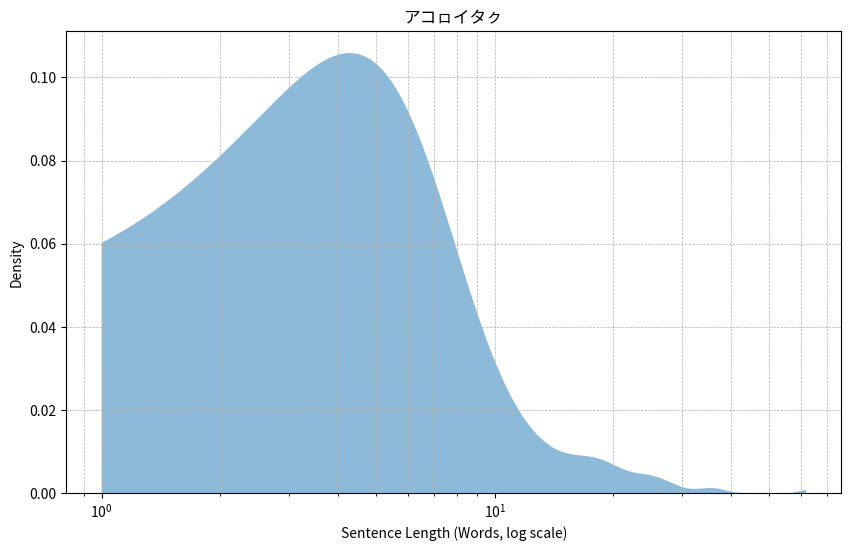

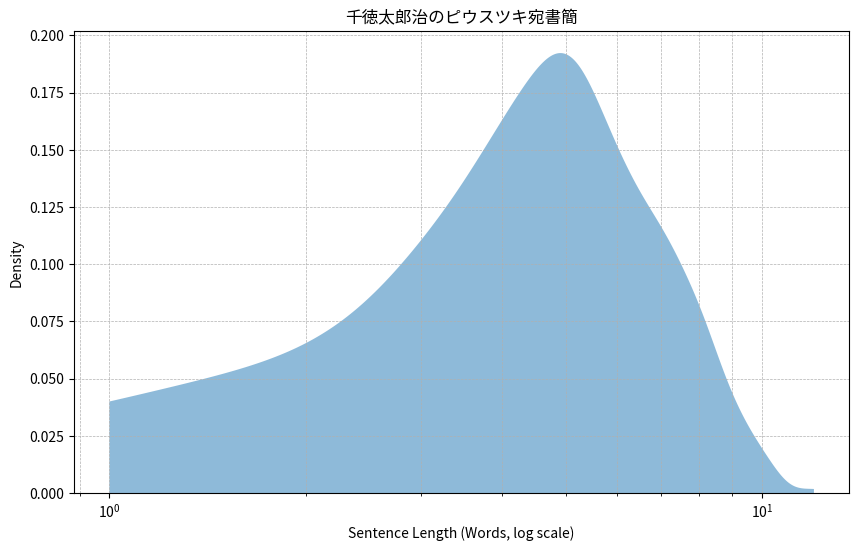

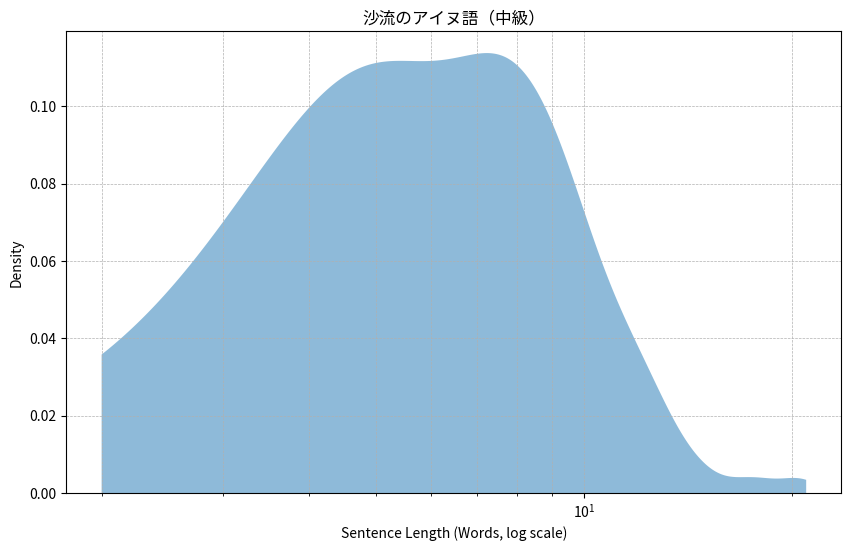

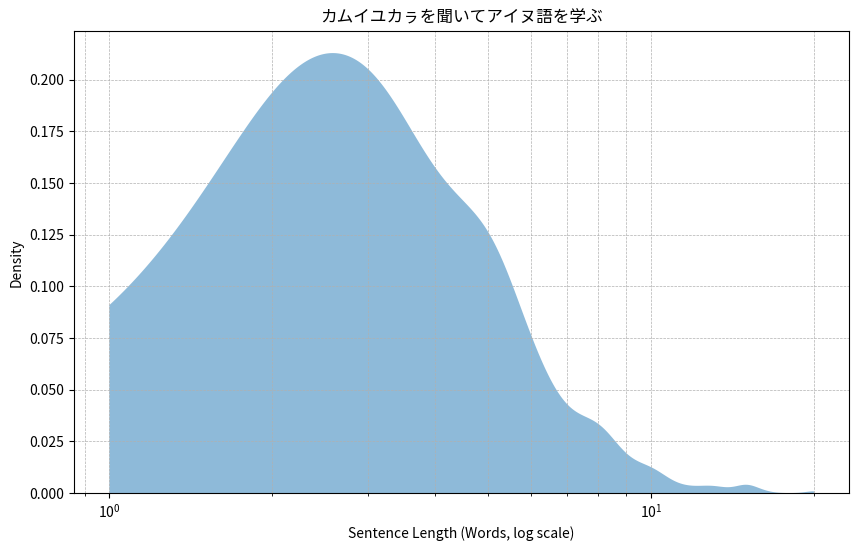

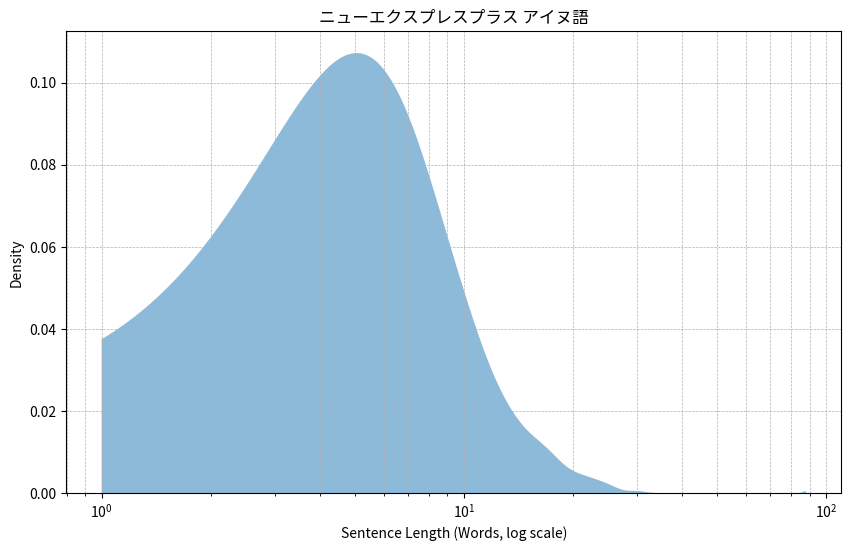

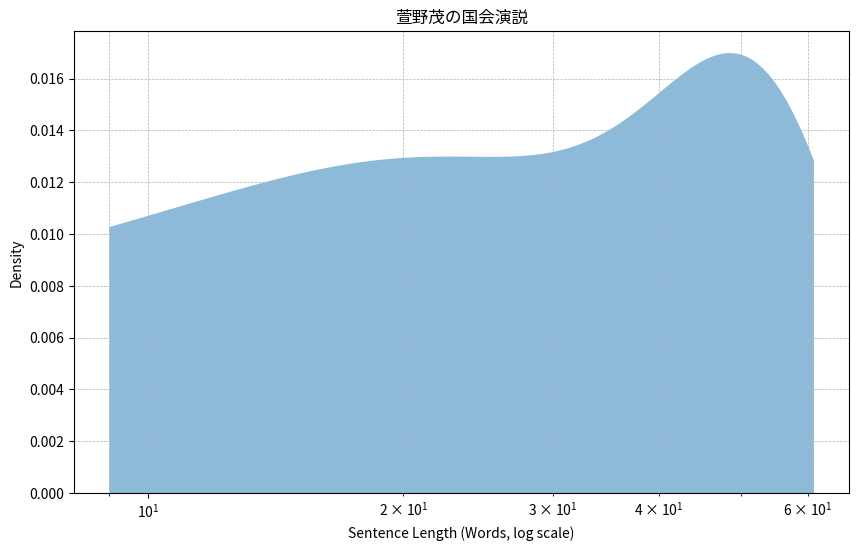

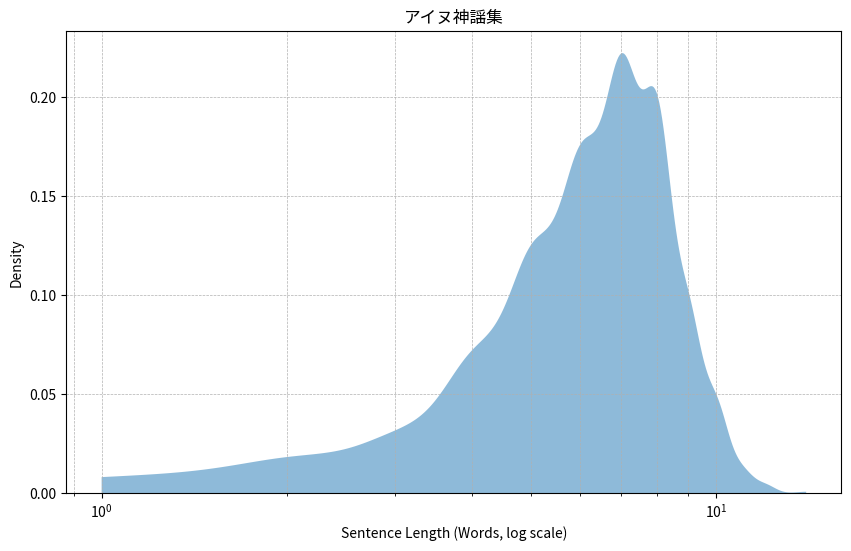

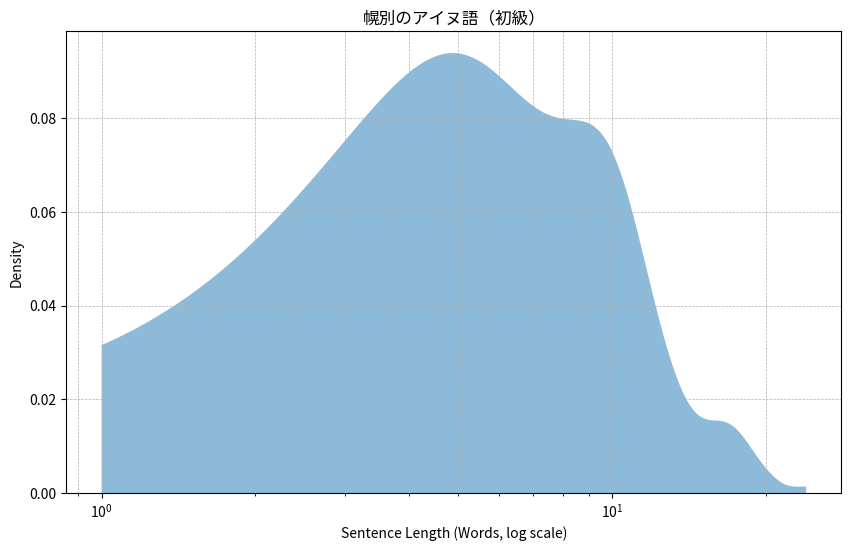

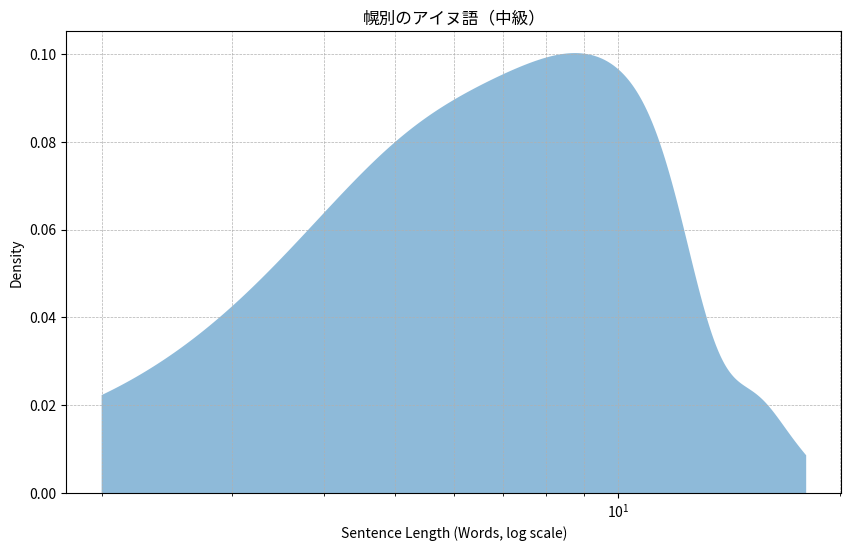

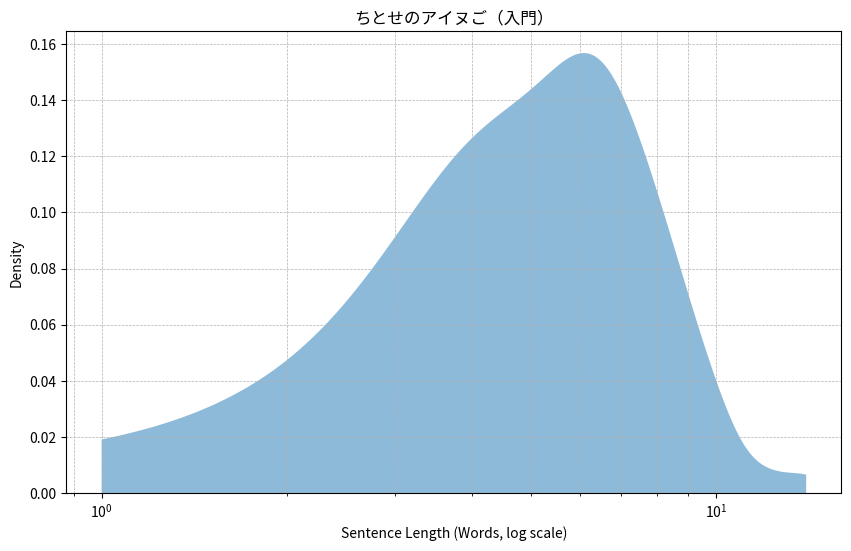

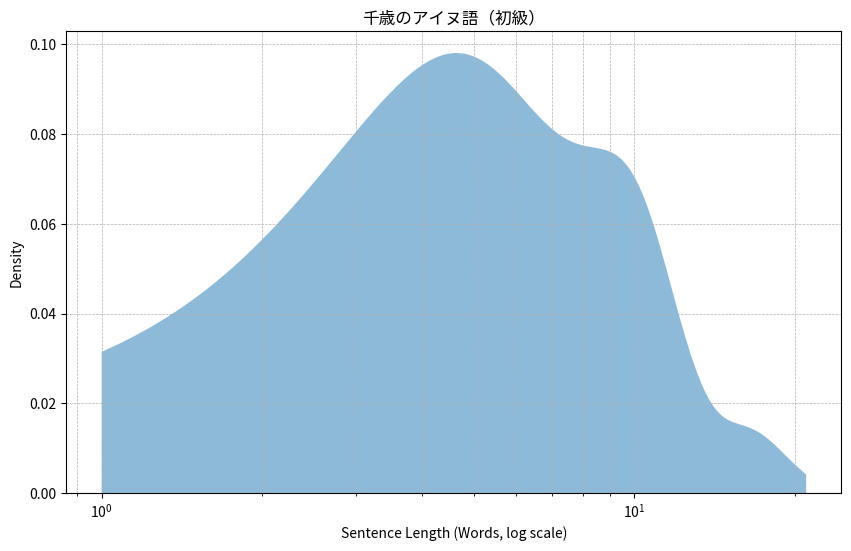

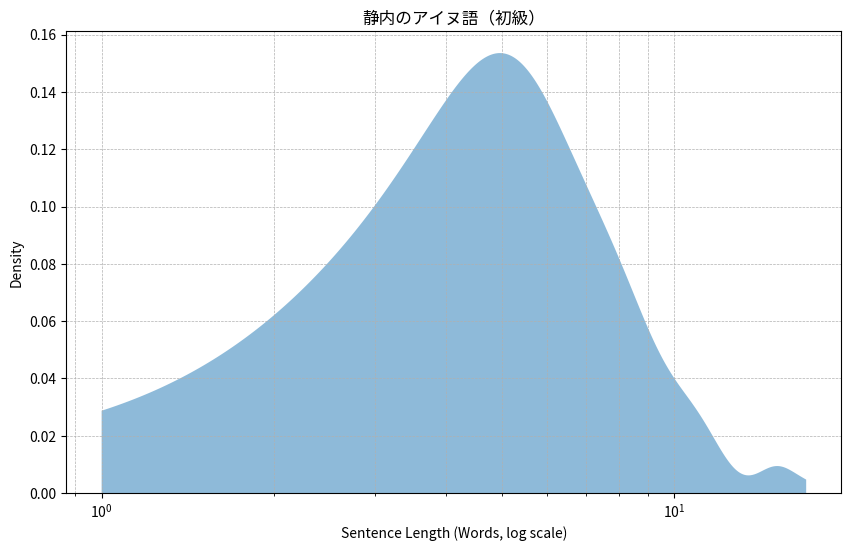

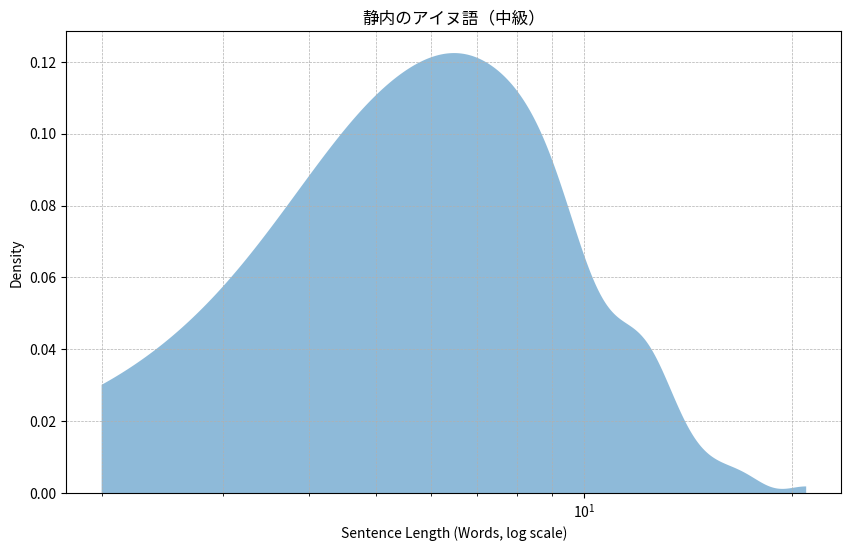

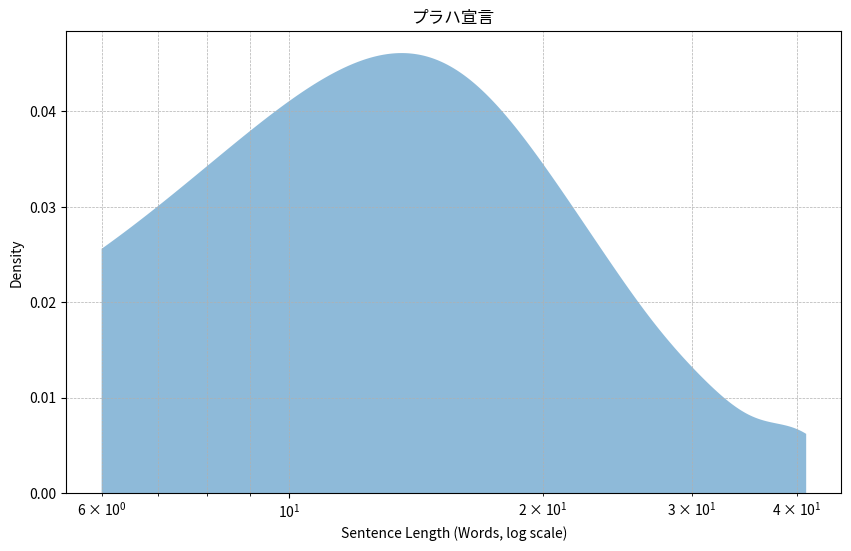

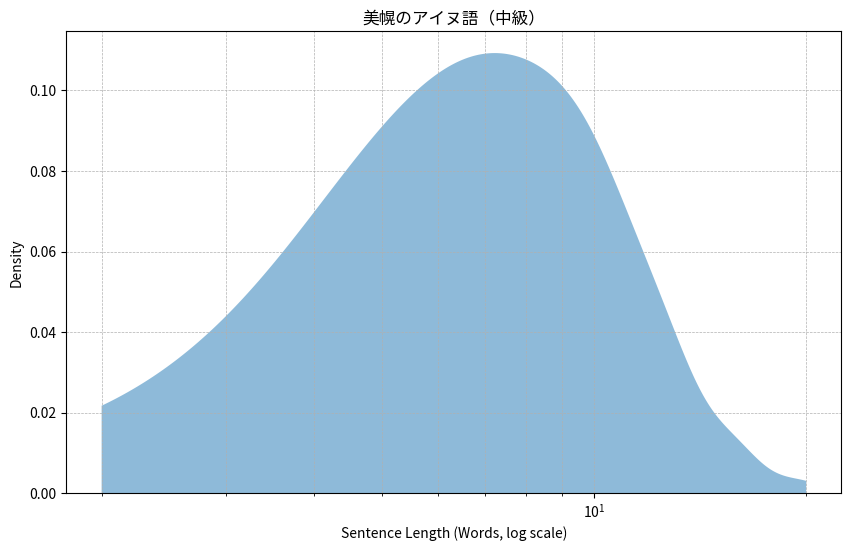

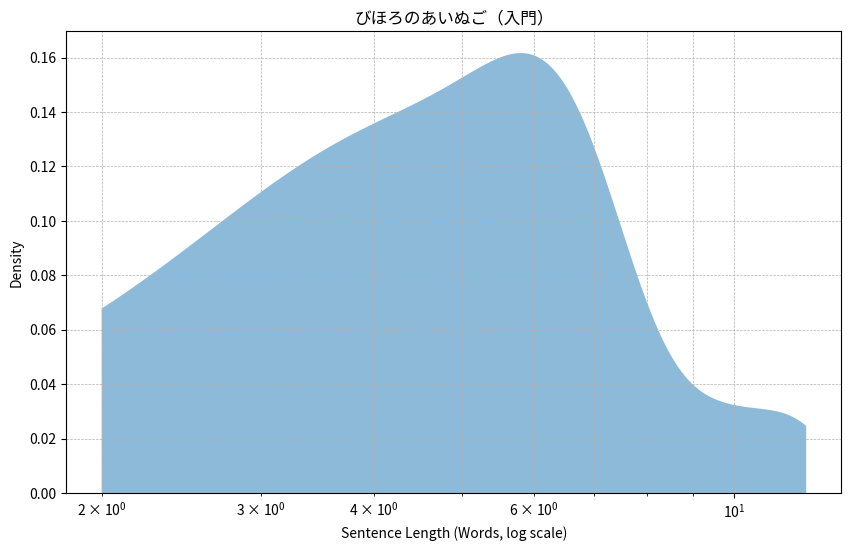

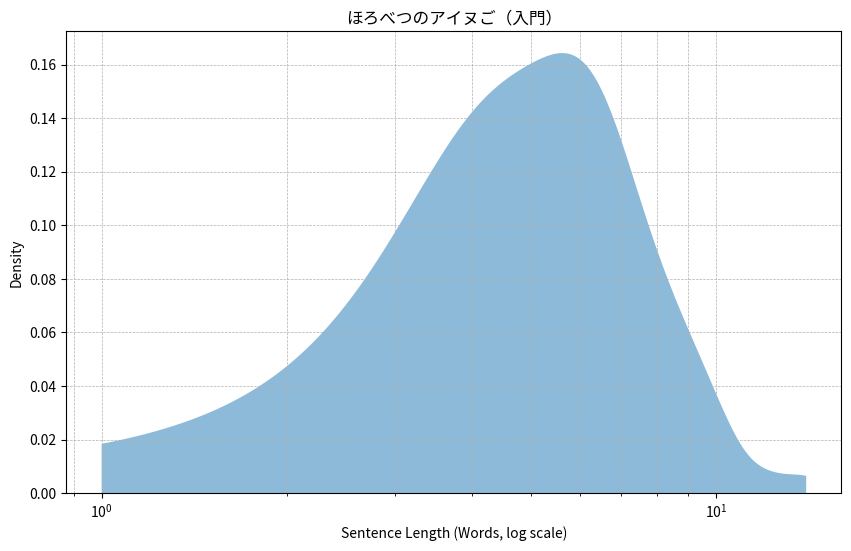

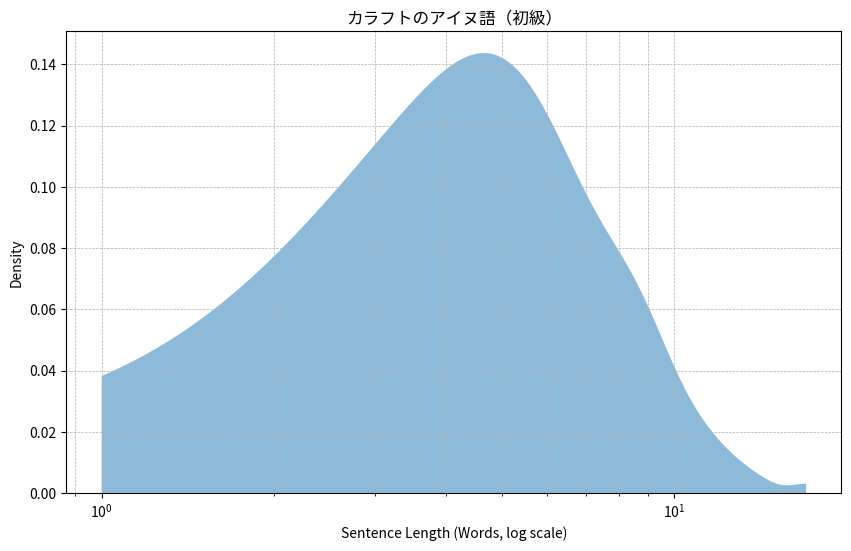

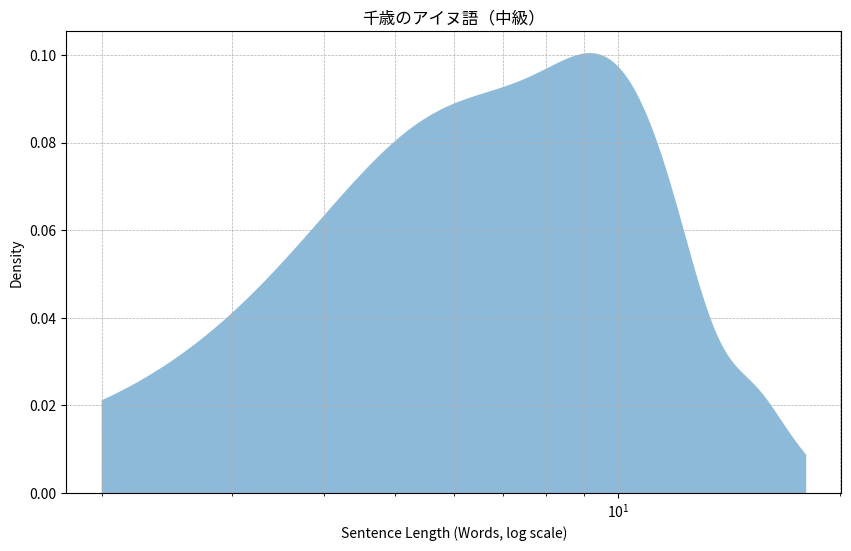

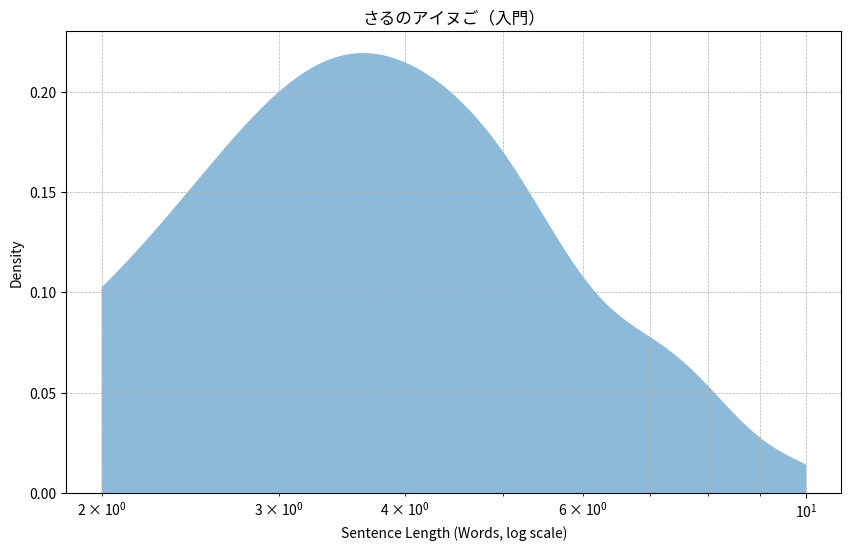

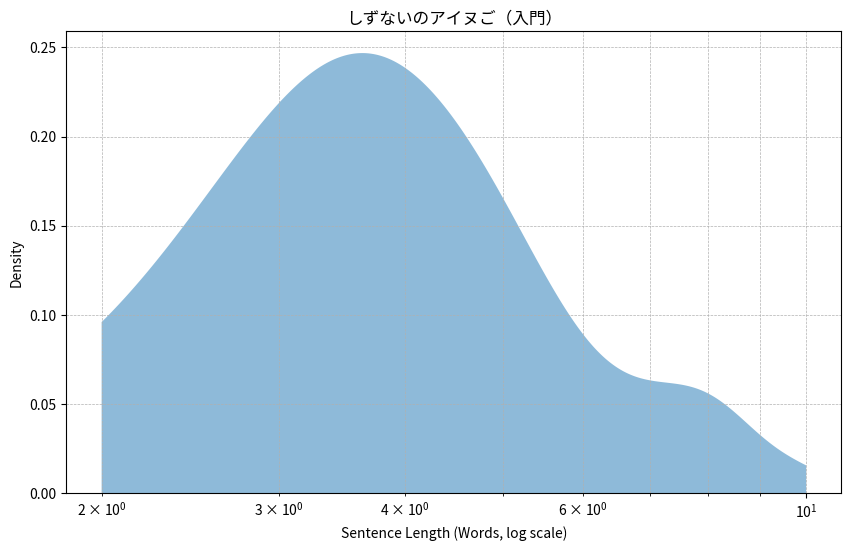

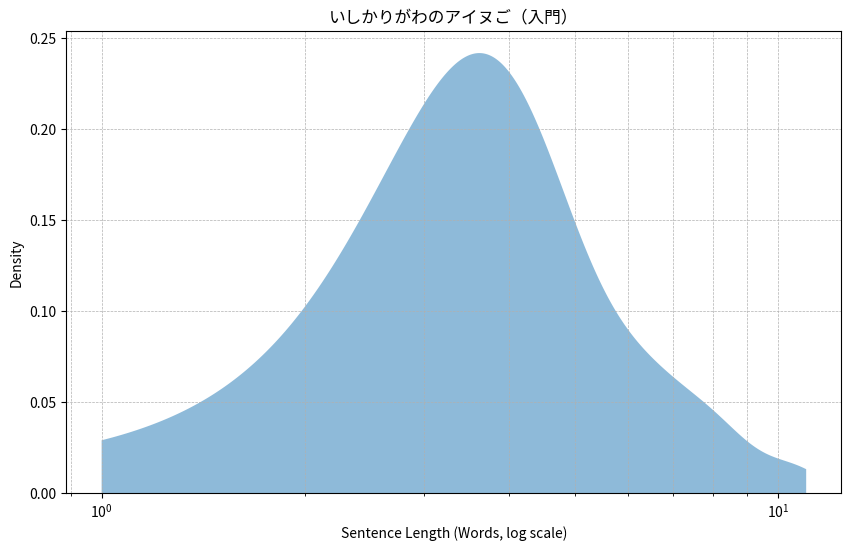

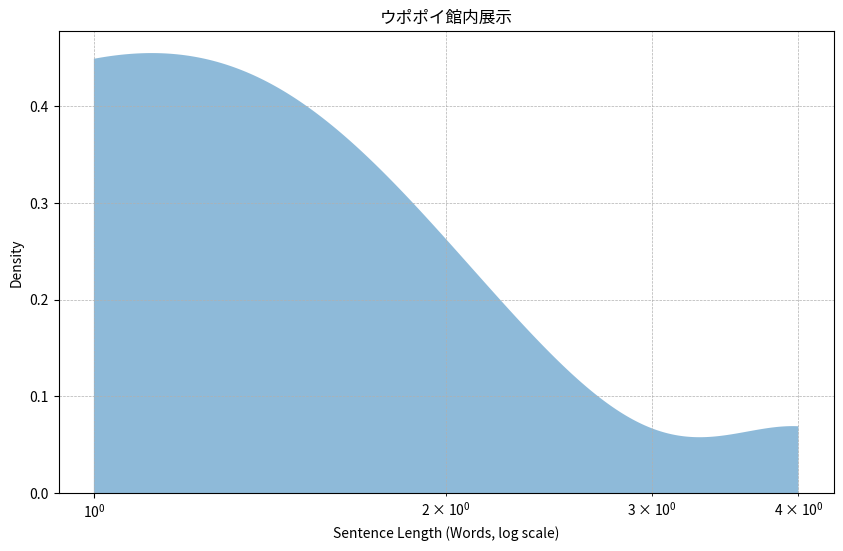

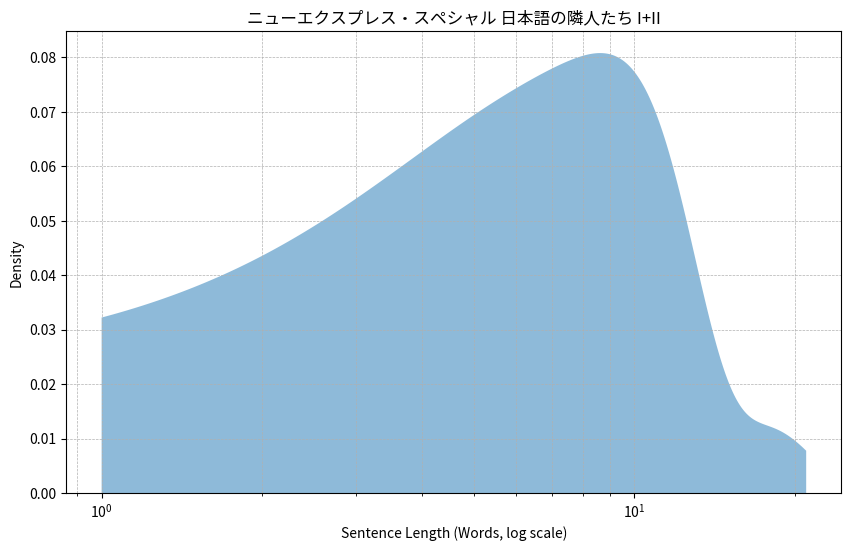

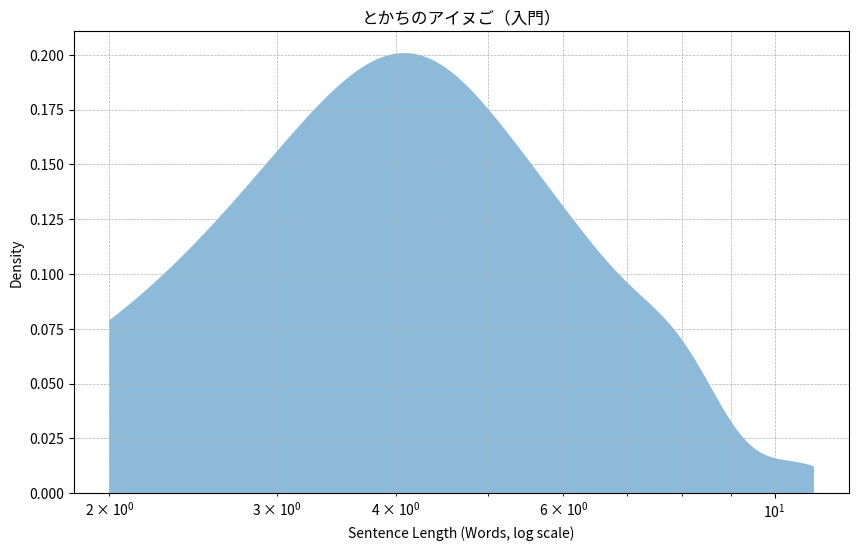

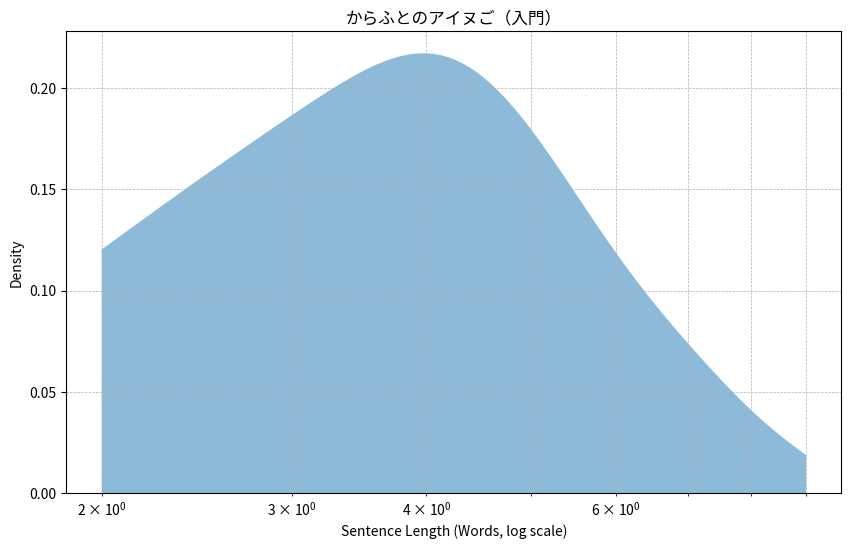

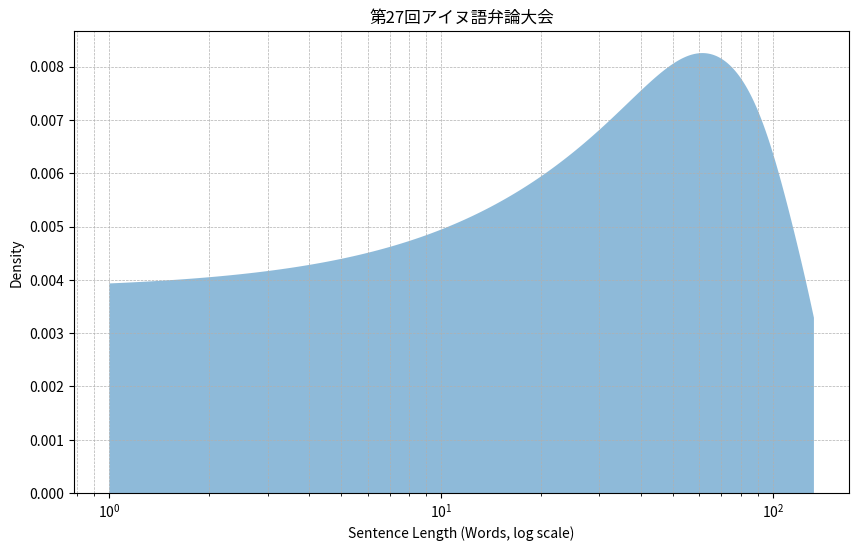

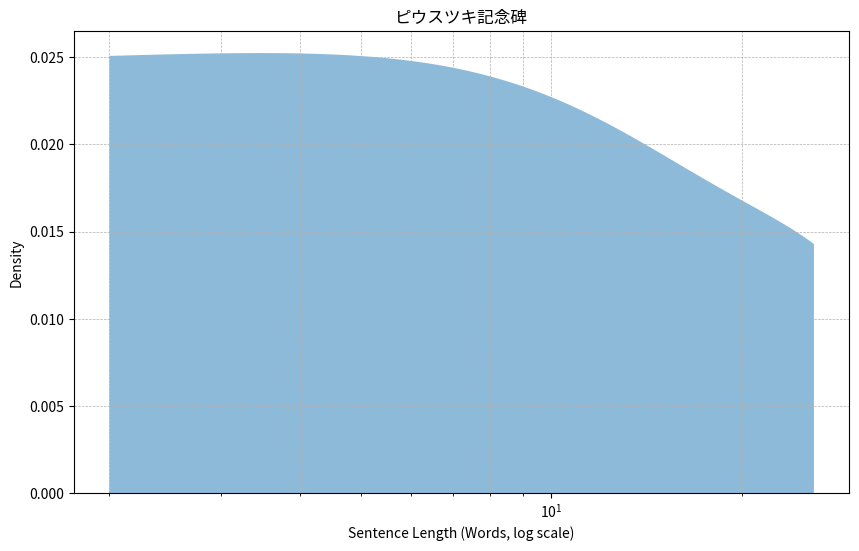

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties, fontManager
from scipy.stats import gaussian_kde
from pathlib import Path

# set font to support CJK
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
fontManager.addfont(font_path)
font_prop = FontProperties(fname=font_path)

plt.rcParams["font.family"] = ["Noto Sans CJK JP"]


def plot_kde_filled(data, base=10, output_path="kde_filled.png", title="Filled KDE with Logarithmic Scale", show=False):
    # Filter out non-positive values
    data = np.array([val for val in data if val > 0])
    if len(data) == 0:
        raise ValueError("No positive values to plot.")

    # Compute KDE
    kde = gaussian_kde(data)

    # Generate x-values on a logarithmic scale
    x_values = np.logspace(np.log10(min(data)), np.log10(max(data)), 500, base=base)

    # Evaluate KDE
    y_values = kde(x_values)

    # Create plot
    plt.figure(figsize=(10, 6))
    # plt.plot(x_values, y_values, label="KDE", linestyle="-", linewidth=1.5, alpha=0.5)
    plt.fill_between(x_values, y_values, alpha=0.5)
    plt.xscale("log")
    plt.title(title)
    plt.xlabel("Sentence Length (Words, log scale)")
    plt.ylabel("Density")
    plt.ylim(bottom=0)
    plt.grid(True, which="both", linestyle="--", linewidth=0.5)
    # plt.legend()
    plt.savefig(output_path)
    if show:
        plt.show()

# Example: Combine all lengths and plot
all_lengths = []
for lengths in sentences_words_length.values():
    all_lengths.extend(lengths)

IMAGE_OUTPUT_DIR = Path("../output/images/sentence_length/")
IMAGE_OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

plot_kde_filled(all_lengths, output_path=str(IMAGE_OUTPUT_DIR / "all_books_kde_filled.png"), title="All Books Combined", show=True)

for book, lengths in sentences_words_length.items():
    plot_kde_filled(lengths, output_path=str(IMAGE_OUTPUT_DIR / f"{book}_kde_filled.png"), title=f"{book}")

In [64]:
import zipfile

with zipfile.ZipFile(IMAGE_OUTPUT_DIR / "sentence_length.zip", "w") as f:
    for image in IMAGE_OUTPUT_DIR.glob("*.png"):
        f.write(image, arcname=image.name)

# remove all images
for image in IMAGE_OUTPUT_DIR.glob("*.png"):
    image.unlink()
